# **Group T06 - Bankruptcy Prediction**

Our project aims to develop an Machine Learning model that can be used to predict the susceptibility of companies to bankruptcy. Bankruptcy has been a huge problem in the financial world, rocking markets and causing major financial crises. We hope to leverage on various strategies to help investors understand the risk level of investments and mitigate risk with regard to economic losses, ensuring better allocation of resources and identification of sector-wide problems. The model can also help us identify the more important features to be used in consideration for bankruptcy risk. 

# Set Up

In [ ]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import auc, roc_curve, RocCurveDisplay
from scipy.stats import norm

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Input

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/bankruptcy.csv')
df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

In [ ]:
# Create dataset from raw data
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4773, 95) (2046, 95) (4773,) (2046,)


In [ ]:
# data type for variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:

# check if there is any missing data
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

# Exploratory Data Analysis

In [ ]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

Text(0.5, 1.0, 'Class Distributions \n (0: Not Bankrupt; 1: Bankrupt)')

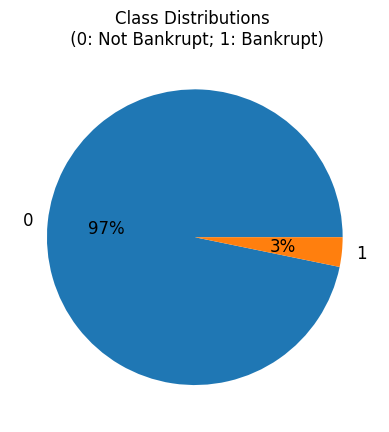

In [ ]:
counts = df['Bankrupt?'].value_counts()
plt.pie(counts, labels=counts.index, autopct="%.0f%%",textprops={'fontsize': 12});
plt.title('Class Distributions \n (0: Not Bankrupt; 1: Bankrupt)', fontsize=12)

Text(0.5, 0, 'Bankrupt?')

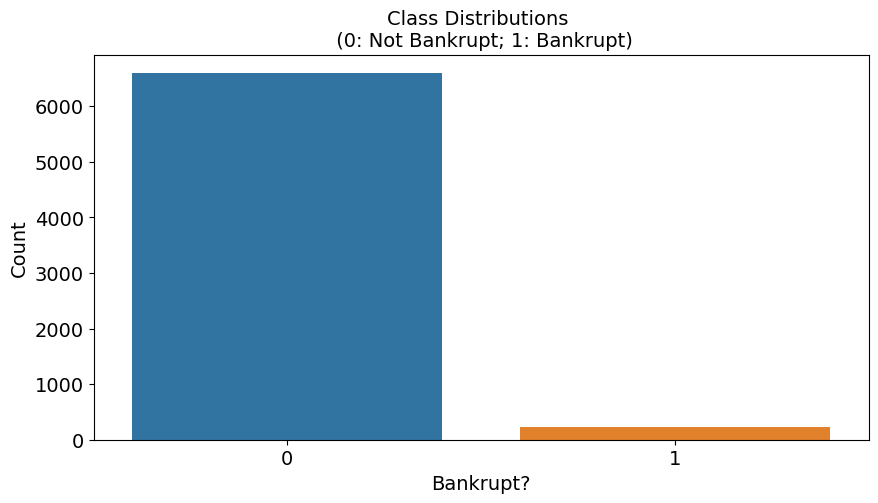

In [ ]:
# Check data imbalance

plt.figure(figsize = (10,5))
sns.countplot(x=df['Bankrupt?'])
plt.title('Class Distributions \n (0: Not Bankrupt; 1: Bankrupt)', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xlabel("Bankrupt?", fontsize=14)

<Axes: >

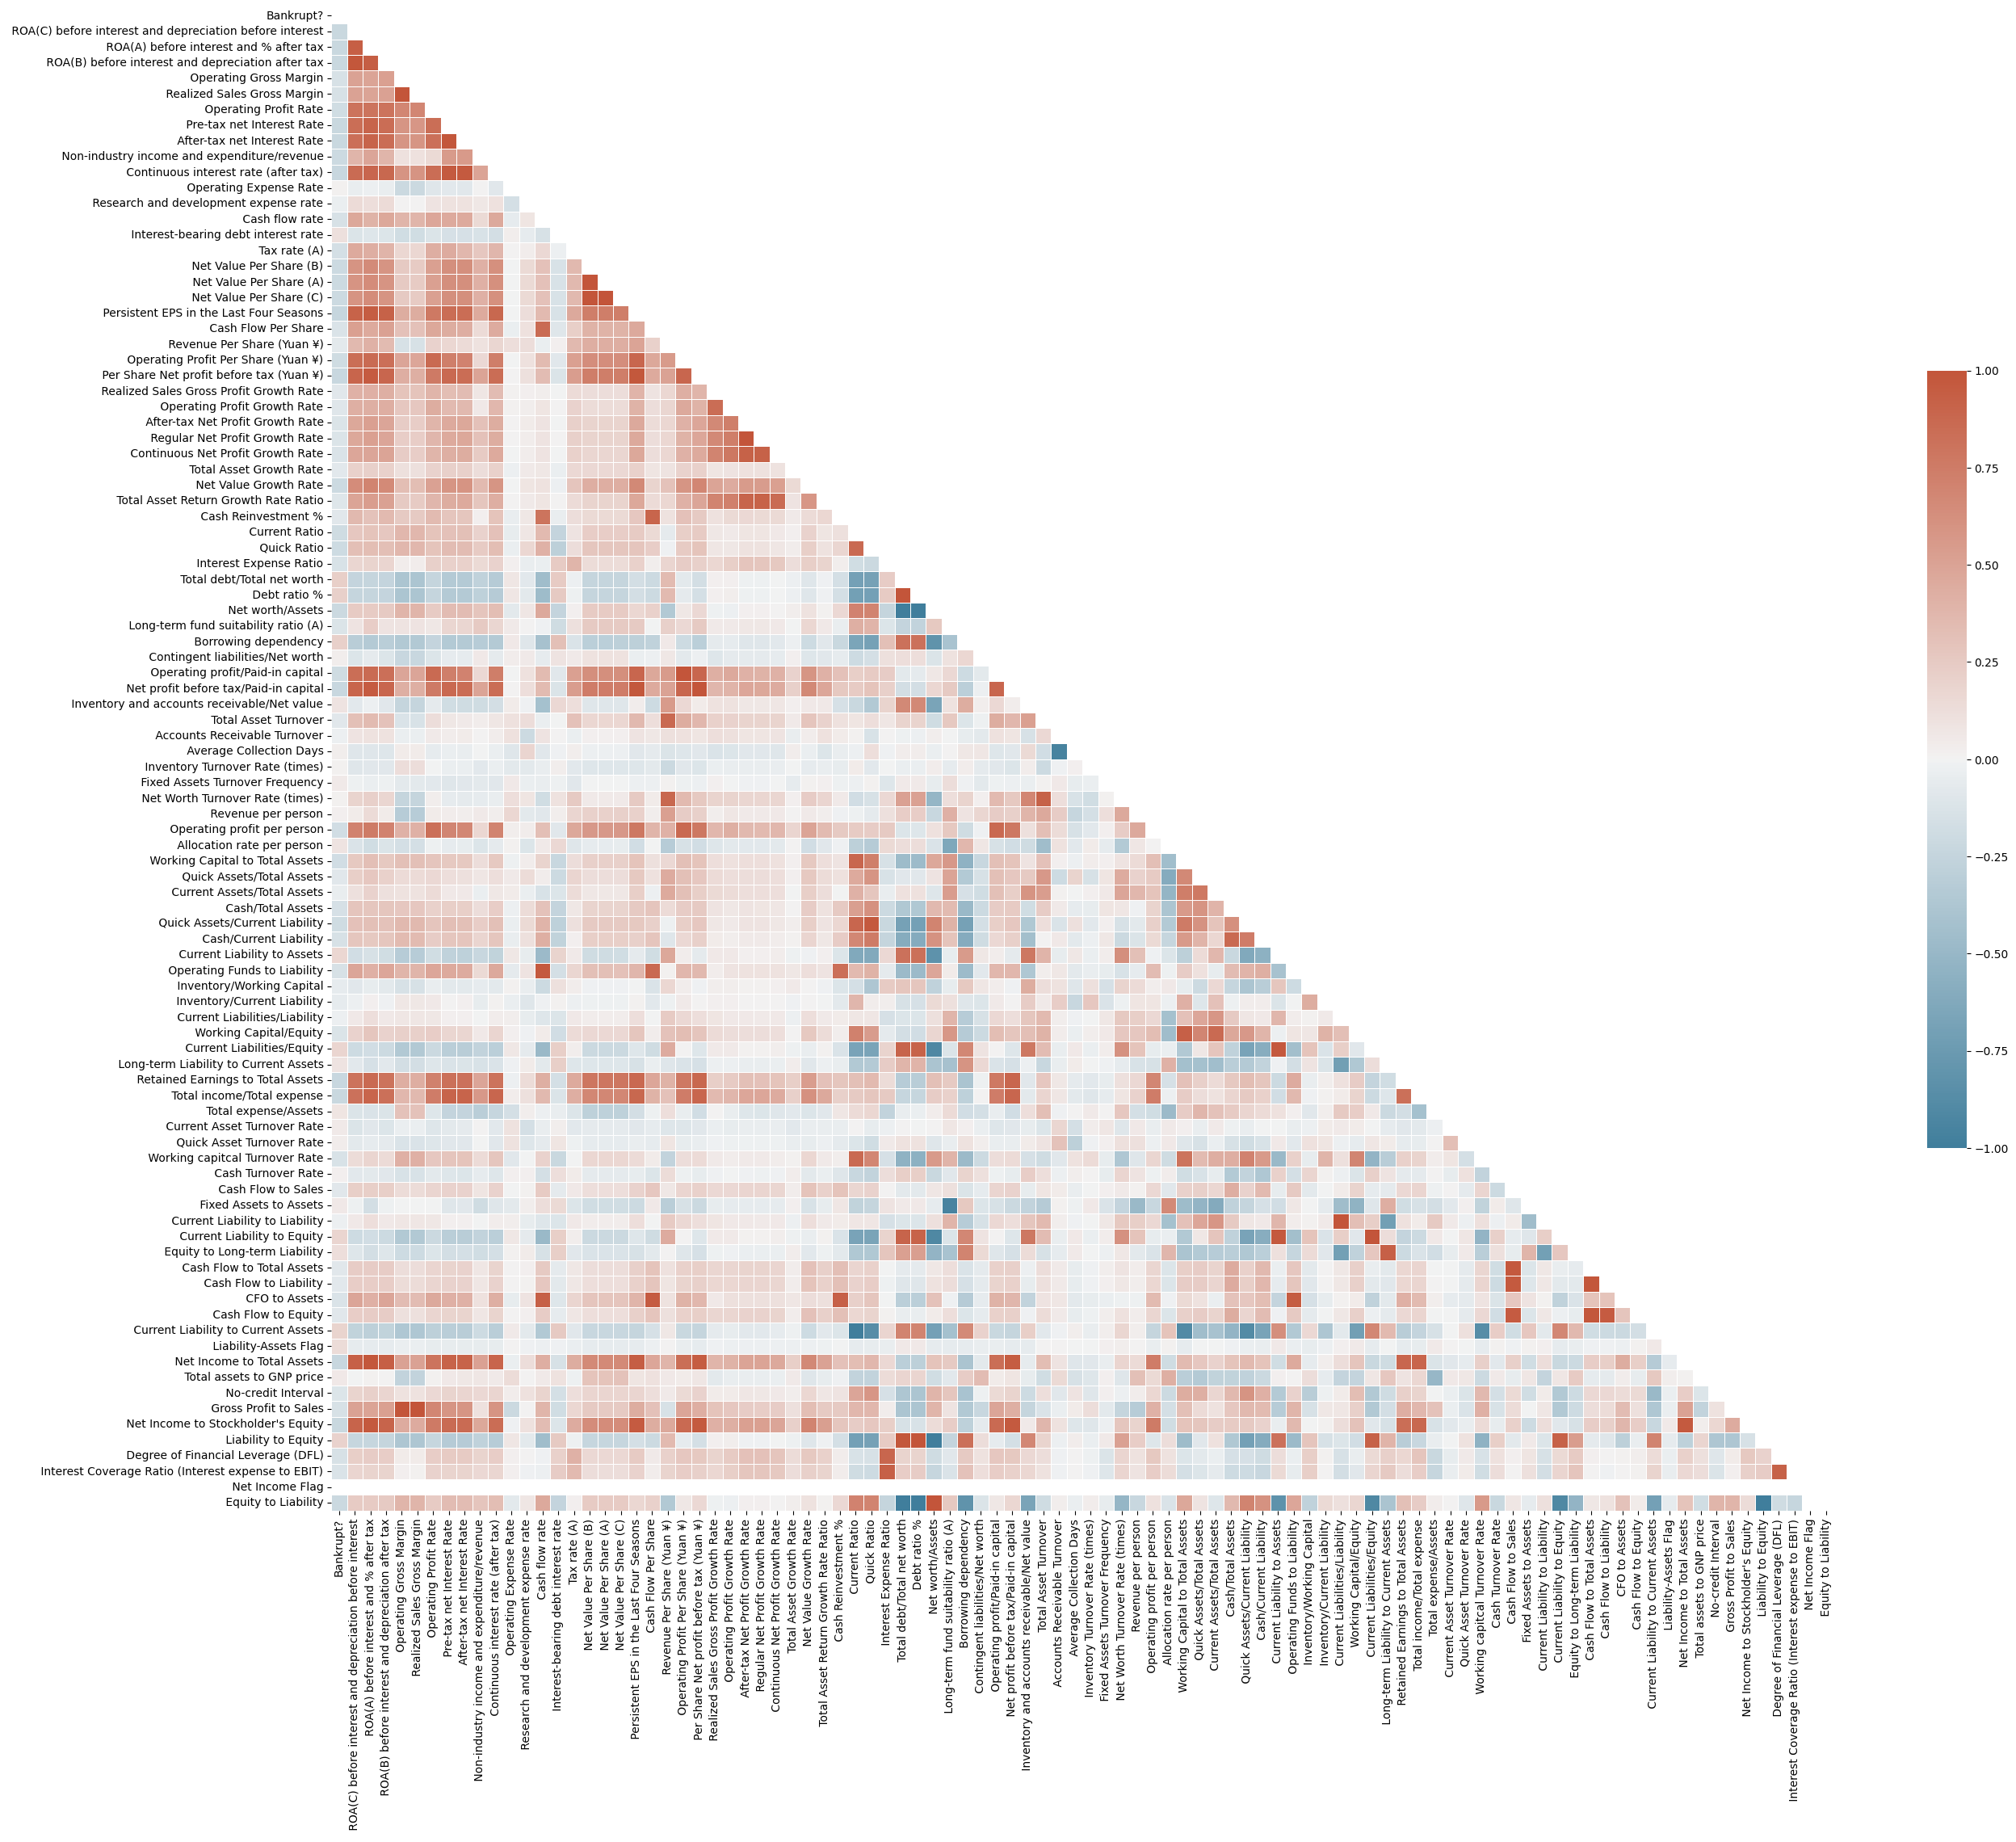

In [ ]:
# Correlation heatmap

f, ax = plt.subplots(figsize=(30, 25))
mat = df.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
positive_corr_list = df.corrwith(df["Bankrupt?"]).sort_values(ascending=False)[1:7].index.tolist()
positive_corr = df[positive_corr_list + ["Bankrupt?"]].copy()

<ipython-input-12-78a43b471bc9>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(net_inc_total_assets, color='#C5B3F9')
<ipython-input-12-78a43b471bc9>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(net_inc_total_assets, color='#C5B3F9')
<ipython-input-12-78a43b471bc9>:10: UserWarning: 

`di

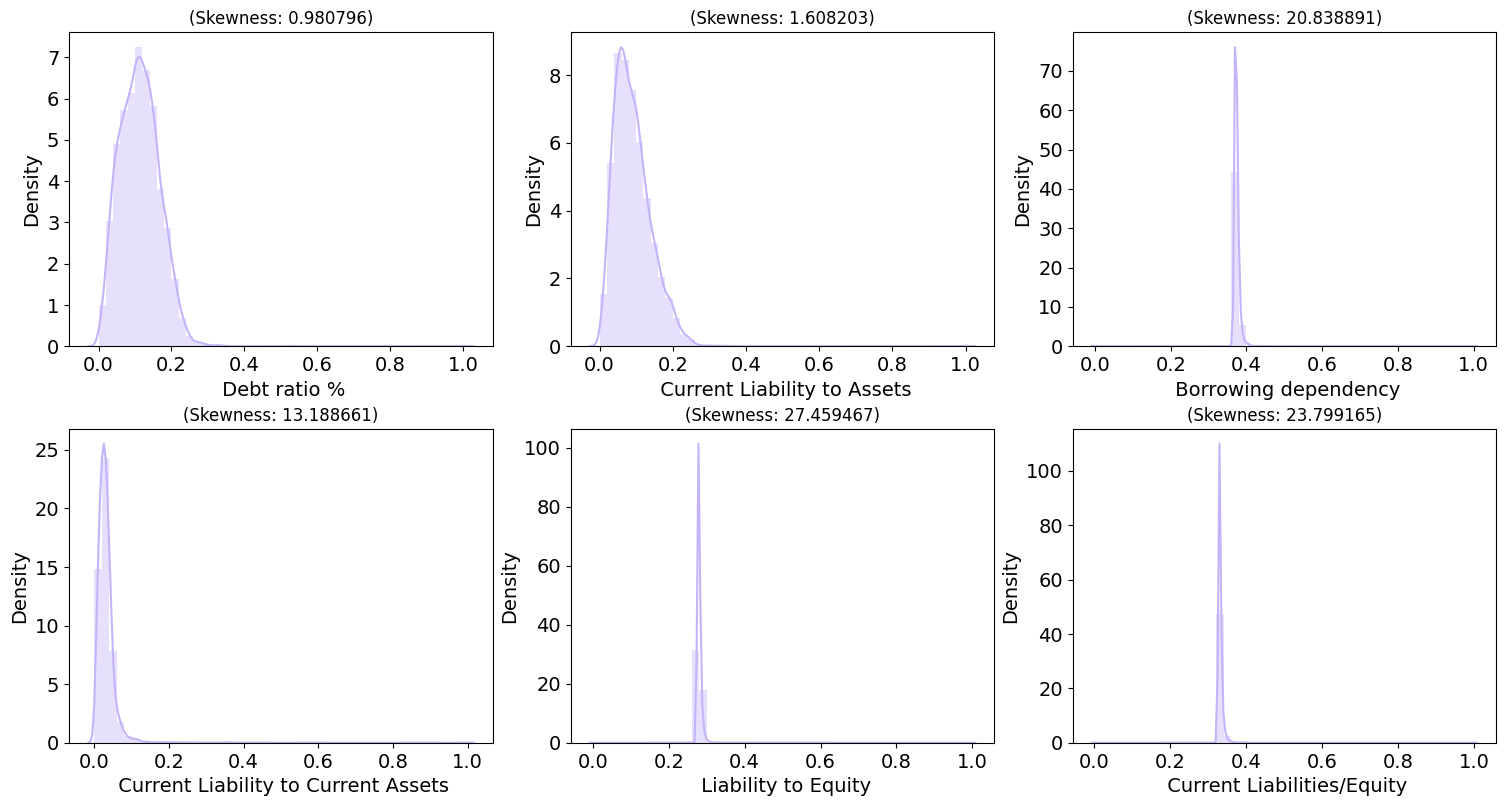

In [ ]:
x_value = positive_corr.columns.tolist()[-1]
y_value = positive_corr.columns.tolist()[:-1]

plt.figure(figsize=(15,8))

for i in range(1,7):
    plt.subplot(2,3,i)  
    # sns.barplot(x = x_value, y = y_value[i-1],data = df)
    net_inc_total_assets = df[y_value[i-1]].values
    sns.distplot(net_inc_total_assets, color='#C5B3F9')

    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.xlabel(y_value[i-1], fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.title("(Skewness: %f)" % df[y_value[i-1]].skew(), fontsize=12)

plt.tight_layout(pad=0.5)

In [ ]:
neg_corr_list = df.corrwith(df["Bankrupt?"]).sort_values()[:6].index.tolist()
neg_corr = df[neg_corr_list + ["Bankrupt?"]].copy()

<ipython-input-14-d7f340da9a36>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(net_inc_total_assets, color='#C5B3F9')
<ipython-input-14-d7f340da9a36>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(net_inc_total_assets, color='#C5B3F9')
<ipython-input-14-d7f340da9a36>:10: UserWarning: 

`di

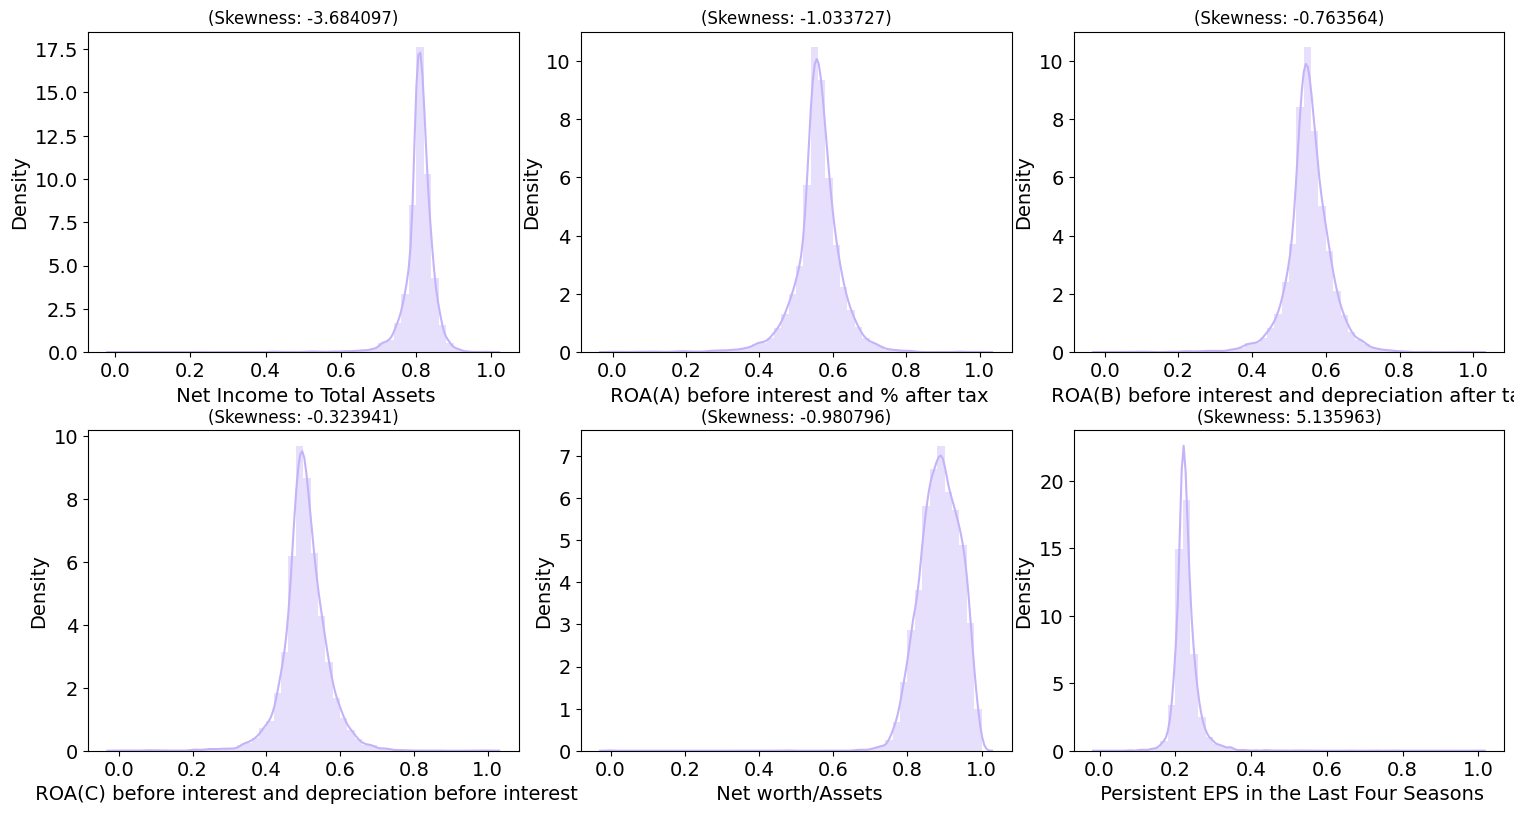

In [ ]:
x_value = neg_corr.columns.tolist()[-1]
y_value = neg_corr.columns.tolist()[:-1]

plt.figure(figsize=(15,8))

for i in range(1,7):
    plt.subplot(2,3,i)  
    # sns.barplot(x = x_value, y = y_value[i-1],data = df)
    net_inc_total_assets = df[y_value[i-1]].values
    sns.distplot(net_inc_total_assets, color='#C5B3F9')
    
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.xlabel(y_value[i-1], fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.title("(Skewness: %f)" % df[y_value[i-1]].skew(), fontsize=12)

plt.tight_layout(pad=0.2)

In [ ]:
df[positive_corr_list + ['Bankrupt?']].corr()

Debt ratio %  \
 Debt ratio %                              1.000000   
 Current Liability to Assets               0.842583   
 Borrowing dependency                      0.329109   
 Current Liability to Current Assets       0.428180   
 Liability to Equity                       0.349250   
 Current Liabilities/Equity                0.343692   
Bankrupt?                                  0.250161   

                                       Current Liability to Assets  \
 Debt ratio %                                             0.842583   
 Current Liability to Assets                              1.000000   
 Borrowing dependency                                     0.229825   
 Current Liability to Current Assets                      0.351832   
 Liability to Equity                                      0.286398   
 Current Liabilities/Equity                               0.352986   
Bankrupt?                                                 0.194494   

                                       Borrowing dependency  \
 Debt ratio %                                      0.329109   
 Current Liability to Assets                       0.229825   
 Borrowing dependency                              1.000000   
 Current Liability to Current Assets               0.124908   
 Liability to Equity                               0.955857   
 Current Liabilities/Equity                        0.892772   
Bankrupt?                                          0.176543   

                                       Current Liability to Current Assets  \
 Debt ratio %                                                     0.428180   
 Current Liability to Assets                                      0.351832   
 Borrowing dependency                                             0.124908   
 Current Liability to Current Assets                              1.000000   
 Liability to Equity                                              0.132372   
 Current Liabilities/Equity                                       0.108609   
Bankrupt?                                                         0.171306   

                                       Liability to Equity  \
 Debt ratio %                                     0.349250   
 Current Liability to Assets                      0.286398   
 Borrowing dependency                             0.955857   
 Current Liability to Current Assets              0.132372   
 Liability to Equity                              1.000000   
 Current Liabilities/Equity                       0.963908   
Bankrupt?                                         0.166812   

                                       Current Liabilities/Equity  Bankrupt?  
 Debt ratio %                                            0.343692   0.250161  
 Current Liability to Assets                             0.352986   0.194494  
 Borrowing dependency                                    0.892772   0.176543  
 Current Liability to Current Assets                     0.108609   0.171306  
 Liability to Equity                                     0.963908   0.166812  
 Current Liabilities/Equity                              1.000000   0.153828  
Bankrupt?                                                0.153828   1.000000

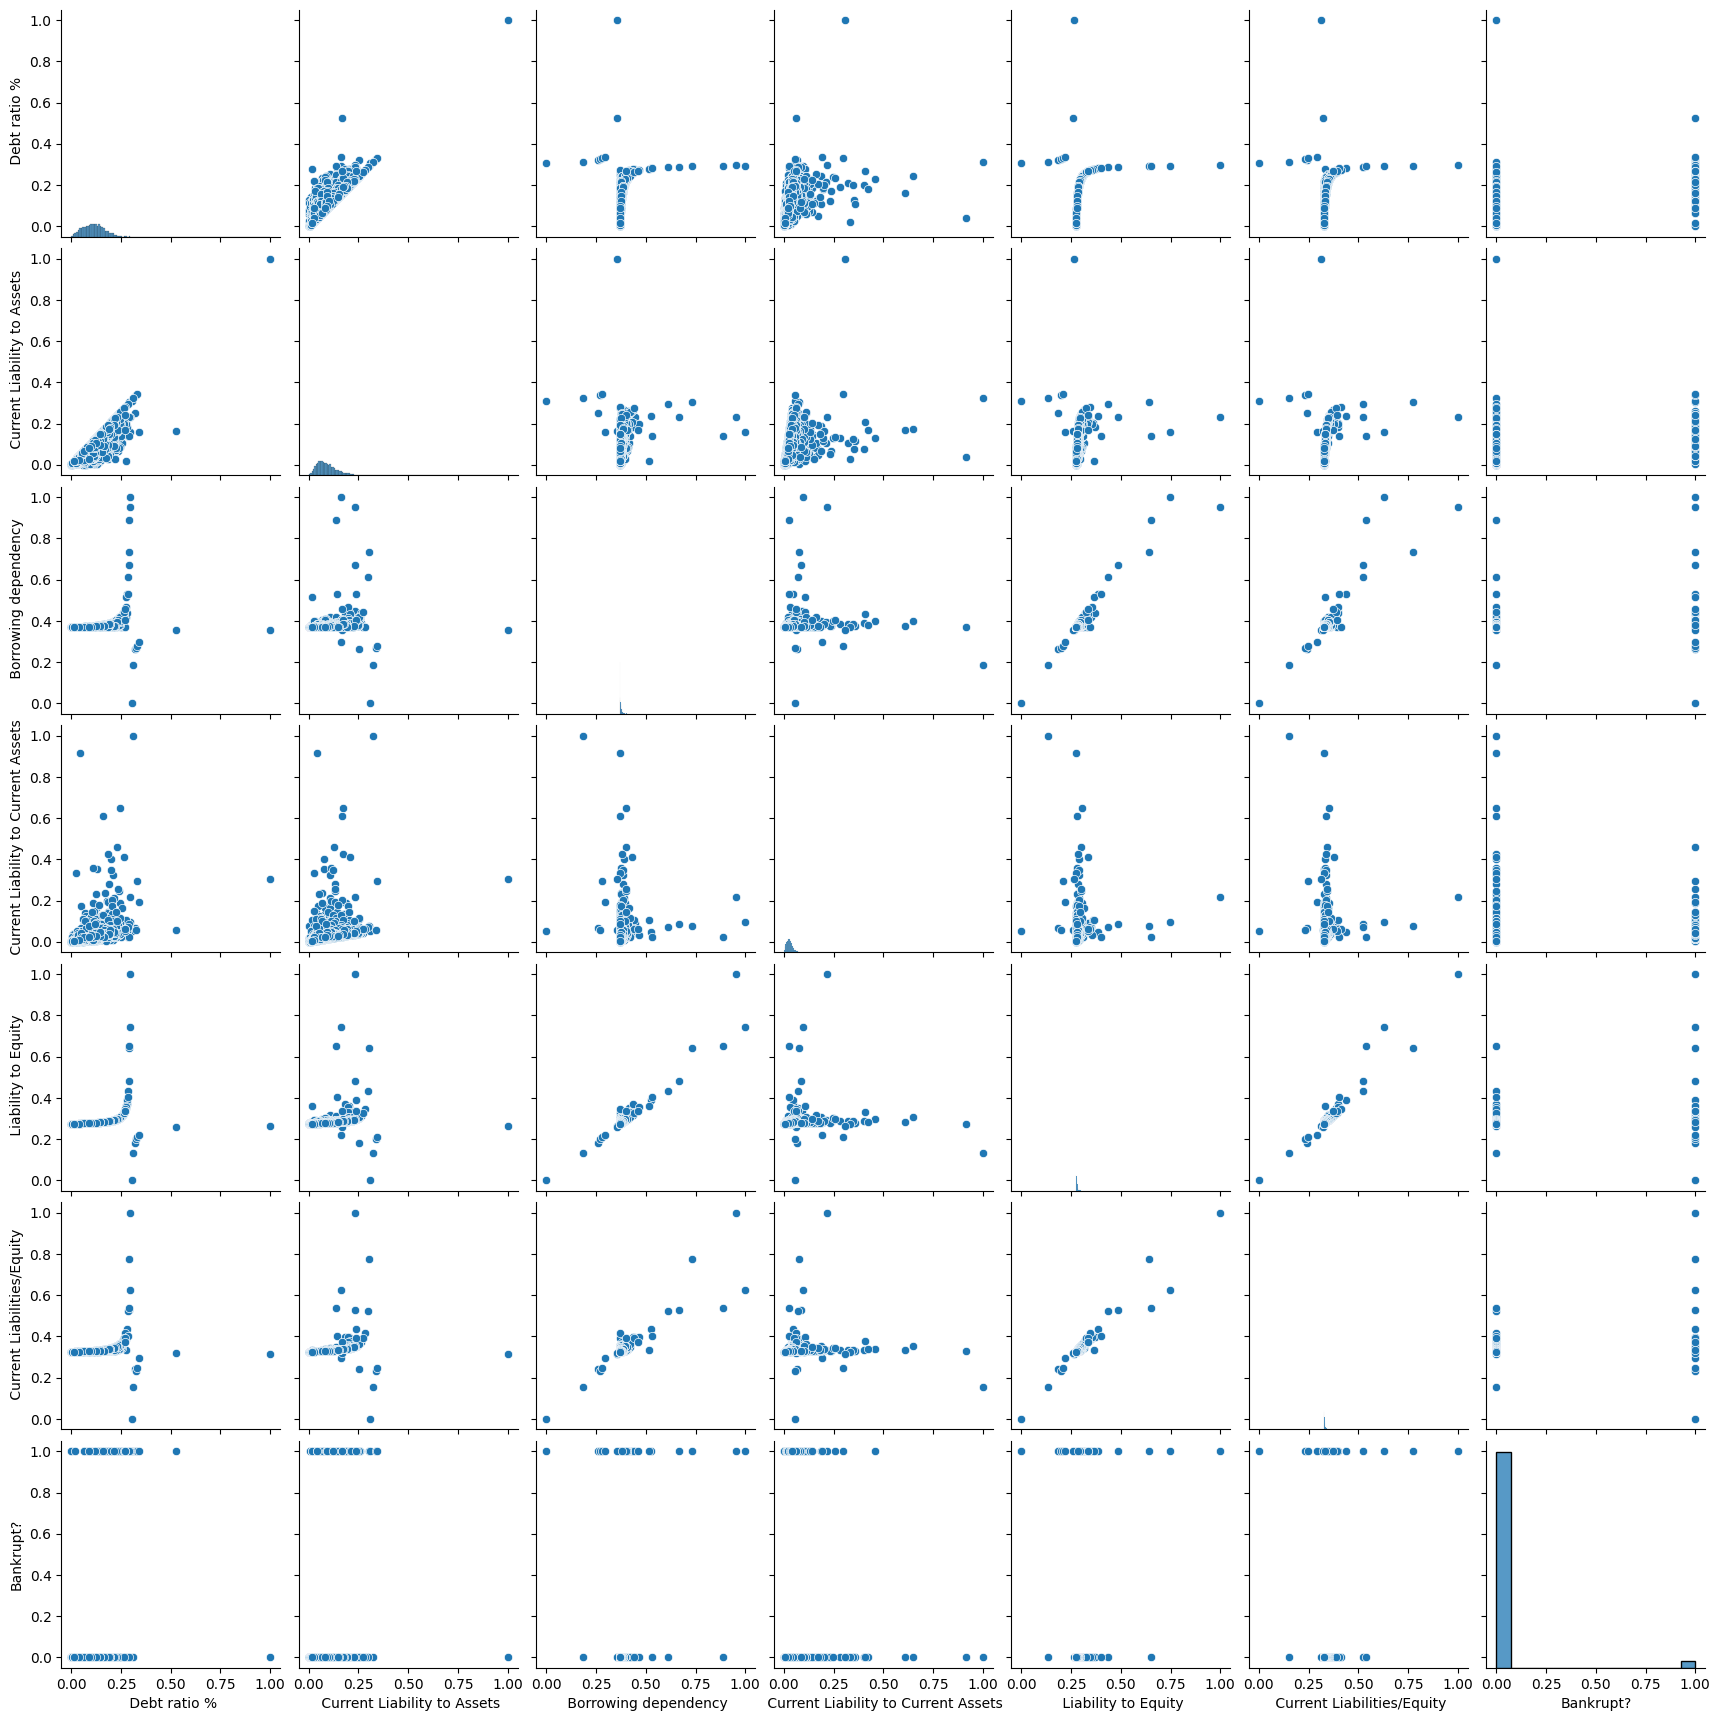

In [ ]:
sns.pairplot(df[positive_corr_list + ['Bankrupt?']])

In [ ]:
df[neg_corr_list + ['Bankrupt?']].corr()

Net Income to Total Assets  \
 Net Income to Total Assets                                            1.000000   
 ROA(A) before interest and % after tax                                0.961552   
 ROA(B) before interest and depreciation after tax                     0.912040   
 ROA(C) before interest and depreciation before...                     0.887670   
 Net worth/Assets                                                      0.281422   
 Persistent EPS in the Last Four Seasons                               0.691152   
Bankrupt?                                                             -0.315457   

                                                     ROA(A) before interest and % after tax  \
 Net Income to Total Assets                                                        0.961552   
 ROA(A) before interest and % after tax                                            1.000000   
 ROA(B) before interest and depreciation after tax                                 0.955741   
 ROA(C) before interest and depreciation before...                                 0.940124   
 Net worth/Assets                                                                  0.259972   
 Persistent EPS in the Last Four Seasons                                           0.764828   
Bankrupt?                                                                         -0.282941   

                                                     ROA(B) before interest and depreciation after tax  \
 Net Income to Total Assets                                                                  0.912040    
 ROA(A) before interest and % after tax                                                      0.955741    
 ROA(B) before interest and depreciation after tax                                           1.000000    
 ROA(C) before interest and depreciation before...                                           0.986849    
 Net worth/Assets                                                                            0.264734    
 Persistent EPS in the Last Four Seasons                                                     0.764597    
Bankrupt?                                                                                   -0.273051    

                                                     ROA(C) before interest and depreciation before interest  \
 Net Income to Total Assets                                                                  0.887670          
 ROA(A) before interest and % after tax                                                      0.940124          
 ROA(B) before interest and depreciation after tax                                           0.986849          
 ROA(C) before interest and depreciation before...                                           1.000000          
 Net worth/Assets                                                                            0.261427          
 Persistent EPS in the Last Four Seasons                                                     0.775006          
Bankrupt?                                                                                   -0.260807          

                                                     Net worth/Assets  \
 Net Income to Total Assets                                  0.281422   
 ROA(A) before interest and % after tax                      0.259972   
 ROA(B) before interest and depreciation after tax           0.264734   
 ROA(C) before interest and depreciation before...           0.261427   
 Net worth/Assets                                            1.000000   
 Persistent EPS in the Last Four Seasons                     0.177429   
Bankrupt?                                                   -0.250161   

                                                     Persistent EPS in the Last Four Seasons  \
 Net Income to Total Assets                                                         0.691152   
 ROA(A) before interest and % after tax                                             0.764828   
 ROA(B) 

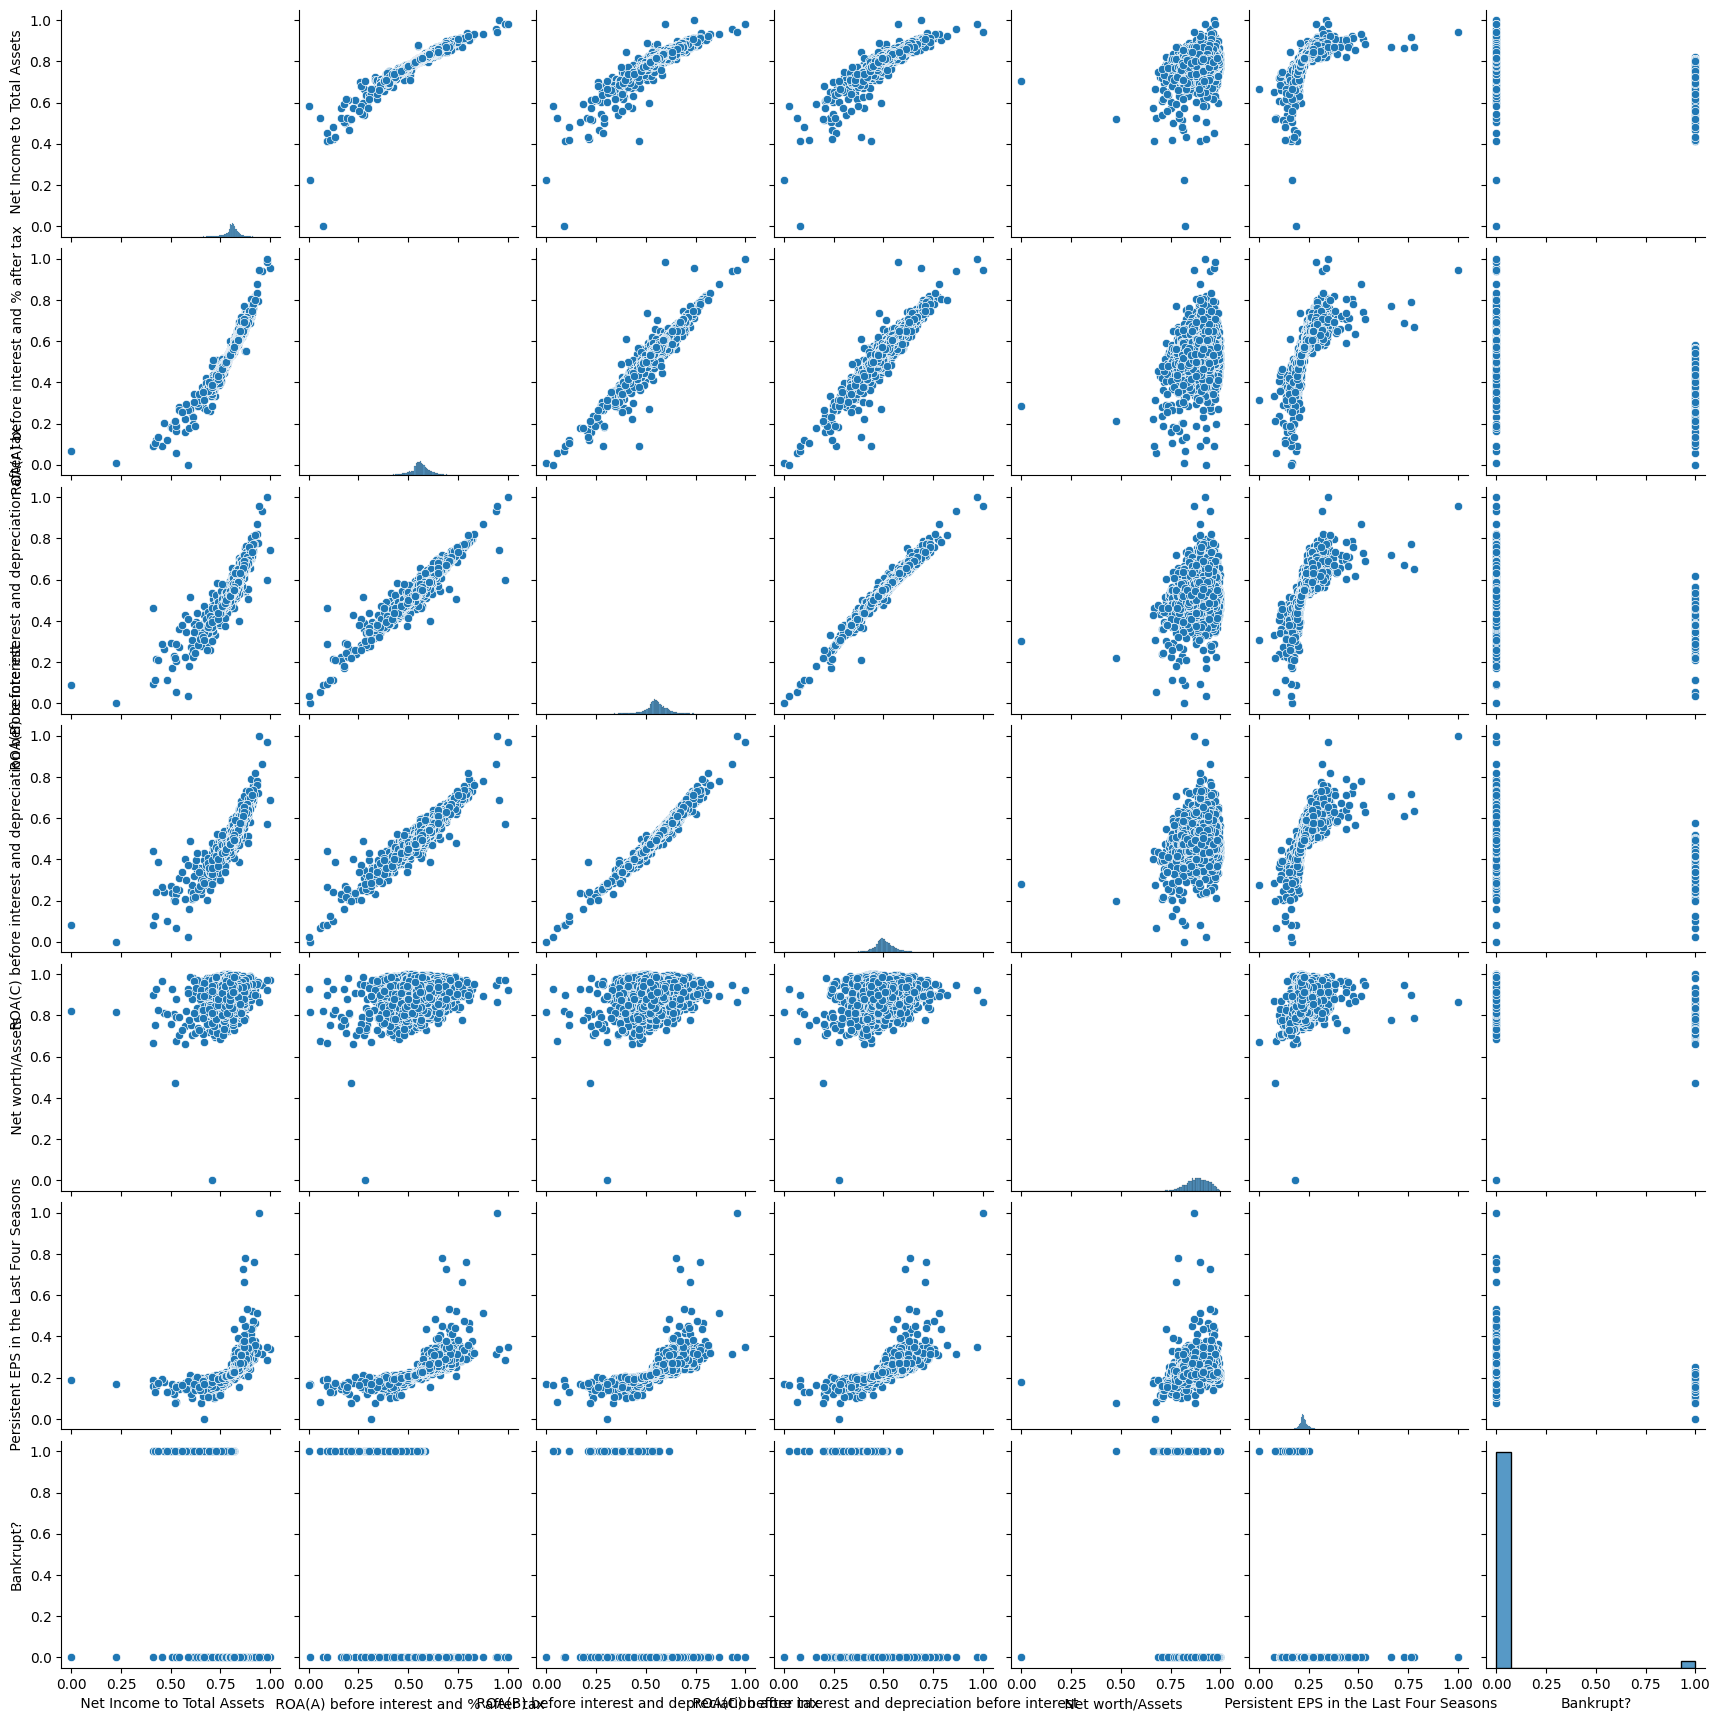

In [ ]:
sns.pairplot(df[neg_corr_list + ['Bankrupt?']])

<Axes: >

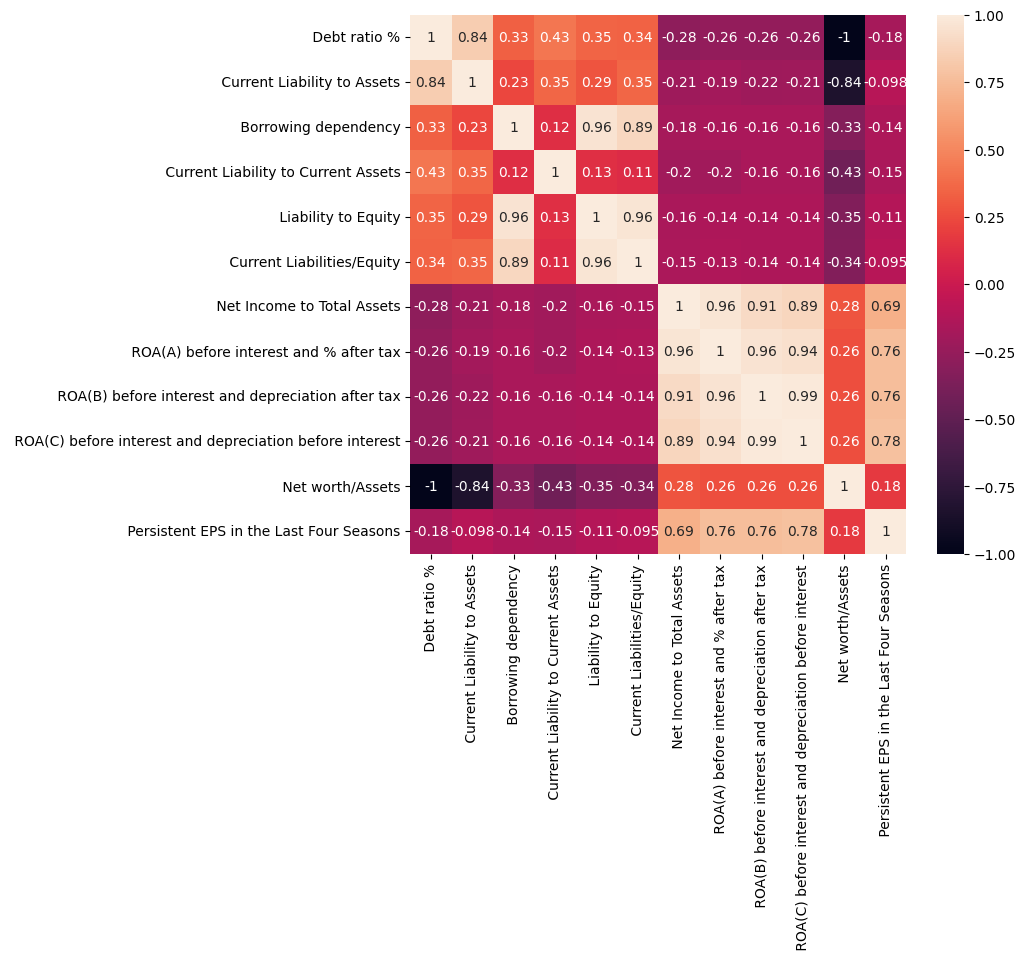

In [ ]:
relation = positive_corr.columns.tolist()[:-1] + neg_corr.columns.tolist()[:-1]
plt.figure(figsize=(8,7))
sns.heatmap(df[relation].corr(),annot=True)

<ipython-input-20-9c97a79a3458>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(debt_ratio,ax=ax3, color='#C5B3F9')
<ipython-input-20-9c97a79a3458>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(curr_lib_to_asset,ax=ax1, color='#C5B3F9')
<ipython-input-20-9c97a79a3458>:14: UserWarning: 

`di

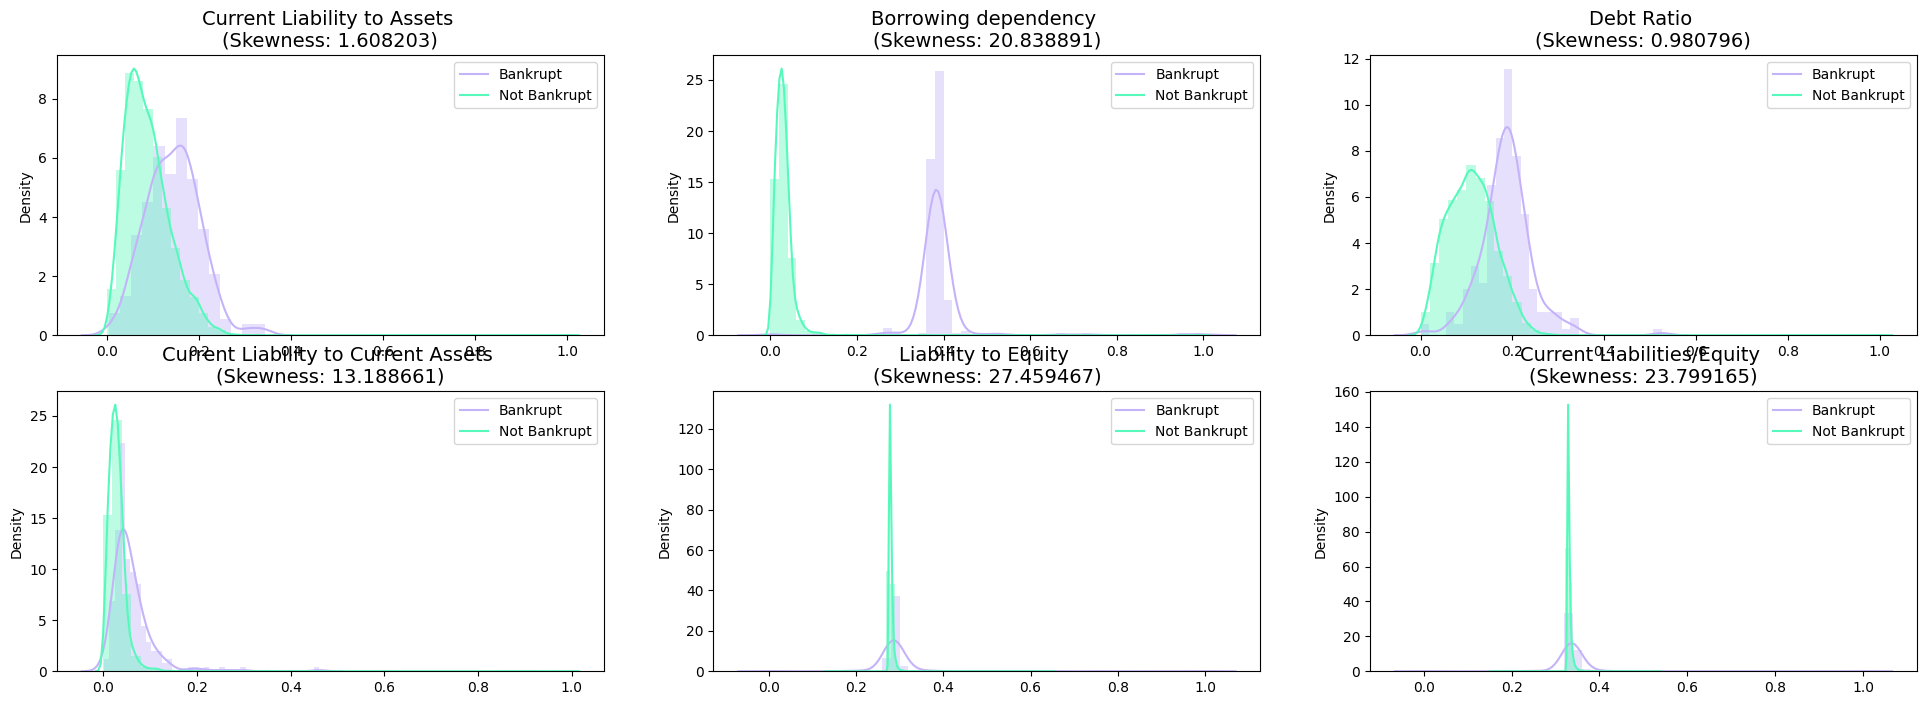

In [ ]:
# Plotting the feature distributions for bankrupted companies 

f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(24, 8))

debt_ratio = df[' Debt ratio %'].loc[df['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax3, color='#C5B3F9')
ax3.set_title('Debt Ratio \n(Skewness: %f)' % df[' Debt ratio %'].skew(), fontsize=14)

curr_lib_to_asset = df[' Current Liability to Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(curr_lib_to_asset,ax=ax1, color='#C5B3F9')
ax1.set_title('Current Liability to Assets \n(Skewness: %f)' % df[' Current Liability to Assets'].skew(), fontsize=14)

curr_lib_to_curr_asset = df[' Borrowing dependency'].loc[df['Bankrupt?'] == 1].values
sns.distplot(curr_lib_to_curr_asset ,ax=ax2, color='#C5B3F9')
ax2.set_title('Borrowing dependency \n(Skewness: %f)' % df[' Borrowing dependency'].skew(), fontsize=14)

debt_ratio = df[' Current Liability to Current Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax4, color='#C5B3F9')
ax4.set_title('Current Liability to Current Assets \n(Skewness: %f)' % df[' Current Liability to Current Assets'].skew(), fontsize=14)

curr_lib_to_asset = df[' Liability to Equity'].loc[df['Bankrupt?'] == 1].values
sns.distplot(curr_lib_to_asset,ax=ax5, color='#C5B3F9')
ax5.set_title('Liability to Equity \n(Skewness: %f)' % df[' Liability to Equity'].skew(), fontsize=14)

curr_lib_to_curr_asset = df[' Current Liabilities/Equity'].loc[df['Bankrupt?'] == 1].values
sns.distplot(curr_lib_to_curr_asset ,ax=ax6, color='#C5B3F9')
ax6.set_title('Current Liabilities/Equity \n(Skewness: %f)' % df[' Current Liabilities/Equity'].skew(), fontsize=14)

debt_ratio = df[' Debt ratio %'].loc[df['Bankrupt?'] == 0].values
sns.distplot(debt_ratio,ax=ax3,color='#56F9BB')

curr_lib_to_asset = df[' Current Liability to Assets'].loc[df['Bankrupt?'] == 0].values
sns.distplot(curr_lib_to_asset,ax=ax1, color='#56F9BB')

curr_lib_to_curr_asset = df[' Current Liability to Current Assets'].loc[df['Bankrupt?'] == 0].values
sns.distplot(curr_lib_to_curr_asset ,ax=ax2,color='#56F9BB')

debt_ratio = df[' Current Liability to Current Assets'].loc[df['Bankrupt?'] == 0].values
sns.distplot(debt_ratio,ax=ax4, color='#56F9BB')

curr_lib_to_asset = df[' Liability to Equity'].loc[df['Bankrupt?'] == 0].values
sns.distplot(curr_lib_to_asset,ax=ax5, color='#56F9BB')

curr_lib_to_curr_asset = df[' Current Liabilities/Equity'].loc[df['Bankrupt?'] == 0].values
sns.distplot(curr_lib_to_curr_asset ,ax=ax6, color='#56F9BB')

ax1.legend(['Bankrupt', 'Not Bankrupt'])
ax2.legend(['Bankrupt', 'Not Bankrupt'])
ax3.legend(['Bankrupt', 'Not Bankrupt'])
ax4.legend(['Bankrupt', 'Not Bankrupt'])
ax5.legend(['Bankrupt', 'Not Bankrupt'])
ax6.legend(['Bankrupt', 'Not Bankrupt'])

<ipython-input-21-cb74e098ac27>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(net_inc_total_assets,ax=ax1, color='#C5B3F9')
<ipython-input-21-cb74e098ac27>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(roa_a,ax=ax2, color='#C5B3F9')


Text(0.5, 1.0, ' ROA(A) before interest and % after tax')

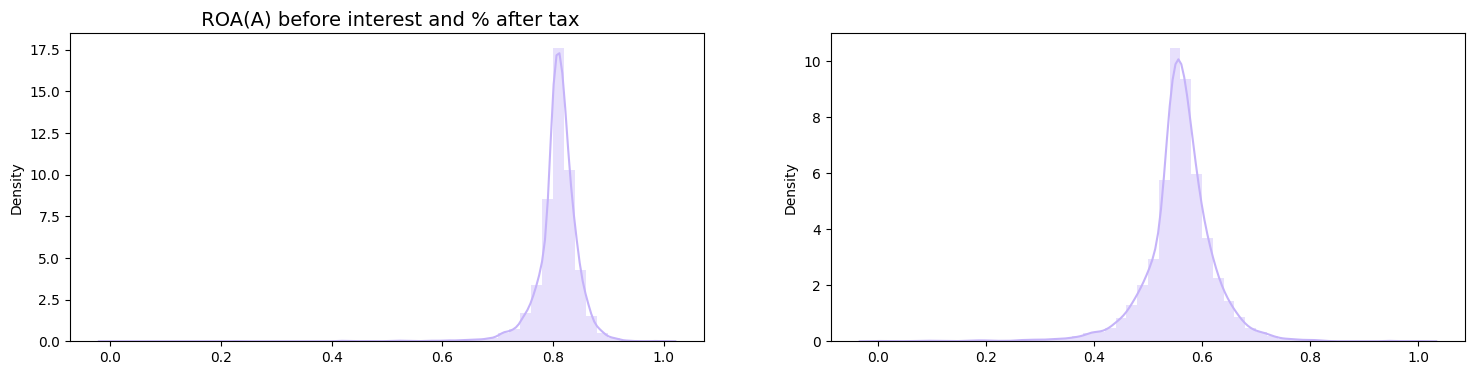

In [ ]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 4))

net_inc_total_assets = df[' Net Income to Total Assets'].values
sns.distplot(net_inc_total_assets,ax=ax1, color='#C5B3F9')
ax3.set_title('Net Income to Total Assets', fontsize=14)

roa_a = df[' ROA(A) before interest and % after tax'].values
sns.distplot(roa_a,ax=ax2, color='#C5B3F9')
ax1.set_title(' ROA(A) before interest and % after tax', fontsize=14)

<ipython-input-22-744995b76596>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(net_inc_total_assets,ax=ax3, color='#C5B3F9')
<ipython-input-22-744995b76596>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(roa_a,ax=ax1, color='#C5B3F9')
<ipython-input-22-744995b76596>:14: UserWarning: 

`dist

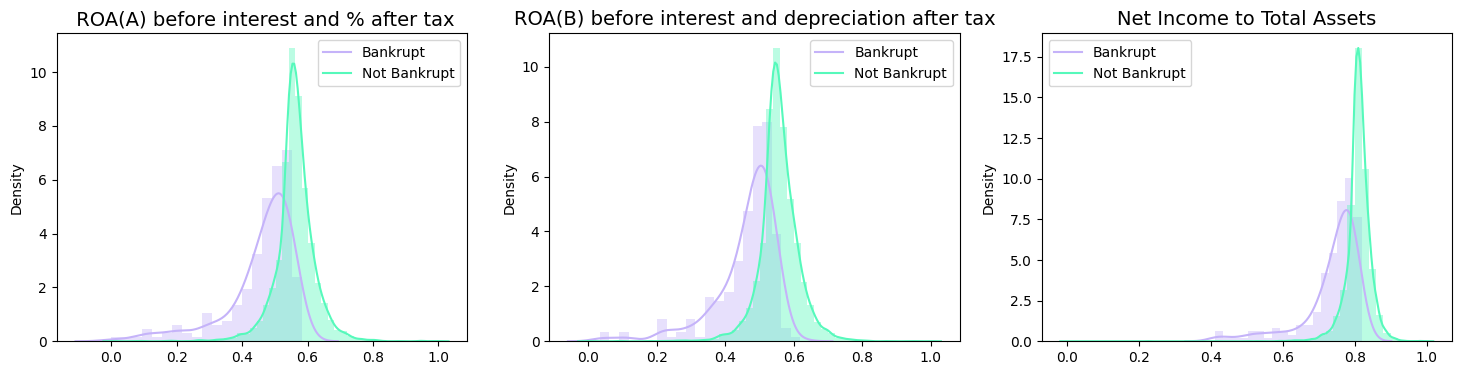

In [ ]:
# Plotting the feature distributions for bankrupted companies (3 highest negative correlation)

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18, 4))

net_inc_total_assets = df[' Net Income to Total Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(net_inc_total_assets,ax=ax3, color='#C5B3F9')
ax3.set_title('Net Income to Total Assets', fontsize=14)

roa_a = df[' ROA(A) before interest and % after tax'].loc[df['Bankrupt?'] == 1].values
sns.distplot(roa_a,ax=ax1, color='#C5B3F9')
ax1.set_title(' ROA(A) before interest and % after tax', fontsize=14)

roa_b = df[' ROA(B) before interest and depreciation after tax'].loc[df['Bankrupt?'] == 1].values
sns.distplot(roa_b ,ax=ax2, color='#C5B3F9')
ax2.set_title('ROA(B) before interest and depreciation after tax', fontsize=14)

net_inc_total_assets = df[' Net Income to Total Assets'].loc[df['Bankrupt?'] == 0].values
sns.distplot(net_inc_total_assets,ax=ax3, color='#56F9BB')
ax3.set_title('Net Income to Total Assets', fontsize=14)

roa_a = df[' ROA(A) before interest and % after tax'].loc[df['Bankrupt?'] == 0].values
sns.distplot(roa_a,ax=ax1, color='#56F9BB')
ax1.set_title(' ROA(A) before interest and % after tax', fontsize=14)

roa_b = df[' ROA(B) before interest and depreciation after tax'].loc[df['Bankrupt?'] == 0].values
sns.distplot(roa_b ,ax=ax2, color='#56F9BB')
ax2.set_title('ROA(B) before interest and depreciation after tax', fontsize=14)

ax1.legend(['Bankrupt', 'Not Bankrupt'])
ax2.legend(['Bankrupt', 'Not Bankrupt'])
ax3.legend(['Bankrupt', 'Not Bankrupt'])

<ipython-input-23-39a8b0ba8bb3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(net_inc_total_assets,ax=ax3, fit=norm, color='#C5B3F9')
<ipython-input-23-39a8b0ba8bb3>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(roa_a,ax=ax1, fit=norm, color='#FB8861')
<ipython-input-23-39a8b0ba8bb3>:12: U

Text(0.5, 1.0, 'ROA(B) before interest and depreciation after tax \n (Unstable companies)')

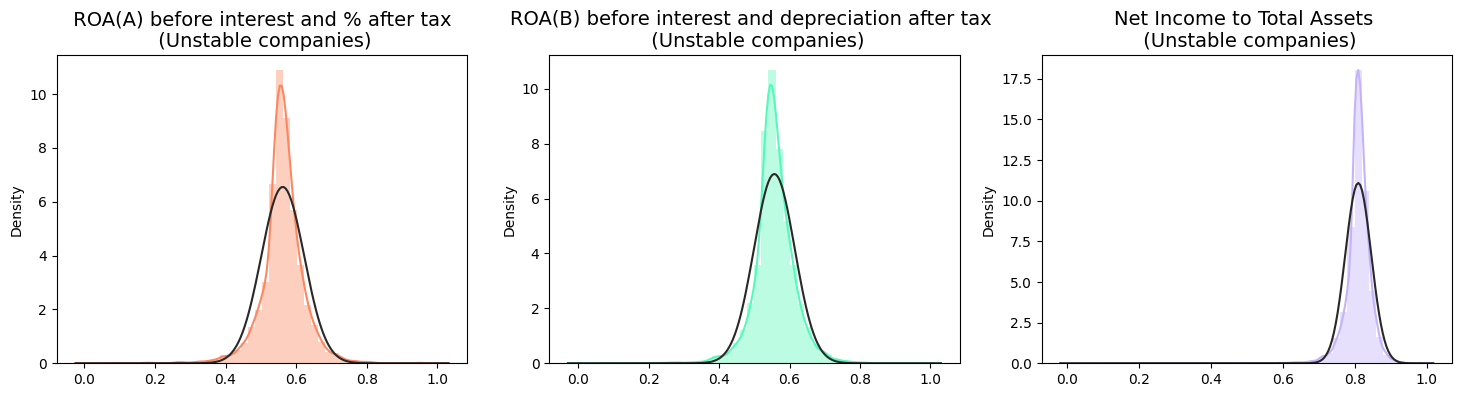

In [ ]:

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18, 4))

net_inc_total_assets = df[' Net Income to Total Assets'].loc[df['Bankrupt?'] == 0].values
sns.distplot(net_inc_total_assets,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('Net Income to Total Assets \n (Unstable companies)', fontsize=14)

roa_a = df[' ROA(A) before interest and % after tax'].loc[df['Bankrupt?'] == 0].values
sns.distplot(roa_a,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title(' ROA(A) before interest and % after tax \n (Unstable companies)', fontsize=14)

roa_b = df[' ROA(B) before interest and depreciation after tax'].loc[df['Bankrupt?'] == 0].values
sns.distplot(roa_b ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('ROA(B) before interest and depreciation after tax \n (Unstable companies)', fontsize=14)

array([[<Axes: title={'center': 'Bankrupt?'}>,
        <Axes: title={'center': ' ROA(C) before interest and depreciation before interest'}>,
        <Axes: title={'center': ' ROA(A) before interest and % after tax'}>,
        <Axes: title={'center': ' ROA(B) before interest and depreciation after tax'}>,
        <Axes: title={'center': ' Operating Gross Margin'}>,
        <Axes: title={'center': ' Realized Sales Gross Margin'}>,
        <Axes: title={'center': ' Operating Profit Rate'}>,
        <Axes: title={'center': ' Pre-tax net Interest Rate'}>,
        <Axes: title={'center': ' After-tax net Interest Rate'}>,
        <Axes: title={'center': ' Non-industry income and expenditure/revenue'}>],
       [<Axes: title={'center': ' Continuous interest rate (after tax)'}>,
        <Axes: title={'center': ' Operating Expense Rate'}>,
        <Axes: title={'center': ' Research and development expense rate'}>,
        <Axes: title={'center': ' Cash flow rate'}>,
        <Axes: title={'center

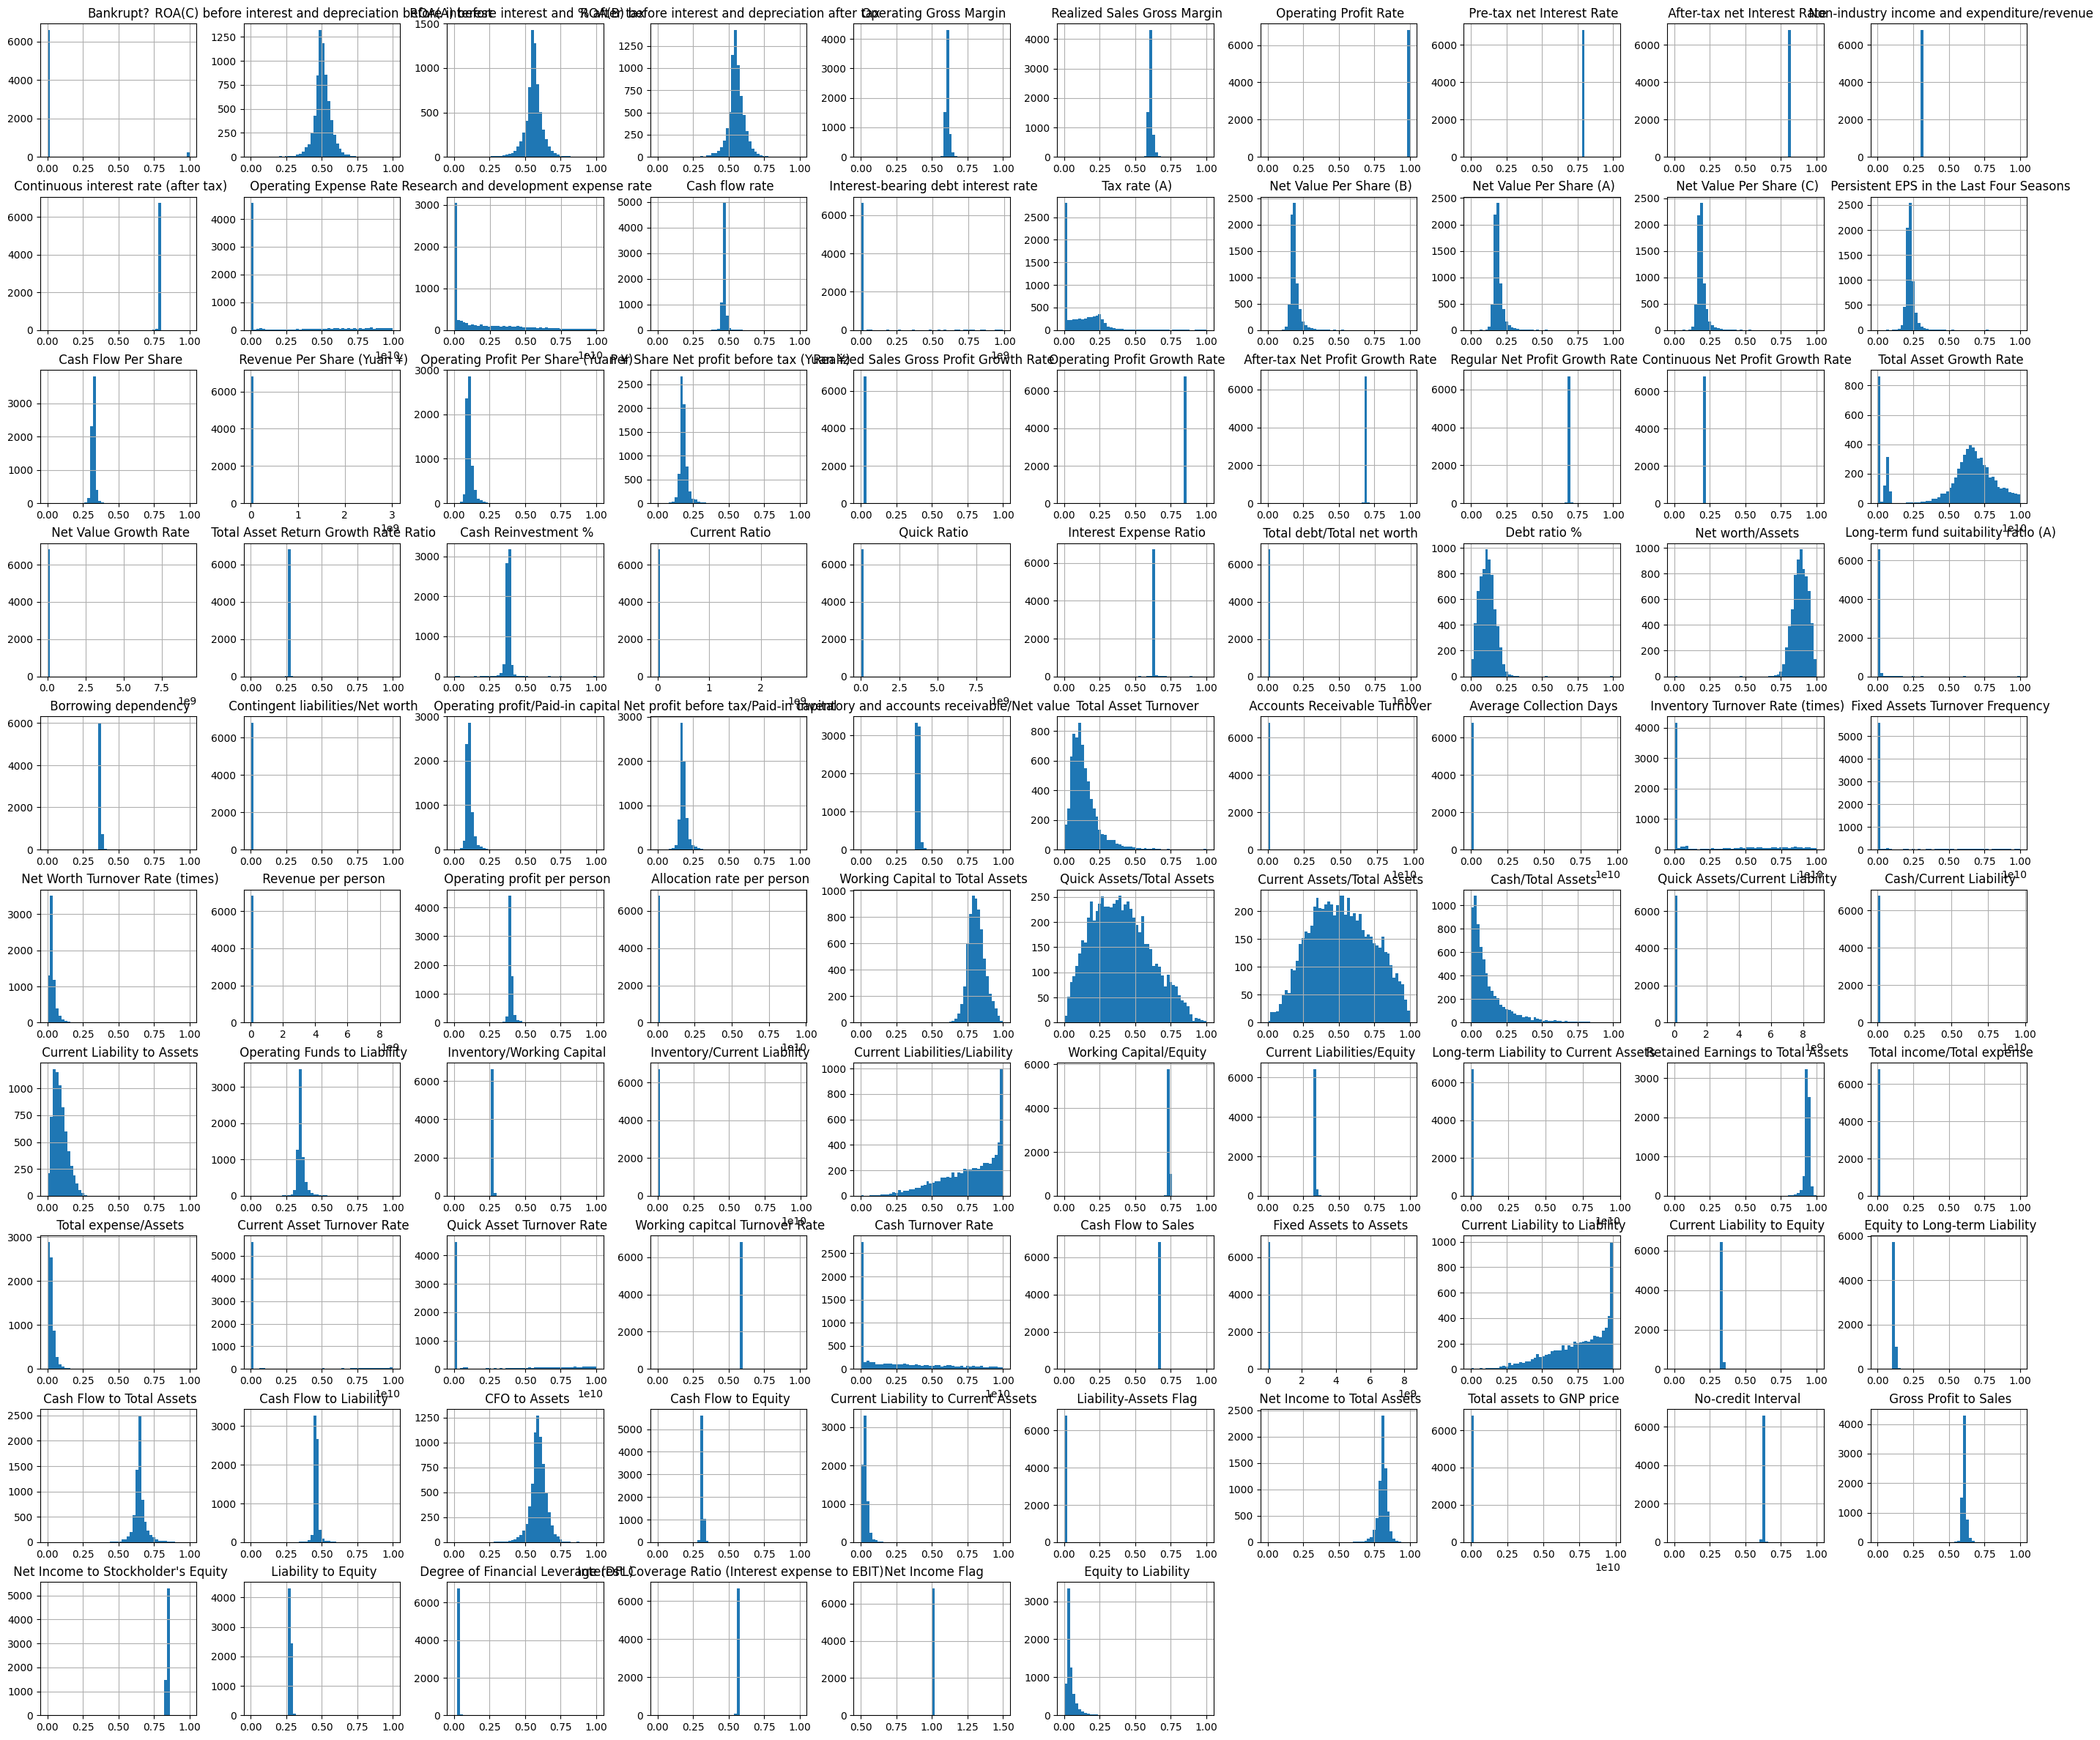

In [ ]:
df.hist(figsize = (35,30),bins = 50)

In [ ]:
# Outliers removal

def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset

for col in df:
    new_df = outliers_removal(df[col],str(col),df)
    

Quartile 25: 0.0 | Quartile 75: 0.0
iqr: 0.0
Cut Off: 0.0
Bankrupt? Lower: 0.0
Bankrupt? Upper: 0.0
Bankrupt? outliers for close to bankruptcy cases: 220
-----------------------------------------------------------------
Quartile 25: 0.476527080388047 | Quartile 75: 0.535562813825379
iqr: 0.05903573343733198
Cut Off: 0.08855360015599797
 ROA(C) before interest and depreciation before interest Lower: 0.38797348023204903
 ROA(C) before interest and depreciation before interest Upper: 0.624116413981377
 ROA(C) before interest and depreciation before interest outliers for close to bankruptcy cases: 391
-----------------------------------------------------------------
Quartile 25: 0.53554295682512 | Quartile 75: 0.58915721761884
iqr: 0.05361426079372
Cut Off: 0.08042139119058
 ROA(A) before interest and % after tax Lower: 0.45512156563454
 ROA(A) before interest and % after tax Upper: 0.66957860880942
 ROA(A) before interest and % after tax outliers for close to bankruptcy cases: 561
-------

<ipython-input-26-0d60bdb722f5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
<ipython-input-26-0d60bdb722f5>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(curr_lib_to_asset,ax=ax1, fit=norm, color='#FB8861')
<ipython-input-26-0d60bdb722f5>:14

Text(0.5, 1.0, 'Borrowing dependency \n (Unstable companies)')

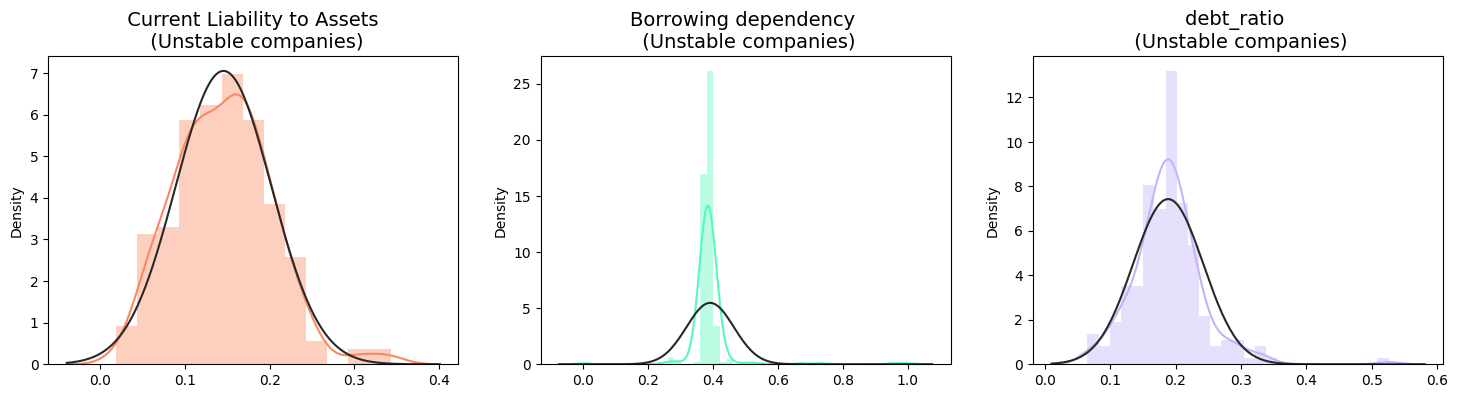

In [ ]:
# After outlier removal - Plotting the feature distributions for bankrupted companies 

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18, 4))

debt_ratio = new_df[' Debt ratio %'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('debt_ratio \n (Unstable companies)', fontsize=14)

curr_lib_to_asset = new_df[' Current Liability to Assets'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(curr_lib_to_asset,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title(' Current Liability to Assets \n (Unstable companies)', fontsize=14)

borr_dep = new_df[' Borrowing dependency'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(borr_dep ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Borrowing dependency \n (Unstable companies)', fontsize=14)

# Evaluation Metrics

In [ ]:
# Evaluation Method

def evaluation(y_test, y_pred, y_pred_prob):
    # Input: 
    # y_test: Ground Truth labels
    # y_pred: Predicted labels
    # y_pred_prob: Predicted probability
    
    print('\nEvaluation:')
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=6))
    print('\n')

    # Create a subplot grid with 1 row and 2 columns
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # Plot Confusion Matrix
    clf_cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(clf_cm, annot=True, cmap="YlGnBu", fmt='g', ax=axs[0])
    axs[0].xaxis.set_label_position("top")
    axs[0].set_ylabel('Actual label')
    axs[0].set_xlabel('Predicted label')
    axs[0].set_title('Confusion matrix')

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    AUC = auc(fpr, tpr) * 100
    axs[1].plot(fpr, tpr, color='blue', label='AUC = %0.2f' % AUC)
    axs[1].legend(loc='lower right')
    axs[1].set_title('Receiver Operating Characteristic')

    # Display the subplots
    plt.show()

# Data Preprocessing for Regression Models

In [ ]:
# Drop features
X_train = X_train.drop([' Net Income Flag', ' Net worth/Assets', ' Liability to Equity', ' ROA(B) before interest and depreciation after tax', ' ROA(C) before interest and depreciation before interest'], axis=1)
X_test = X_test.drop([' Net Income Flag', ' Net worth/Assets', ' Liability to Equity', ' ROA(B) before interest and depreciation after tax', ' ROA(C) before interest and depreciation before interest'], axis=1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4773, 90) (4773,) (2046, 90) (2046,)


In [ ]:
# Log transform highly skewed features
X_train[' Net Income to Total Assets'] = X_train[' Net Income to Total Assets'].apply(lambda x: np.log(x+1))
X_train[' ROA(A) before interest and % after tax'] = X_train[' ROA(A) before interest and % after tax'].apply(lambda x: np.log(x+1))
X_train[' Persistent EPS in the Last Four Seasons'] = X_train[' Persistent EPS in the Last Four Seasons'].apply(lambda x: np.log(x+1))
X_train[' Current Liability to Assets'] = X_train[' Current Liability to Assets'].apply(lambda x: np.log(x+1))
X_train[' Borrowing dependency'] = X_train[' Borrowing dependency'].apply(lambda x: np.log(x+1))
X_train[' Current Liability to Current Assets'] = X_train[' Current Liability to Current Assets'].apply(lambda x: np.log(x+1))
X_train[' Current Liabilities/Equity'] = X_train[' Current Liabilities/Equity'].apply(lambda x: np.log(x+1))

X_test[' Net Income to Total Assets'] = X_test[' Net Income to Total Assets'].apply(lambda x: np.log(x+1))
X_test[' ROA(A) before interest and % after tax'] = X_test[' ROA(A) before interest and % after tax'].apply(lambda x: np.log(x+1))
X_test[' Persistent EPS in the Last Four Seasons'] = X_test[' Persistent EPS in the Last Four Seasons'].apply(lambda x: np.log(x+1))
X_test[' Current Liability to Assets'] = X_test[' Current Liability to Assets'].apply(lambda x: np.log(x+1))
X_test[' Borrowing dependency'] = X_test[' Borrowing dependency'].apply(lambda x: np.log(x+1))
X_test[' Current Liability to Current Assets'] = X_test[' Current Liability to Current Assets'].apply(lambda x: np.log(x+1))
X_test[' Current Liabilities/Equity'] = X_test[' Current Liabilities/Equity'].apply(lambda x: np.log(x+1))

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_nmr = scaler.fit_transform(X_train)
X_test_nmr = scaler.transform(X_test)
print(X_train_nmr)

#one hot encoding is not needed since there is no categorical feature in the feature columns

[[ 0.37926838 -0.43314855 -0.43653087 ... -0.04439092  0.01034876
  -0.27601349]
 [-0.50489121  0.10083455  0.10179661 ... -0.09556486 -1.9613452
  -0.46357443]
 [ 0.33291614  0.1607801   0.16179992 ... -0.04778142 -0.01129673
   1.2453816 ]
 ...
 [ 0.06076688 -0.14319913 -0.15183436 ... -0.03949306  0.03766446
  -0.35632587]
 [ 1.23042747  0.54808791  0.54948082 ... -0.04737242 -0.00855063
   0.19300428]
 [ 0.99864823  0.46475934  0.46649753 ... -0.04777879 -0.01127893
   0.04711194]]


## Feature Selection (Data Transformation)


Given that there are still 90 feature columns, we would like to filter the redundant information from the dataset for the prediction problem that will otherwise increase computational time and lower accuracy of the model.

In [ ]:
# Feature selection 1: Mutual Information
selector1 = SelectKBest(mutual_info_classif, k=10)
X_train_1 = selector1.fit_transform(X_train_nmr, y_train)
X_test_1 = selector1.transform(X_test_nmr)

mask = selector1.get_support()

feature_name_1 = X_train.columns
features_selected_1 = feature_name_1[mask].tolist()
print(pd.DataFrame(features_selected_1, columns = ["Features Selection Using Mutual Information Classification"]))

  Features Selection Using Mutual Information Classification
0             ROA(A) before interest and % after tax        
1                            Net Value Per Share (B)        
2            Persistent EPS in the Last Four Seasons        
3           Per Share Net profit before tax (Yuan ¥)        
4                               Borrowing dependency        
5              Net profit before tax/Paid-in capital        
6                         Net Income to Total Assets        
7                 Net Income to Stockholder's Equity        
8                 Degree of Financial Leverage (DFL)        
9   Interest Coverage Ratio (Interest expense to ...        


In [ ]:
#Feature selection 2: Variance Threshold
from sklearn.feature_selection import VarianceThreshold

selector2 = VarianceThreshold(threshold = 0.16)
X_train_2 = selector2.fit_transform(X_train_nmr)
X_test_2 = selector2.transform(X_test_nmr)

mask = selector2.get_support()

feature_name_2 = X_train.columns
features_selected_2 = feature_name_2[mask].tolist()
print(pd.DataFrame(features_selected_2, columns = ['Features Selection Using Variance Threshold']))

          Features Selection Using Variance Threshold
0              ROA(A) before interest and % after tax
1                              Operating Gross Margin
2                         Realized Sales Gross Margin
3                               Operating Profit Rate
4                           Pre-tax net Interest Rate
..                                                ...
85                              Gross Profit to Sales
86                 Net Income to Stockholder's Equity
87                 Degree of Financial Leverage (DFL)
88   Interest Coverage Ratio (Interest expense to ...
89                                Equity to Liability

[90 rows x 1 columns]


In [ ]:
#Feature selection 3: RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

selector3 = RFE(LogisticRegression(max_iter=10000), n_features_to_select=20)
X_train_3 = selector3.fit_transform(X_train_nmr, y_train)
X_test_3 = selector3.transform(X_test_nmr)

mask = selector3.get_support()

feature_name_3 = X_train.columns
features_selected_3 = feature_name_3[mask].tolist()
print(pd.DataFrame(features_selected_3, columns = ['Features Selection Using RFE']))

                    Features Selection Using RFE
0                          Operating Profit Rate
1    Non-industry income and expenditure/revenue
2                                 Cash flow rate
3                        Net Value Per Share (B)
4        Persistent EPS in the Last Four Seasons
5                     Revenue Per Share (Yuan ¥)
6       Per Share Net profit before tax (Yuan ¥)
7                                  Current Ratio
8                     Total debt/Total net worth
9                                   Debt ratio %
10              Operating profit/Paid-in capital
11         Net profit before tax/Paid-in capital
12               Working Capital to Total Assets
13                   Current Assets/Total Assets
14                             Cash/Total Assets
15                   Current Liability to Assets
16                  Operating Funds to Liability
17                    Total income/Total expense
18                        Cash Flow to Liability
19                  

In [ ]:
print(X_train_1.shape, X_test_1.shape, y_train.shape, y_test.shape)
print(X_train_2.shape, X_test_2.shape, y_train.shape, y_test.shape)
print(X_train_3.shape, X_test_3.shape, y_train.shape, y_test.shape)

(4773, 10) (2046, 10) (4773,) (2046,)
(4773, 90) (2046, 90) (4773,) (2046,)
(4773, 20) (2046, 20) (4773,) (2046,)


In [ ]:
#Feature selection 4: Random Forest Classifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

rf_selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, max_features = 10))
rf_selector.fit(X_train_nmr, y_train)

rf_support = rf_selector.get_support()
rf_features = X_train.iloc[:, rf_support].columns.tolist()
print(pd.DataFrame(rf_features, columns = ['Features Selection Using Random Forest Classifier']))

    Features Selection Using Random Forest Classifier
0              ROA(A) before interest and % after tax
1         Non-industry income and expenditure/revenue
2                Continuous interest rate (after tax)
3                             Net Value Per Share (B)
4                             Net Value Per Share (A)
5                             Net Value Per Share (C)
6             Persistent EPS in the Last Four Seasons
7                 Operating Profit Per Share (Yuan ¥)
8            Per Share Net profit before tax (Yuan ¥)
9                   Continuous Net Profit Growth Rate
10               Total Asset Return Growth Rate Ratio
11                                      Current Ratio
12                             Interest Expense Ratio
13                                       Debt ratio %
14                               Borrowing dependency
15              Net profit before tax/Paid-in capital
16                        Operating profit per person
17                    Workin

# Baseline Regression Models

## Simple Logistic Regression

In [ ]:
# Setup default model parameters
model_setup={'fit_intercept': True, 'random_state': 42, 
             'max_iter':10000, 'solver': 'lbfgs', 'penalty': 'none'}

In [ ]:
# Create a model and fit with training data X_train_1, y_train
clf1 = LogisticRegression(**model_setup).fit(X_train_1, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [ ]:
# Get predicted results of X_test1 as y_pred1
y_pred_1 = clf1.predict(X_test_1)
y_pred_1_prob = clf1.predict_proba(X_test_1)[:,1]

### Model Evaluation

Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.966010  0.996443  0.980990      1968
           1   0.562500  0.115385  0.191489        78

    accuracy                       0.962854      2046
   macro avg   0.764255  0.555914  0.586240      2046
weighted avg   0.950627  0.962854  0.950892      2046





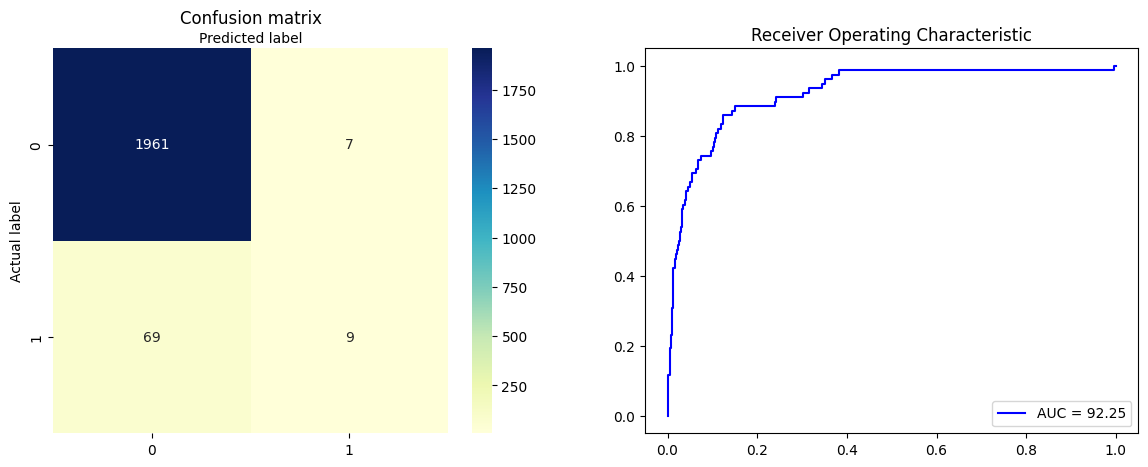

In [ ]:
print("Testing Evaluation:")
evaluation(y_test, y_pred_1, y_pred_1_prob)

### Model Selection

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.968672  0.989837  0.979140      1968
           1   0.428571  0.192308  0.265487        78

    accuracy                       0.959433      2046
   macro avg   0.698622  0.591073  0.622314      2046
weighted avg   0.948082  0.959433  0.951934      2046





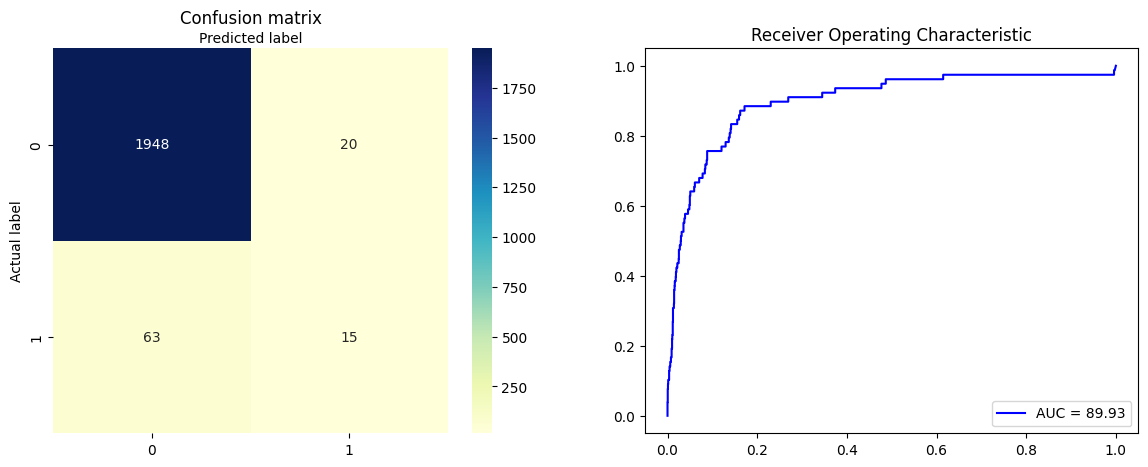

In [ ]:
# Build 2 additional models by training data X_train_2 and X_train_3
clf2 = LogisticRegression(**model_setup).fit(X_train_2, y_train)

y_pred_2 = clf2.predict(X_test_2)
y_pred_2_prob = clf2.predict_proba(X_test_2)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred_2, y_pred_2_prob)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.968364  0.995427  0.981709      1968
           1   0.608696  0.179487  0.277228        78

    accuracy                       0.964321      2046
   macro avg   0.788530  0.587457  0.629468      2046
weighted avg   0.954652  0.964321  0.954852      2046





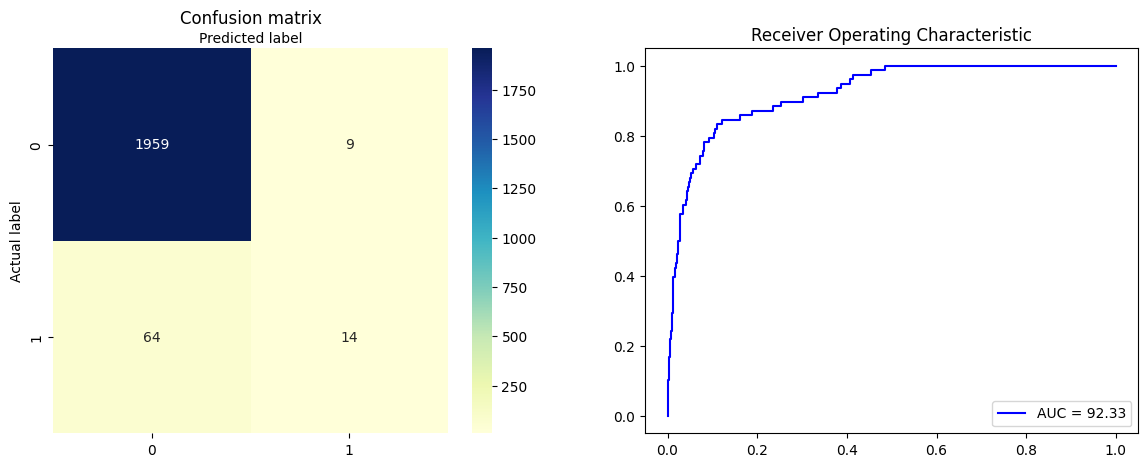

In [ ]:
clf3 = LogisticRegression(**model_setup).fit(X_train_3, y_train)

y_pred_3 = clf3.predict(X_test_3)
y_pred_3_prob = clf3.predict_proba(X_test_3)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred_3, y_pred_3_prob)

### Regularization

In [ ]:
# Setup default model parameters
model_setup={'fit_intercept': True, 'random_state': 42, 
             'max_iter':10000, 'solver': 'lbfgs', 'penalty': 'none'}

Strategy 1: Lasso Regularization

In [ ]:
# Lasso Regularization parameter setting
model_setup['penalty'] = 'l1'
model_setup['solver'] = 'liblinear'

Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.966914  0.994919  0.980716      1968
           1   0.523810  0.141026  0.222222        78

    accuracy                       0.962366      2046
   macro avg   0.745362  0.567972  0.601469      2046
weighted avg   0.950021  0.962366  0.951800      2046





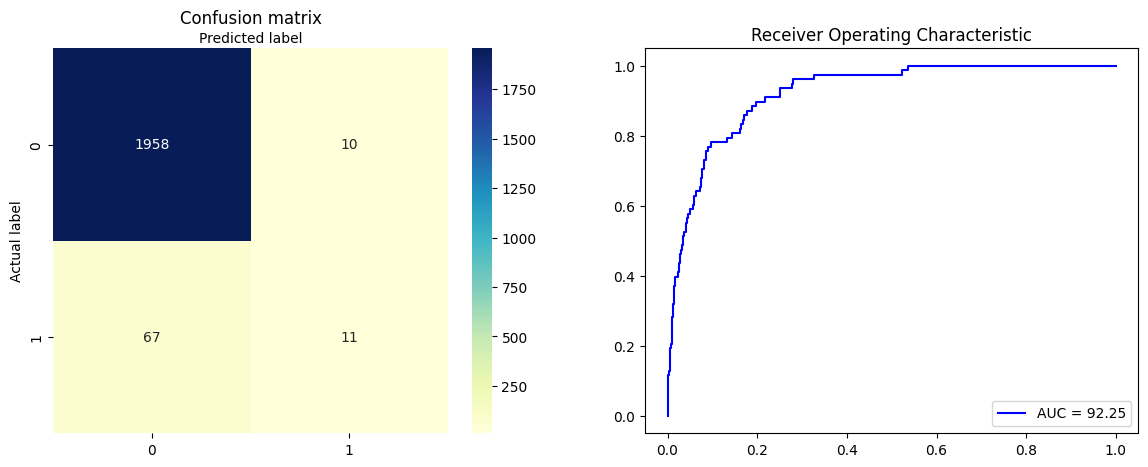

In [ ]:
clflasso = LogisticRegression(**model_setup).fit(X_train_2, y_train)

y_pred = clflasso.predict(X_test_2)
y_pred_prob = clflasso.predict_proba(X_test_2)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred, y_pred_prob)

Strategy 2: Ridge Regularization

In [ ]:
# Ridge Regularization parameter setting
model_setup['penalty'] = 'l2'
model_setup['solver'] = 'liblinear'

Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.967822  0.993394  0.980441      1968
           1   0.500000  0.166667  0.250000        78

    accuracy                       0.961877      2046
   macro avg   0.733911  0.580030  0.615221      2046
weighted avg   0.949987  0.961877  0.952595      2046





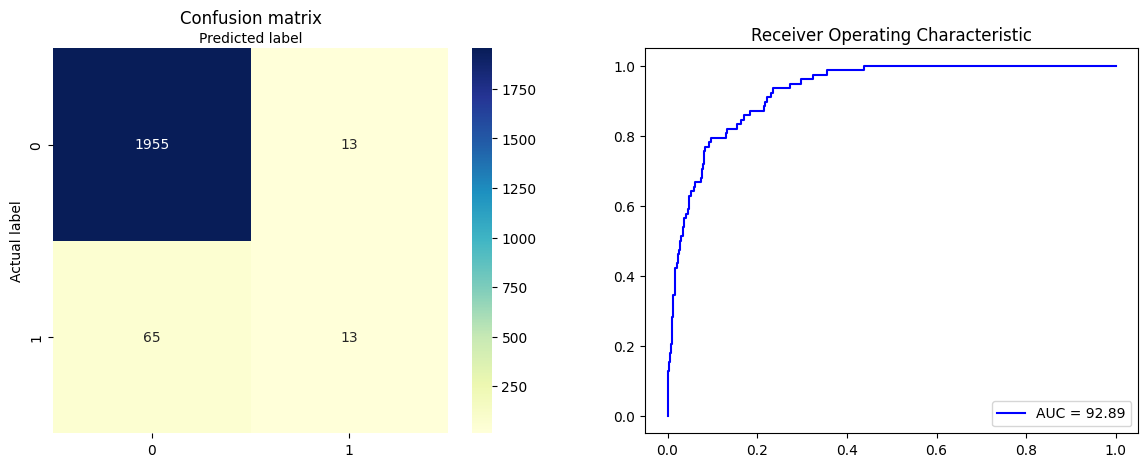

In [ ]:
clfridge = LogisticRegression(**model_setup).fit(X_train_2, y_train)

y_pred = clfridge.predict(X_test_2)
y_pred_prob = clfridge.predict_proba(X_test_2)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred, y_pred_prob)

## Balanced Logistic Regression

In [ ]:
# Setup default model parameters with the inclusion of 'class_weight': 'balanced'
model_setup={'fit_intercept': True, 'random_state': 42, 
             'max_iter':10000, 'solver': 'lbfgs', 'penalty': 'none',
             'class_weight': 'balanced'}

In [ ]:
# Create a model and fit with training data X_train_1, y_train
clf1 = LogisticRegression(**model_setup).fit(X_train_1, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [ ]:
# Get predicted results of X_test1 as y_pred1
y_pred_1 = clf1.predict(X_test_1)
y_pred_1_prob = clf1.predict_proba(X_test_1)[:,1]

### Model Evaluation

Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.993575  0.864329  0.924457      1968
           1   0.200599  0.858974  0.325243        78

    accuracy                       0.864125      2046
   macro avg   0.597087  0.861652  0.624850      2046
weighted avg   0.963344  0.864125  0.901613      2046





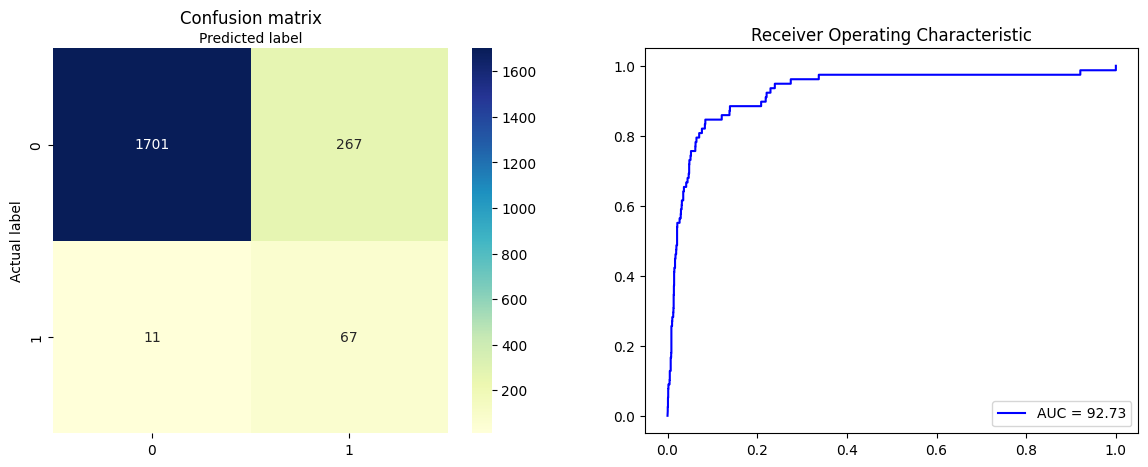

In [ ]:
# Print the accuracy
from sklearn.metrics import accuracy_score

print("Testing Evaluation:")
evaluation(y_test, y_pred_1, y_pred_1_prob)

### Model Selection

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.989093  0.875508  0.928841      1968
           1   0.194079  0.756410  0.308901        78

    accuracy                       0.870968      2046
   macro avg   0.591586  0.815959  0.618871      2046
weighted avg   0.958785  0.870968  0.905207      2046





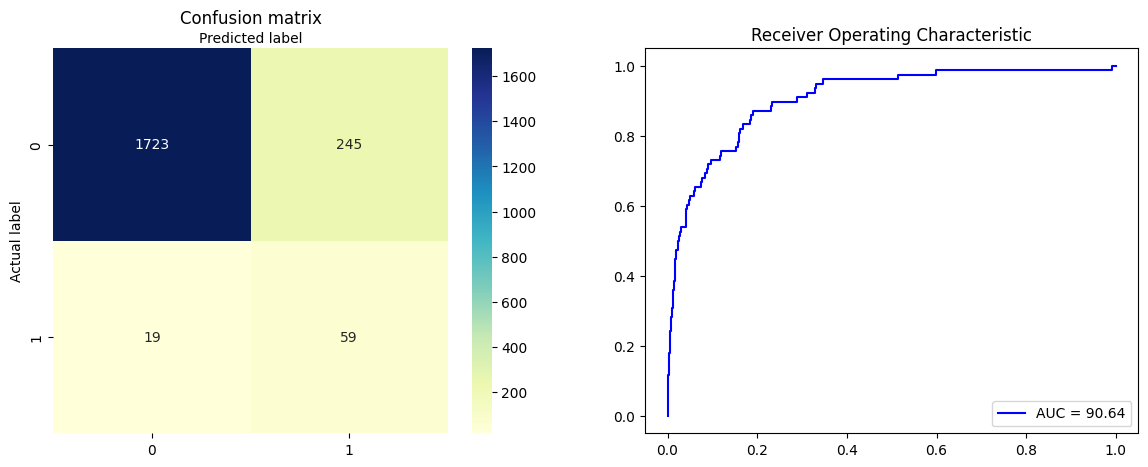

In [ ]:
# Build 2 additional models by training data X_train_2 and X_train_3
clf2 = LogisticRegression(**model_setup).fit(X_train_2, y_train)

y_pred_2 = clf2.predict(X_test_2)
y_pred_2_prob = clf2.predict_proba(X_test_2)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred_2, y_pred_2_prob)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.993464  0.849593  0.915913      1968
           1   0.184573  0.858974  0.303855        78

    accuracy                       0.849951      2046
   macro avg   0.589019  0.854284  0.609884      2046
weighted avg   0.962627  0.849951  0.892580      2046





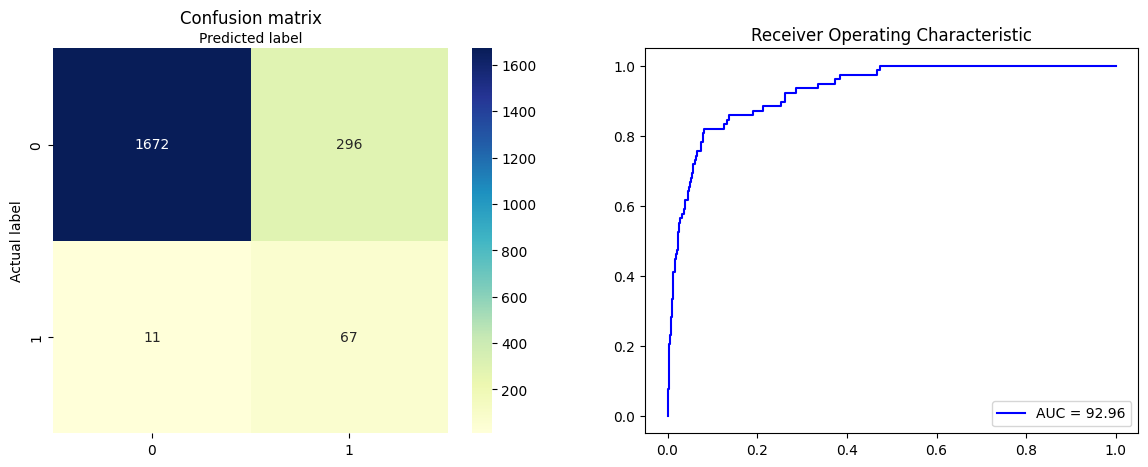

In [ ]:
clf3 = LogisticRegression(**model_setup).fit(X_train_3, y_train)

y_pred_3 = clf3.predict(X_test_3)
y_pred_3_prob = clf3.predict_proba(X_test_3)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred_3, y_pred_3_prob)

### Regularization

In [ ]:
# Setup default model parameters
model_setup={'fit_intercept': True, 'random_state': 42, 
             'max_iter':10000, 'solver': 'lbfgs', 'penalty': 'none',
             'class_weight': 'balanced'}

Strategy 1: Lasso Regularization

In [ ]:
# Lasso Regularization parameter setting
model_setup['penalty'] = 'l1'
model_setup['solver'] = 'liblinear'

Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.993448  0.847561  0.914724      1968
           1   0.182561  0.858974  0.301124        78

    accuracy                       0.847996      2046
   macro avg   0.588005  0.853268  0.607924      2046
weighted avg   0.962535  0.847996  0.891332      2046





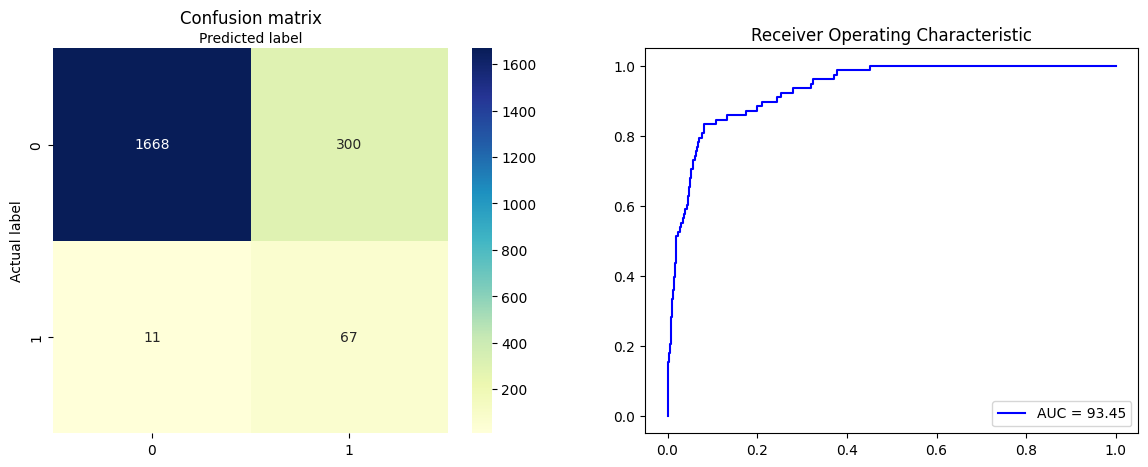

In [ ]:
clflasso = LogisticRegression(**model_setup).fit(X_train_3, y_train)

y_pred = clflasso.predict(X_test_3)
y_pred_prob = clflasso.predict_proba(X_test_3)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred, y_pred_prob)

Strategy 2: Ridge Regularization

In [ ]:
# Ridge Regularization parameter setting
model_setup['penalty'] = 'l2'
model_setup['solver'] = 'liblinear'

Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.993433  0.845528  0.913533      1968
           1   0.180593  0.858974  0.298441        78

    accuracy                       0.846041      2046
   macro avg   0.587013  0.852251  0.605987      2046
weighted avg   0.962445  0.846041  0.890084      2046





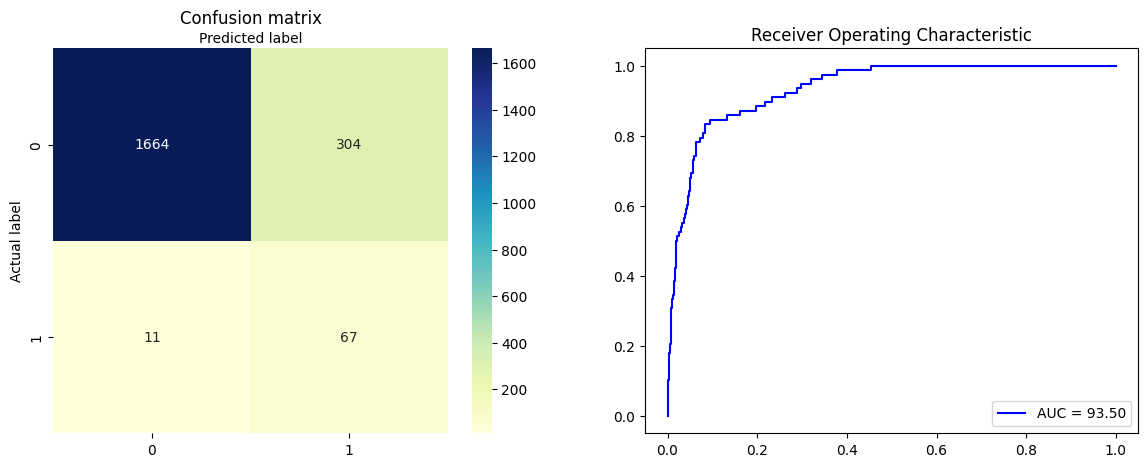

In [ ]:
clfridge = LogisticRegression(**model_setup).fit(X_train_3, y_train)

y_pred = clfridge.predict(X_test_3)
y_pred_prob = clfridge.predict_proba(X_test_3)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred, y_pred_prob)

## Undersampling Logistic Regression

### Using Near Miss Algorithm

In [ ]:
from collections import Counter
from imblearn.under_sampling import NearMiss

# Apply NearMiss to balance the dataset
nm = NearMiss()
X_train_1_resam, y_train_1_resam = nm.fit_resample(X_train_1,y_train)

print('Resampled dataset shape {}'.format(Counter(y_train_1_resam)))

Resampled dataset shape Counter({0: 142, 1: 142})


In [ ]:
# Setup default model parameters

model_setup={'fit_intercept': True, 'random_state': 42, 
             'max_iter':100000, 'solver': 'lbfgs', 'penalty': 'none'}

In [ ]:
# Create a model and fit with training data X_train_1_resam, y_train_1_resam
clf1 = LogisticRegression(**model_setup).fit(X_train_1_resam, y_train_1_resam)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [ ]:
# Get predicted results of X_test1 as y_pred1
y_pred_1 = clf1.predict(X_test_1)
y_pred_1_prob = clf1.predict_proba(X_test_1)[:,1]

#### Model Evaluation

Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.992486  0.872459  0.928610      1968
           1   0.205696  0.833333  0.329949        78

    accuracy                       0.870968      2046
   macro avg   0.599091  0.852896  0.629280      2046
weighted avg   0.962491  0.870968  0.905787      2046





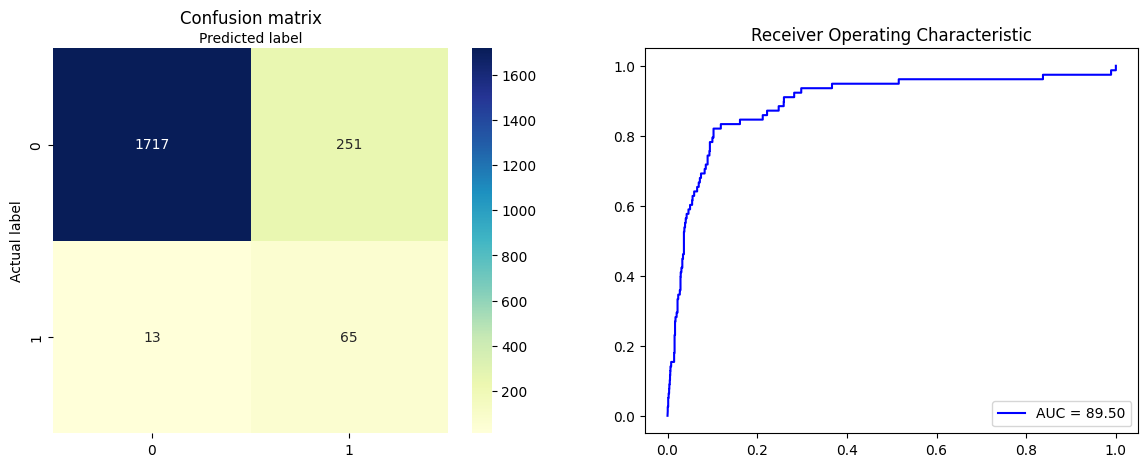

In [ ]:
# Print the accuracy
from sklearn.metrics import accuracy_score

print("Testing Evaluation:")
evaluation(y_test, y_pred_1, y_pred_1_prob)

#### Model Selection

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.987730  0.409045  0.578512      1968
           1   0.055240  0.871795  0.103896        78

    accuracy                       0.426686      2046
   macro avg   0.521485  0.640420  0.341204      2046
weighted avg   0.952181  0.426686  0.560419      2046





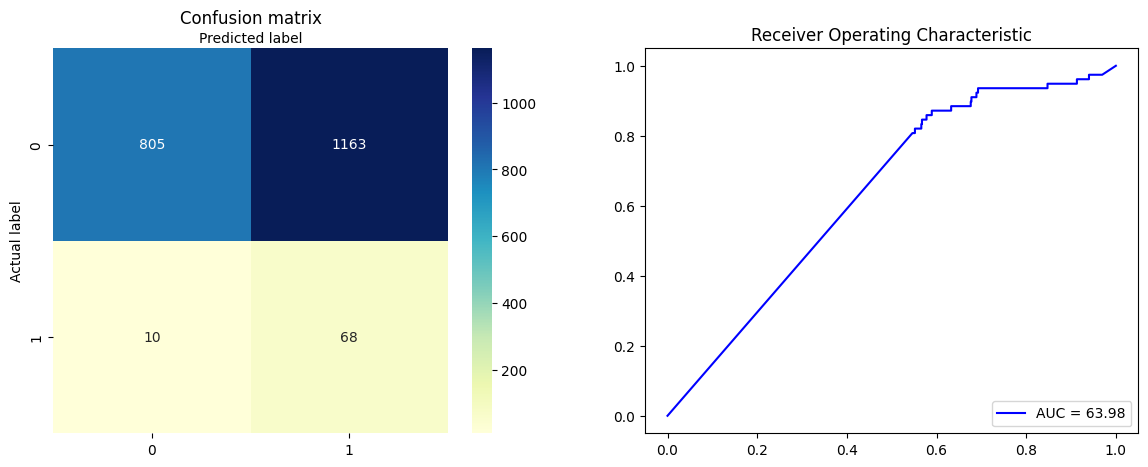

In [ ]:
# Apply NearMiss to balance the other 2 datasets
X_train_2_resam, y_train_2_resam = nm.fit_resample(X_train_2,y_train)

# Build 2 additional models by training data X_train_2 and X_train_3
clf2 = LogisticRegression(**model_setup).fit(X_train_2_resam, y_train_2_resam)

y_pred_2 = clf2.predict(X_test_2)
y_pred_2_prob = clf2.predict_proba(X_test_2)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred_2, y_pred_2_prob)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.977805  0.402947  0.570709      1968
           1   0.048583  0.769231  0.091394        78

    accuracy                       0.416911      2046
   macro avg   0.513194  0.586089  0.331051      2046
weighted avg   0.942380  0.416911  0.552436      2046





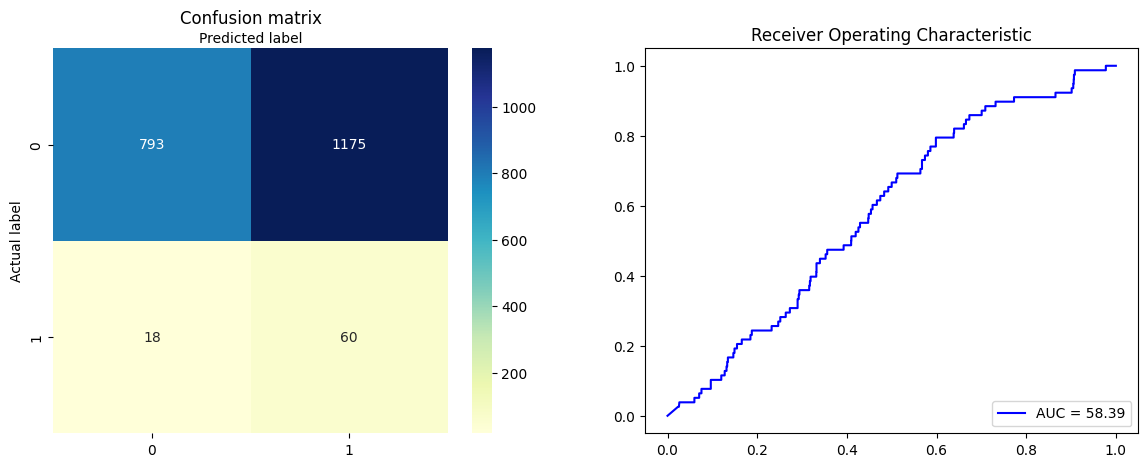

In [ ]:
X_train_3_resam, y_train_3_resam = nm.fit_resample(X_train_3,y_train)

clf3 = LogisticRegression(**model_setup).fit(X_train_3_resam, y_train_3_resam)

y_pred_3 = clf3.predict(X_test_3)
y_pred_3_prob = clf3.predict_proba(X_test_3)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred_3, y_pred_3_prob)

#### Regularization

In [ ]:
# Setup default model parameters
model_setup={'fit_intercept': True, 'random_state': 42, 
             'max_iter':10000, 'solver': 'lbfgs', 'penalty': 'none'}

Strategy 1: Lasso Regularization

In [ ]:
# Lasso Regularization parameter setting
model_setup['penalty'] = 'l1'
model_setup['solver'] = 'liblinear'

Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.991492  0.888211  0.937014      1968
           1   0.222615  0.807692  0.349030        78

    accuracy                       0.885142      2046
   macro avg   0.607053  0.847952  0.643022      2046
weighted avg   0.962180  0.885142  0.914598      2046





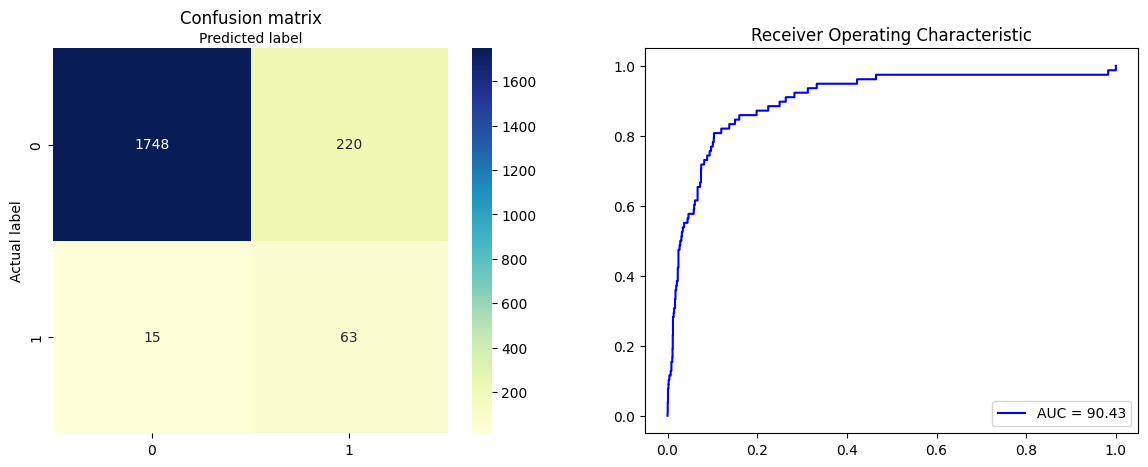

In [ ]:
clflasso = LogisticRegression(**model_setup).fit(X_train_1_resam, y_train_1_resam)

y_pred = clflasso.predict(X_test_1)
y_pred_prob = clflasso.predict_proba(X_test_1)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred, y_pred_prob)

Strategy 2: Ridge Regularization

In [ ]:
# Ridge Regularization parameter setting
model_setup['penalty'] = 'l2'
model_setup['solver'] = 'liblinear'

Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.990857  0.881098  0.932760      1968
           1   0.209459  0.794872  0.331551        78

    accuracy                       0.877810      2046
   macro avg   0.600158  0.837985  0.632155      2046
weighted avg   0.961068  0.877810  0.909840      2046





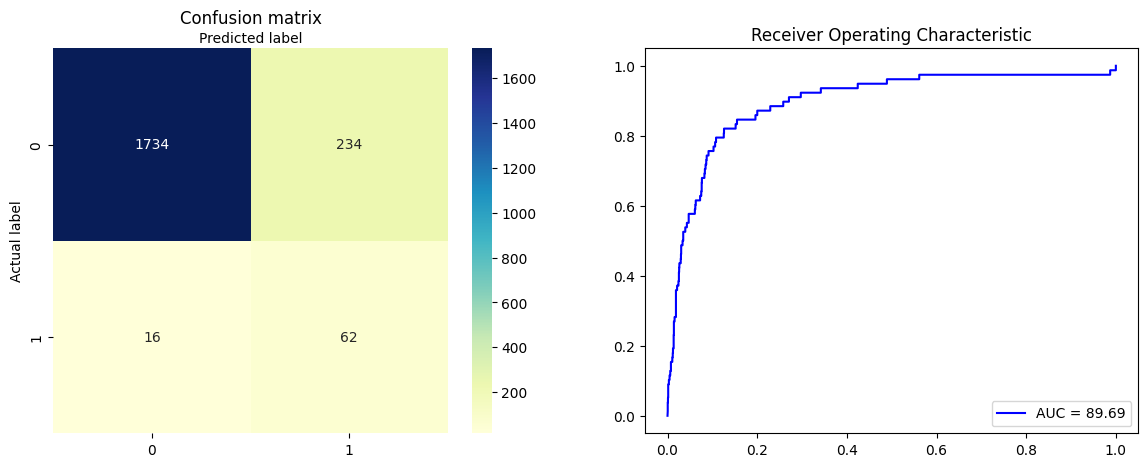

In [ ]:
clfridge = LogisticRegression(**model_setup).fit(X_train_1_resam, y_train_1_resam)

y_pred = clfridge.predict(X_test_1)
y_pred_prob = clfridge.predict_proba(X_test_1)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred, y_pred_prob)

###Using Random Undersampling Algorithm

In [ ]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# Apply Random Undersampling to balance the dataset
rus = RandomUnderSampler()
X_train_1_resam, y_train_1_resam = rus.fit_resample(X_train_1,y_train)

print('Resampled dataset shape {}'.format(Counter(y_train_1_resam)))

Resampled dataset shape Counter({0: 142, 1: 142})


In [ ]:
# Setup default model parameters

model_setup={'fit_intercept': True, 'random_state': 42, 
             'max_iter':100000, 'solver': 'lbfgs', 'penalty': 'none'}

In [ ]:
# Create a model and fit with training data X_train_1_resam, y_train_1_resam
clf1 = LogisticRegression(**model_setup).fit(X_train_1_resam, y_train_1_resam)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [ ]:
# Get predicted results of X_test1 as y_pred1
y_pred_1 = clf1.predict(X_test_1)
y_pred_1_prob = clf1.predict_proba(X_test_1)[:,1]

#### Model Evaluation

Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.994055  0.849593  0.916164      1968
           1   0.186813  0.871795  0.307692        78

    accuracy                       0.850440      2046
   macro avg   0.590434  0.860694  0.611928      2046
weighted avg   0.963280  0.850440  0.892968      2046





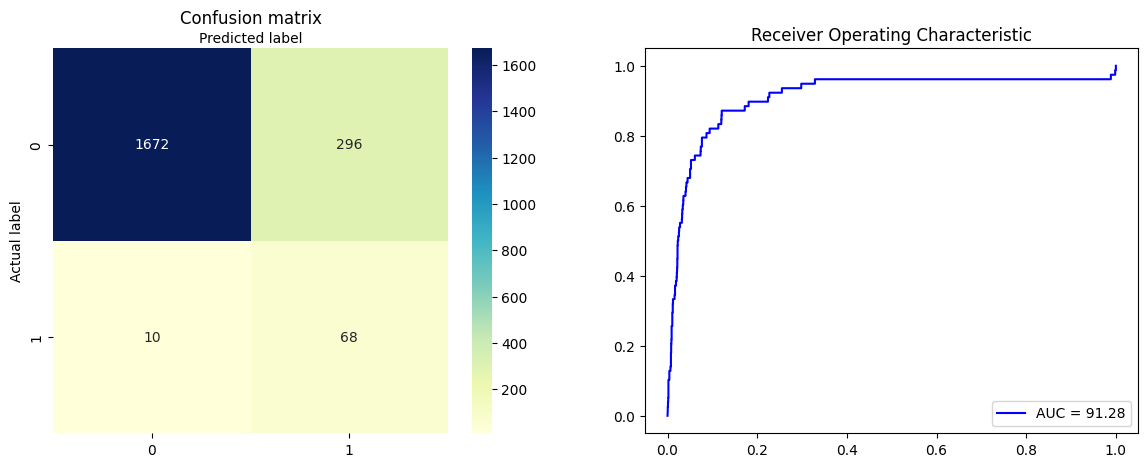

In [ ]:
# Print the accuracy
from sklearn.metrics import accuracy_score

print("Testing Evaluation:")
evaluation(y_test, y_pred_1, y_pred_1_prob)

#### Model Selection

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.984983  0.733232  0.840664      1968
           1   0.096386  0.717949  0.169954        78

    accuracy                       0.732649      2046
   macro avg   0.540684  0.725590  0.505309      2046
weighted avg   0.951107  0.732649  0.815095      2046





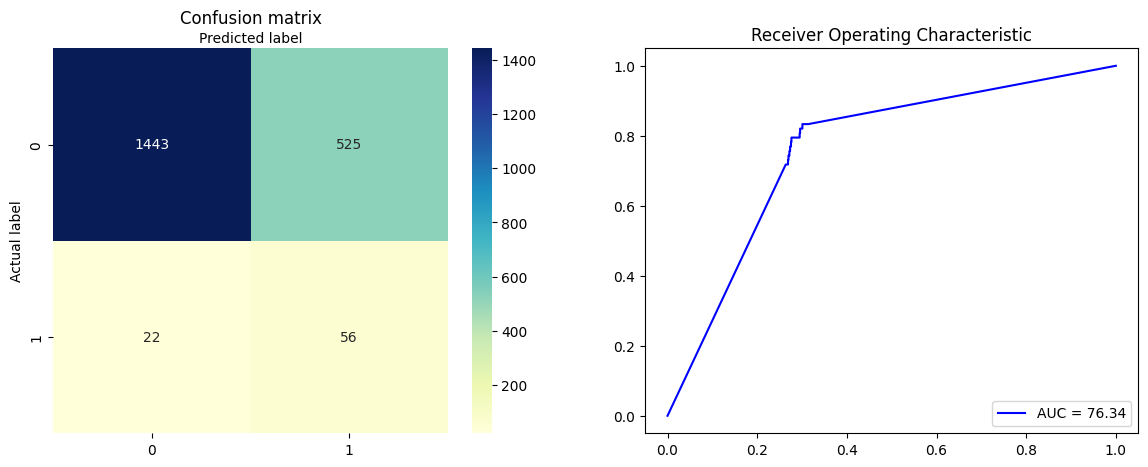

In [ ]:
# Apply Random Undersampling to balance the other 2 datasets
X_train_2_resam, y_train_2_resam = rus.fit_resample(X_train_2,y_train)

# Build 2 additional models by training data X_train_2 and X_train_3
clf2 = LogisticRegression(**model_setup).fit(X_train_2_resam, y_train_2_resam)

y_pred_2 = clf2.predict(X_test_2)
y_pred_2_prob = clf2.predict_proba(X_test_2)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred_2, y_pred_2_prob)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.994336  0.802846  0.888389      1968
           1   0.150985  0.884615  0.257944        78

    accuracy                       0.805963      2046
   macro avg   0.572660  0.843730  0.573167      2046
weighted avg   0.962185  0.805963  0.864355      2046





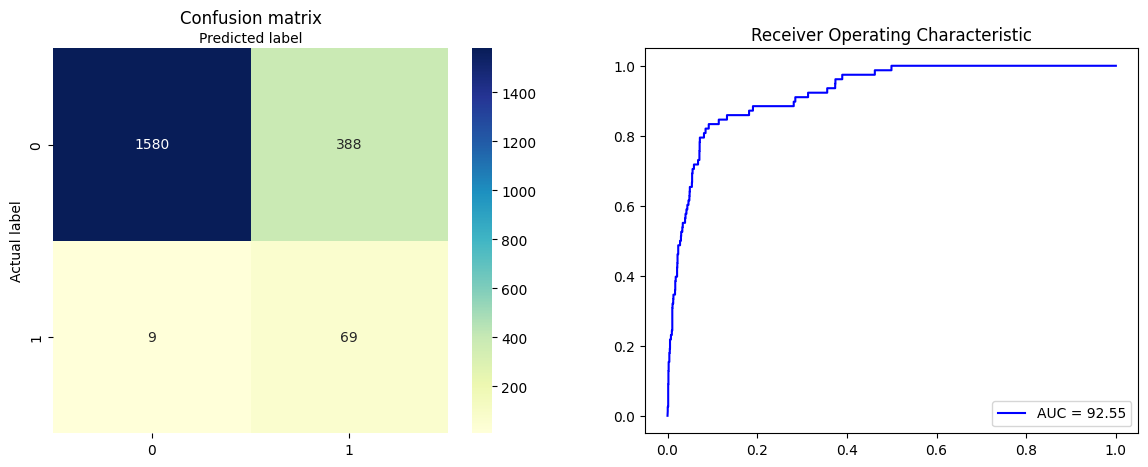

In [ ]:
X_train_3_resam, y_train_3_resam = rus.fit_resample(X_train_3,y_train)

clf3 = LogisticRegression(**model_setup).fit(X_train_3_resam, y_train_3_resam)

y_pred_3 = clf3.predict(X_test_3)
y_pred_3_prob = clf3.predict_proba(X_test_3)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred_3, y_pred_3_prob)

#### Regularization

In [ ]:
# Setup default model parameters
model_setup={'fit_intercept': True, 'random_state': 42, 
             'max_iter':10000, 'solver': 'lbfgs', 'penalty': 'none'}

Strategy 1: Lasso Regularization

In [ ]:
# Lasso Regularization parameter setting
model_setup['penalty'] = 'l1'
model_setup['solver'] = 'liblinear'

Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.996299  0.820630  0.899972      1968
           1   0.169412  0.923077  0.286282        78

    accuracy                       0.824536      2046
   macro avg   0.582855  0.871854  0.593127      2046
weighted avg   0.964775  0.824536  0.876576      2046





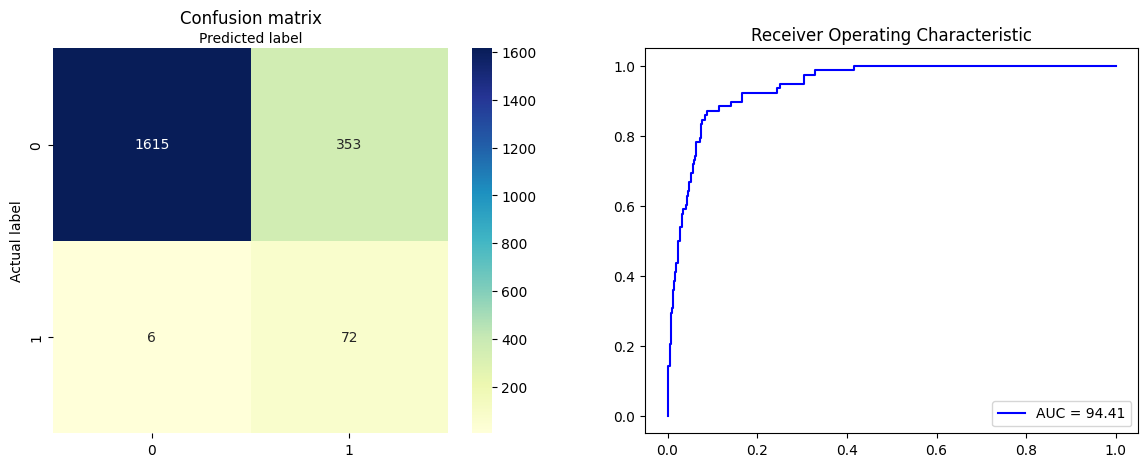

In [ ]:
clflasso = LogisticRegression(**model_setup).fit(X_train_3_resam, y_train_3_resam)

y_pred = clflasso.predict(X_test_3)
y_pred_prob = clflasso.predict_proba(X_test_3)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred, y_pred_prob)

Strategy 2: Ridge Regularization

In [ ]:
# Ridge Regularization parameter setting
model_setup['penalty'] = 'l2'
model_setup['solver'] = 'liblinear'

Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.994965  0.803354  0.888951      1968
           1   0.153173  0.897436  0.261682        78

    accuracy                       0.806940      2046
   macro avg   0.574069  0.850395  0.575317      2046
weighted avg   0.962874  0.806940  0.865038      2046





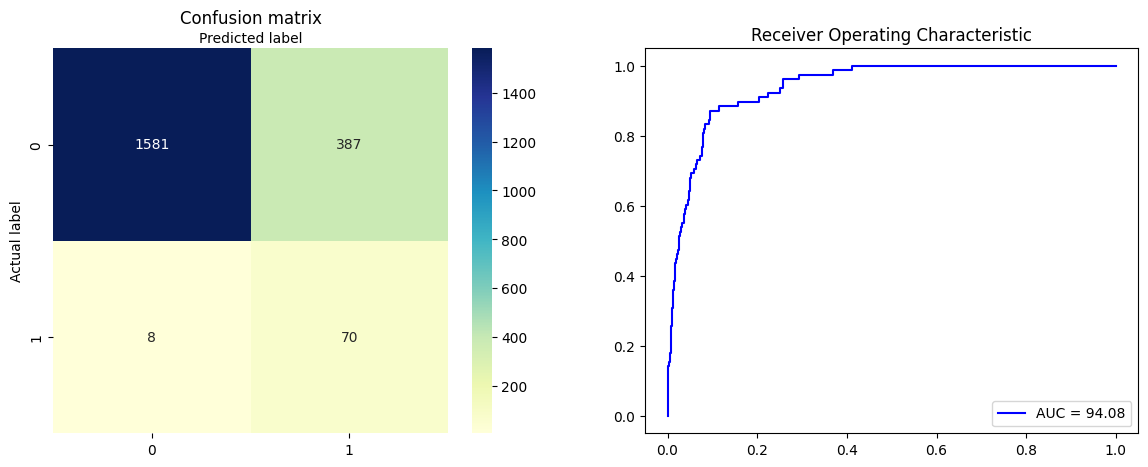

In [ ]:
clfridge = LogisticRegression(**model_setup).fit(X_train_3_resam, y_train_3_resam)

y_pred = clfridge.predict(X_test_3)
y_pred_prob = clfridge.predict_proba(X_test_3)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred, y_pred_prob)

### Using TomekLink Algorithm

In [ ]:
from collections import Counter
from imblearn.under_sampling import TomekLinks

# Apply TomekLinks to balance the dataset
tl = TomekLinks()
X_train_1_resam, y_train_1_resam = tl.fit_resample(X_train_1,y_train)

print('Resampled dataset shape {}'.format(Counter(y_train_1_resam)))

Resampled dataset shape Counter({0: 4577, 1: 142})


In [ ]:
# Setup default model parameters

model_setup={'fit_intercept': True, 'random_state': 42, 
             'max_iter':10000, 'solver': 'lbfgs', 'penalty': 'none'}

In [ ]:
# Create a model and fit with training data X_train_1_resam, y_train_1_resam
clf1 = LogisticRegression(**model_setup).fit(X_train_1_resam, y_train_1_resam)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [ ]:
# Get predicted results of X_test1 as y_pred1
y_pred_1 = clf1.predict(X_test_1)
y_pred_1_prob = clf1.predict_proba(X_test_1)[:,1]

#### Model Evaluation

Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.966930  0.995427  0.980971      1968
           1   0.550000  0.141026  0.224490        78

    accuracy                       0.962854      2046
   macro avg   0.758465  0.568226  0.602731      2046
weighted avg   0.951035  0.962854  0.952132      2046





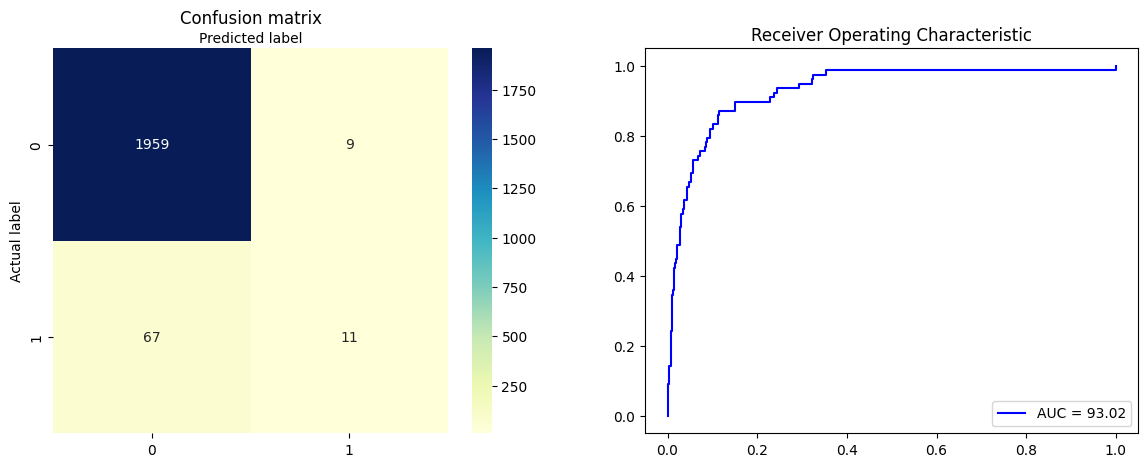

In [ ]:
# Print the accuracy
from sklearn.metrics import accuracy_score

print("Testing Evaluation:")
evaluation(y_test, y_pred_1, y_pred_1_prob)

#### Model Selection

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.969667  0.990854  0.980146      1968
           1   0.485714  0.217949  0.300885        78

    accuracy                       0.961388      2046
   macro avg   0.727691  0.604401  0.640515      2046
weighted avg   0.951217  0.961388  0.954250      2046





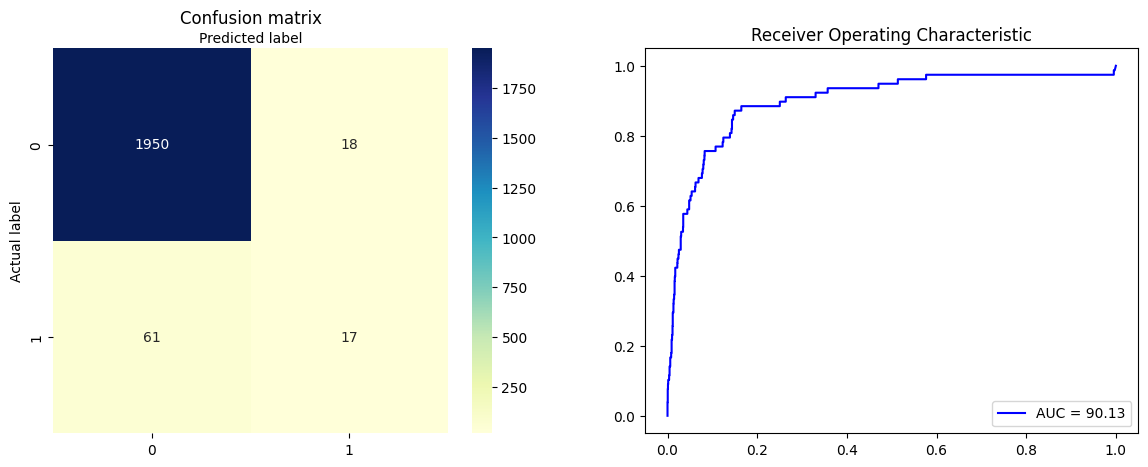

In [ ]:
# Apply TomekLinks to balance the other 2 datasets
X_train_2_resam, y_train_2_resam = tl.fit_resample(X_train_2,y_train)

# Build 2 additional models by training data X_train_2 and X_train_3
clf2 = LogisticRegression(**model_setup).fit(X_train_2_resam, y_train_2_resam)

y_pred_2 = clf2.predict(X_test_2)
y_pred_2_prob = clf2.predict_proba(X_test_2)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred_2, y_pred_2_prob)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.968812  0.994411  0.981444      1968
           1   0.576923  0.192308  0.288462        78

    accuracy                       0.963832      2046
   macro avg   0.772867  0.593359  0.634953      2046
weighted avg   0.953872  0.963832  0.955026      2046





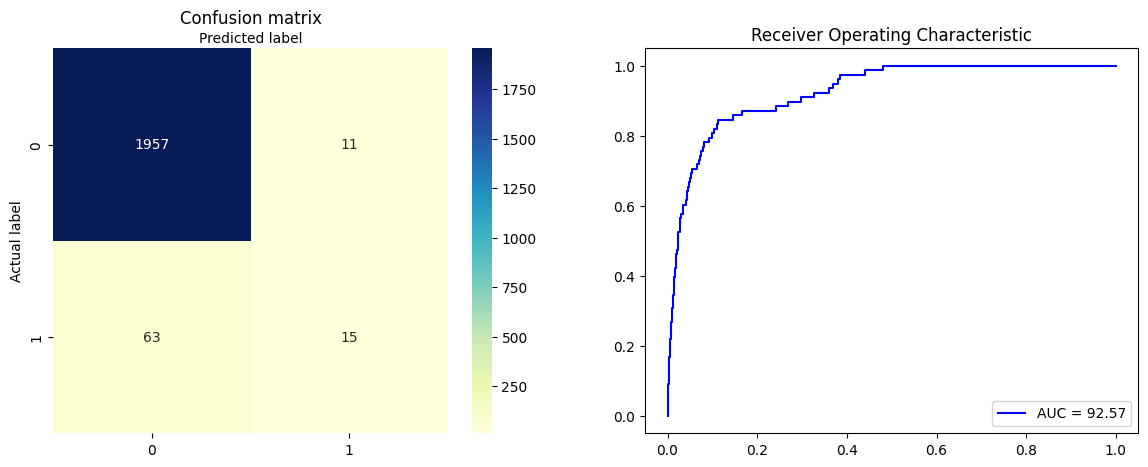

In [ ]:
X_train_3_resam, y_train_3_resam = tl.fit_resample(X_train_3,y_train)

clf3 = LogisticRegression(**model_setup).fit(X_train_3_resam, y_train_3_resam)

y_pred_3 = clf3.predict(X_test_3)
y_pred_3_prob = clf3.predict_proba(X_test_3)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred_3, y_pred_3_prob)

#### Regularization

In [ ]:
# Setup default model parameters
model_setup={'fit_intercept': True, 'random_state': 42, 
             'max_iter':10000, 'solver': 'lbfgs', 'penalty': 'none'}

Strategy 1: Lasso Regularization

In [ ]:
# Lasso Regularization parameter setting
model_setup['penalty'] = 'l1'
model_setup['solver'] = 'liblinear'

Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.967375  0.994411  0.980707      1968
           1   0.521739  0.153846  0.237624        78

    accuracy                       0.962366      2046
   macro avg   0.744557  0.574128  0.609165      2046
weighted avg   0.950386  0.962366  0.952378      2046





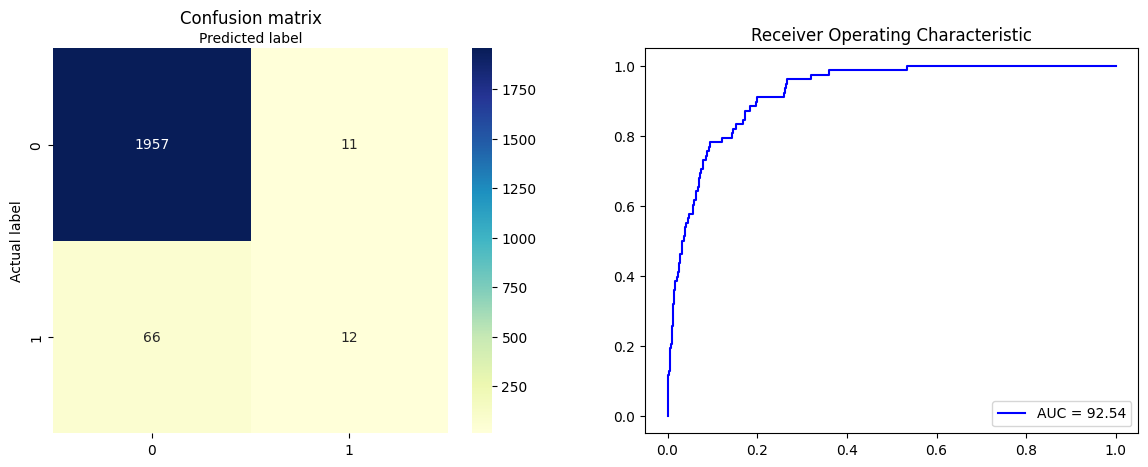

In [ ]:
clflasso = LogisticRegression(**model_setup).fit(X_train_2_resam, y_train_2_resam)

y_pred = clflasso.predict(X_test_2)
y_pred_prob = clflasso.predict_proba(X_test_2)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred, y_pred_prob)

Strategy 2: Ridge Regularization

In [ ]:
# Ridge Regularization parameter setting
model_setup['penalty'] = 'l2'
model_setup['solver'] = 'liblinear'

Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.967822  0.993394  0.980441      1968
           1   0.500000  0.166667  0.250000        78

    accuracy                       0.961877      2046
   macro avg   0.733911  0.580030  0.615221      2046
weighted avg   0.949987  0.961877  0.952595      2046





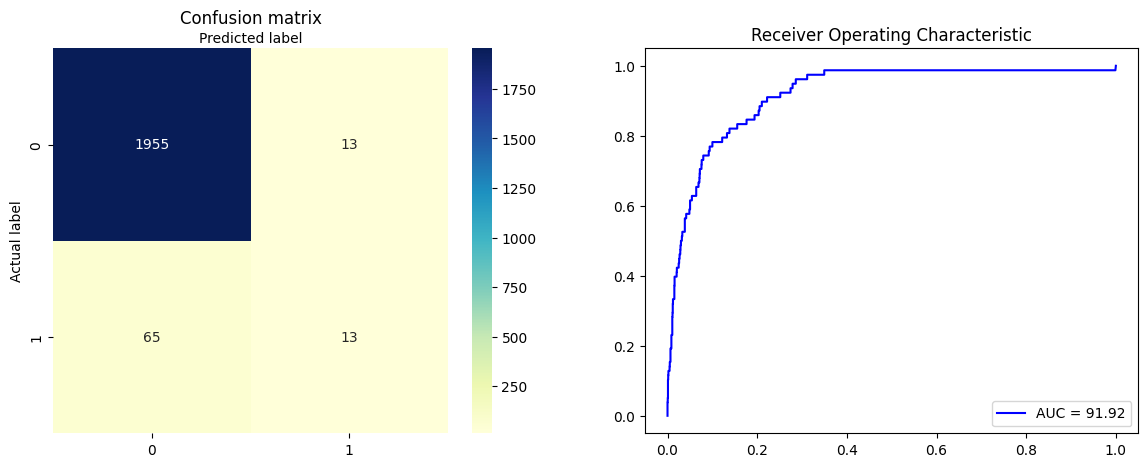

In [ ]:
clflasso = LogisticRegression(**model_setup).fit(X_train_2_resam, y_train_2_resam)

y_pred = clflasso.predict(X_test_2)
y_pred_prob = clflasso.predict_proba(X_test_2)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred, y_pred_prob)

### Using EditedNearestNeighbours Algorithm

In [ ]:
from collections import Counter
from imblearn.under_sampling import EditedNearestNeighbours

# Apply EditedNearestNeighbours to balance the dataset
enn = EditedNearestNeighbours()
X_train_1_resam, y_train_1_resam = enn.fit_resample(X_train_1,y_train)

print('Resampled dataset shape {}'.format(Counter(y_train_1_resam)))

Resampled dataset shape Counter({0: 4401, 1: 142})


In [ ]:
# Setup default model parameters

model_setup={'fit_intercept': True, 'random_state': 42, 
             'max_iter':10000, 'solver': 'lbfgs', 'penalty': 'none'}

In [ ]:
# Create a model and fit with training data X_train_1_resam, y_train_1_resam
clf1 = LogisticRegression(**model_setup).fit(X_train_1_resam, y_train_1_resam)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [ ]:
# Get predicted results of X_test1 as y_pred1
y_pred_1 = clf1.predict(X_test_1)
y_pred_1_prob = clf1.predict_proba(X_test_1)[:,1]

#### Model Evaluation

Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.972486  0.987805  0.980086      1968
           1   0.489362  0.294872  0.368000        78

    accuracy                       0.961388      2046
   macro avg   0.730924  0.641338  0.674043      2046
weighted avg   0.954068  0.961388  0.956751      2046





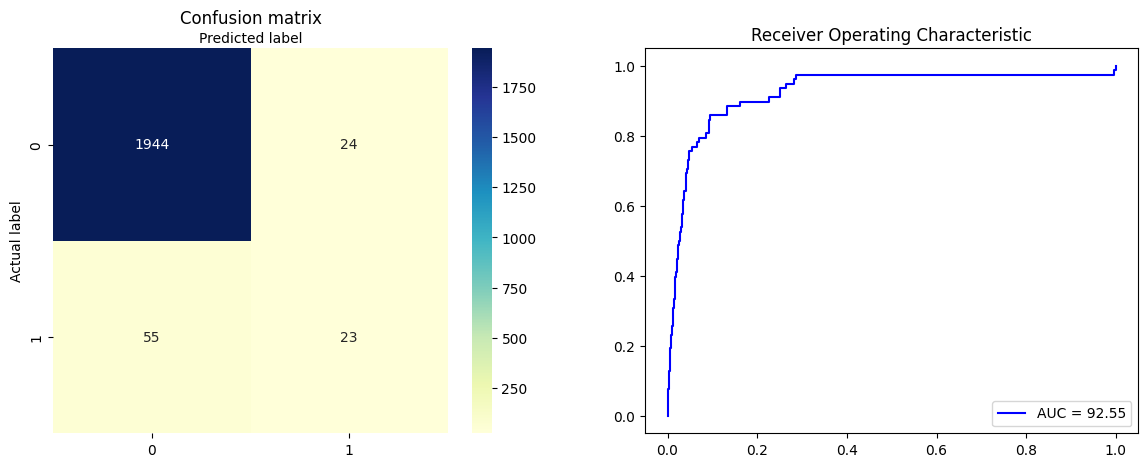

In [ ]:
# Print the accuracy
from sklearn.metrics import accuracy_score

print("Testing Evaluation:")
evaluation(y_test, y_pred_1, y_pred_1_prob)

#### Model Selection

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.979592  0.975610  0.977597      1968
           1   0.441860  0.487179  0.463415        78

    accuracy                       0.956989      2046
   macro avg   0.710726  0.731395  0.720506      2046
weighted avg   0.959092  0.956989  0.957994      2046





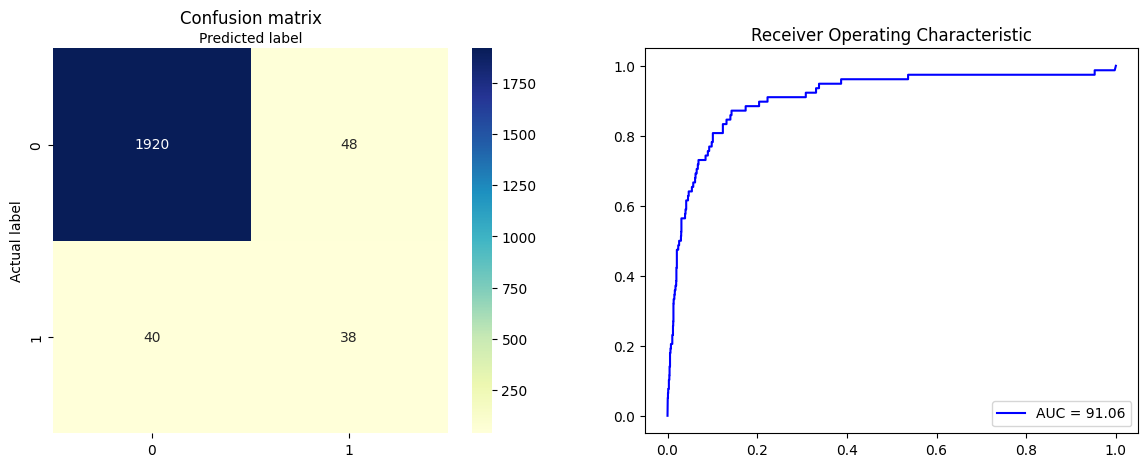

In [ ]:
# Apply EditedNearestNeighbours to balance the other 2 datasets
X_train_2_resam, y_train_2_resam = enn.fit_resample(X_train_2,y_train)

# Build 2 additional models by training data X_train_2 and X_train_3
clf2 = LogisticRegression(**model_setup).fit(X_train_2_resam, y_train_2_resam)

y_pred_2 = clf2.predict(X_test_2)
y_pred_2_prob = clf2.predict_proba(X_test_2)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred_2, y_pred_2_prob)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.976838  0.985772  0.981285      1968
           1   0.533333  0.410256  0.463768        78

    accuracy                       0.963832      2046
   macro avg   0.755086  0.698014  0.722526      2046
weighted avg   0.959930  0.963832  0.961555      2046





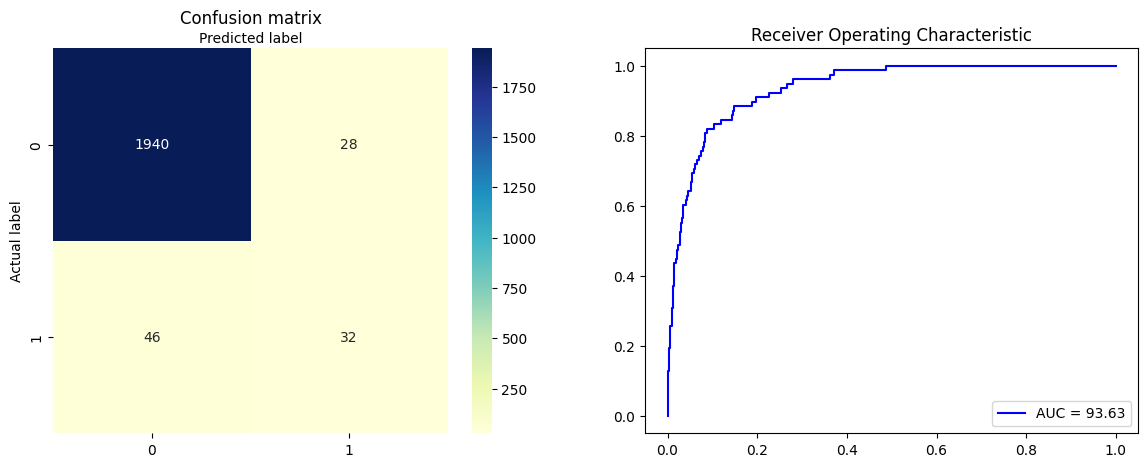

In [ ]:
X_train_3_resam, y_train_3_resam = enn.fit_resample(X_train_3,y_train)

clf3 = LogisticRegression(**model_setup).fit(X_train_3_resam, y_train_3_resam)

y_pred_3 = clf3.predict(X_test_3)
y_pred_3_prob = clf3.predict_proba(X_test_3)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred_3, y_pred_3_prob)

#### Regularization

In [ ]:
# Setup default model parameters
model_setup={'fit_intercept': True, 'random_state': 42, 
             'max_iter':10000, 'solver': 'lbfgs', 'penalty': 'none'}

Strategy 1: Lasso Regularization

In [ ]:
# Lasso Regularization parameter setting
model_setup['penalty'] = 'l1'
model_setup['solver'] = 'liblinear'

Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.975806  0.983740  0.979757      1968
           1   0.483871  0.384615  0.428571        78

    accuracy                       0.960899      2046
   macro avg   0.729839  0.684178  0.704164      2046
weighted avg   0.957052  0.960899  0.958744      2046





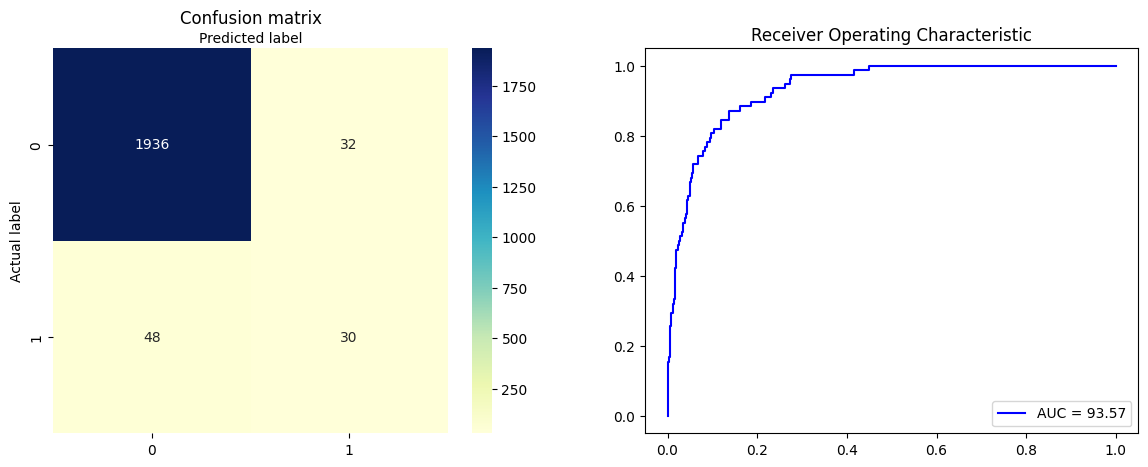

In [ ]:
clflasso = LogisticRegression(**model_setup).fit(X_train_2_resam, y_train_2_resam)

y_pred = clflasso.predict(X_test_2)
y_pred_prob = clflasso.predict_proba(X_test_2)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred, y_pred_prob)

Strategy 2: Ridge Regularization

In [ ]:
# Ridge Regularization parameter setting
model_setup['penalty'] = 'l2'
model_setup['solver'] = 'liblinear'

Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.975770  0.982215  0.978982      1968
           1   0.461538  0.384615  0.419580        78

    accuracy                       0.959433      2046
   macro avg   0.718654  0.683415  0.699281      2046
weighted avg   0.956166  0.959433  0.957656      2046





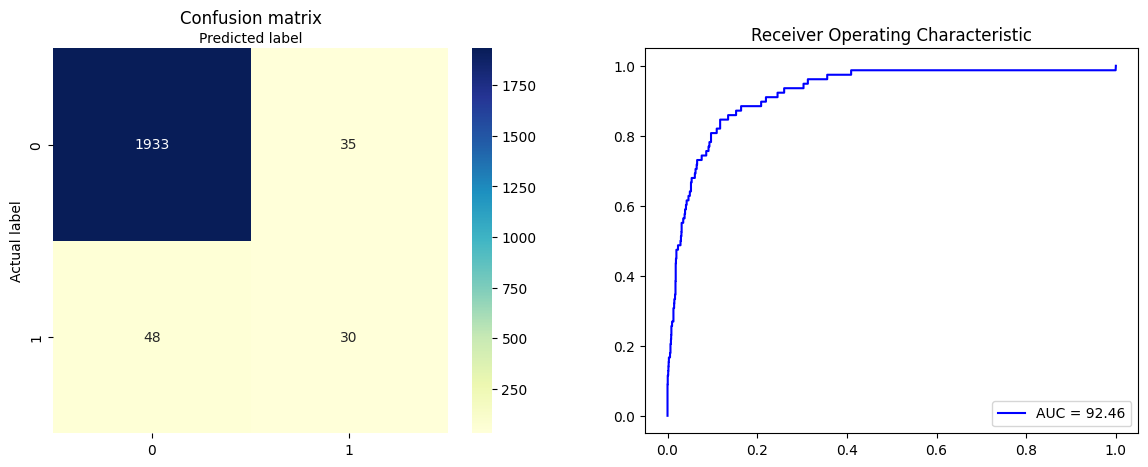

In [ ]:
clflasso = LogisticRegression(**model_setup).fit(X_train_2_resam, y_train_2_resam)

y_pred = clflasso.predict(X_test_2)
y_pred_prob = clflasso.predict_proba(X_test_2)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred, y_pred_prob)

### Using CondensedNearestNeighbours Algorithm

In [ ]:
from collections import Counter
from imblearn.under_sampling import CondensedNearestNeighbour

# Apply CondensedNearestNeighbour to balance the dataset
cnn = CondensedNearestNeighbour()
X_train_1_resam, y_train_1_resam = cnn.fit_resample(X_train_1,y_train)

print('Resampled dataset shape {}'.format(Counter(y_train_1_resam)))

Resampled dataset shape Counter({0: 345, 1: 142})


In [ ]:
# Setup default model parameters

model_setup={'fit_intercept': True, 'random_state': 42, 
             'max_iter':10000, 'solver': 'lbfgs', 'penalty': 'none'}

In [ ]:
# Create a model and fit with training data X_train_1_resam, y_train_1_resam
clf1 = LogisticRegression(**model_setup).fit(X_train_1_resam, y_train_1_resam)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [ ]:
# Get predicted results of X_test1 as y_pred1
y_pred_1 = clf1.predict(X_test_1)
y_pred_1_prob = clf1.predict_proba(X_test_1)[:,1]

#### Model Evaluation

Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.966733  0.989329  0.977901      1968
           1   0.343750  0.141026  0.200000        78

    accuracy                       0.956989      2046
   macro avg   0.655241  0.565177  0.588950      2046
weighted avg   0.942983  0.956989  0.948245      2046





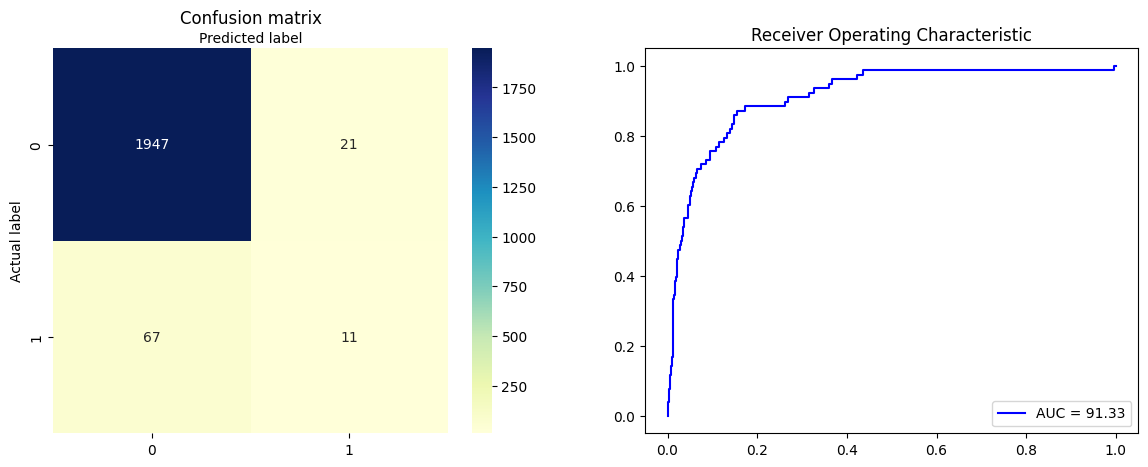

In [ ]:
# Print the accuracy
from sklearn.metrics import accuracy_score

print("Testing Evaluation:")
evaluation(y_test, y_pred_1, y_pred_1_prob)       

#### Model Selection

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.975155  0.957317  0.966154      1968
           1   0.263158  0.384615  0.312500        78

    accuracy                       0.935484      2046
   macro avg   0.619157  0.670966  0.639327      2046
weighted avg   0.948012  0.935484  0.941234      2046





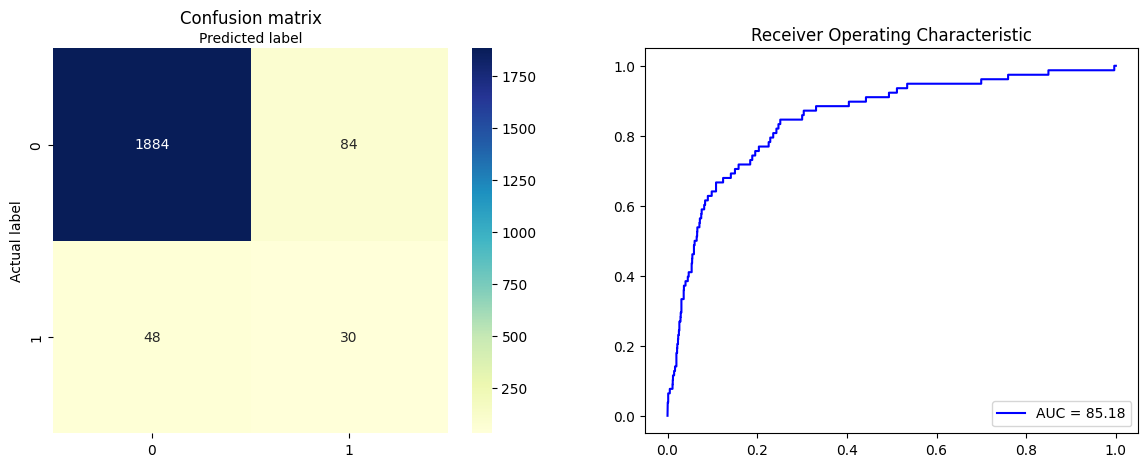

In [ ]:
# Apply CondensedNearestNeighbour to balance the other 2 datasets
X_train_2_resam, y_train_2_resam = cnn.fit_resample(X_train_2,y_train)

# Build 2 additional models by training data X_train_2 and X_train_3
clf2 = LogisticRegression(**model_setup).fit(X_train_2_resam, y_train_2_resam)

y_pred_2 = clf2.predict(X_test_2)
y_pred_2_prob = clf2.predict_proba(X_test_2)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred_2, y_pred_2_prob)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.969154  0.989837  0.979387      1968
           1   0.444444  0.205128  0.280702        78

    accuracy                       0.959922      2046
   macro avg   0.706799  0.597483  0.630044      2046
weighted avg   0.949151  0.959922  0.952751      2046





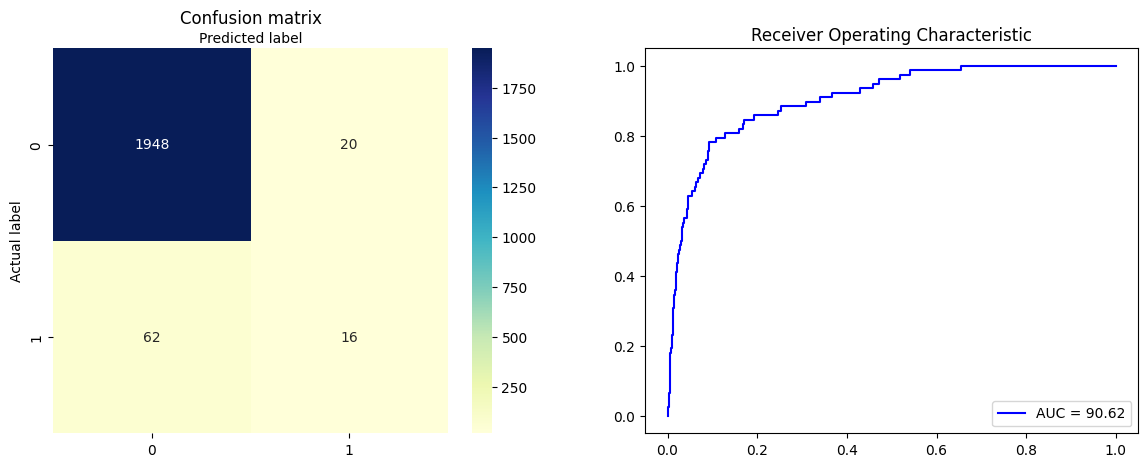

In [ ]:
X_train_3_resam, y_train_3_resam = cnn.fit_resample(X_train_3,y_train)

clf3 = LogisticRegression(**model_setup).fit(X_train_3_resam, y_train_3_resam)

y_pred_3 = clf3.predict(X_test_3)
y_pred_3_prob = clf3.predict_proba(X_test_3)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred_3, y_pred_3_prob)

#### Regularization

In [ ]:
# Setup default model parameters
model_setup={'fit_intercept': True, 'random_state': 42, 
             'max_iter':10000, 'solver': 'lbfgs', 'penalty': 'none'}

Strategy 1: Lasso Regularization

In [ ]:
# Lasso Regularization parameter setting
model_setup['penalty'] = 'l1'
model_setup['solver'] = 'liblinear'

Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.971831  0.981707  0.976744      1968
           1   0.379310  0.282051  0.323529        78

    accuracy                       0.955034      2046
   macro avg   0.675571  0.631879  0.650137      2046
weighted avg   0.949242  0.955034  0.951842      2046





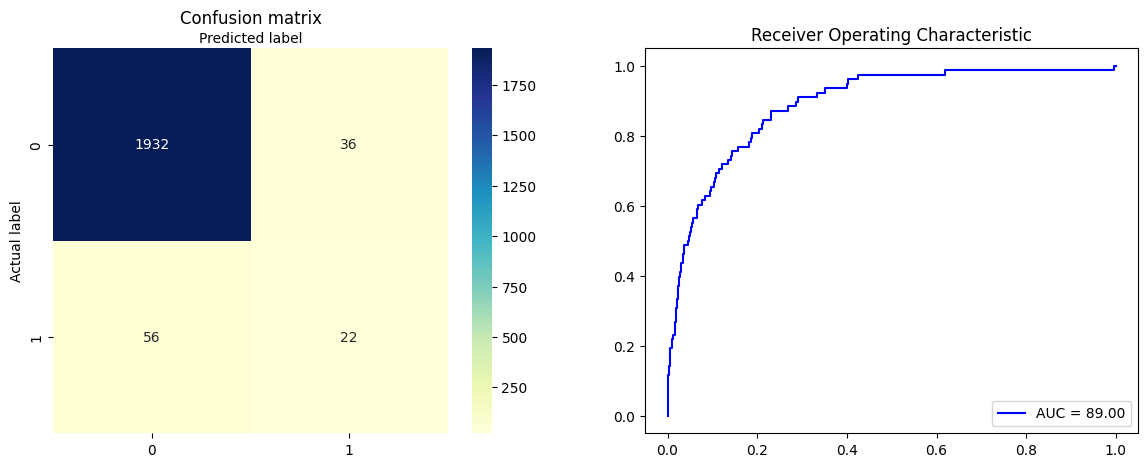

In [ ]:
clflasso = LogisticRegression(**model_setup).fit(X_train_2_resam, y_train_2_resam)

y_pred = clflasso.predict(X_test_2)
y_pred_prob = clflasso.predict_proba(X_test_2)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred, y_pred_prob)

Strategy 2: Ridge Regularization

In [ ]:
# Ridge Regularization parameter setting
model_setup['penalty'] = 'l2'
model_setup['solver'] = 'liblinear'

Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.974046  0.972561  0.973303      1968
           1   0.333333  0.346154  0.339623        78

    accuracy                       0.948680      2046
   macro avg   0.653690  0.659357  0.656463      2046
weighted avg   0.949620  0.948680  0.949145      2046





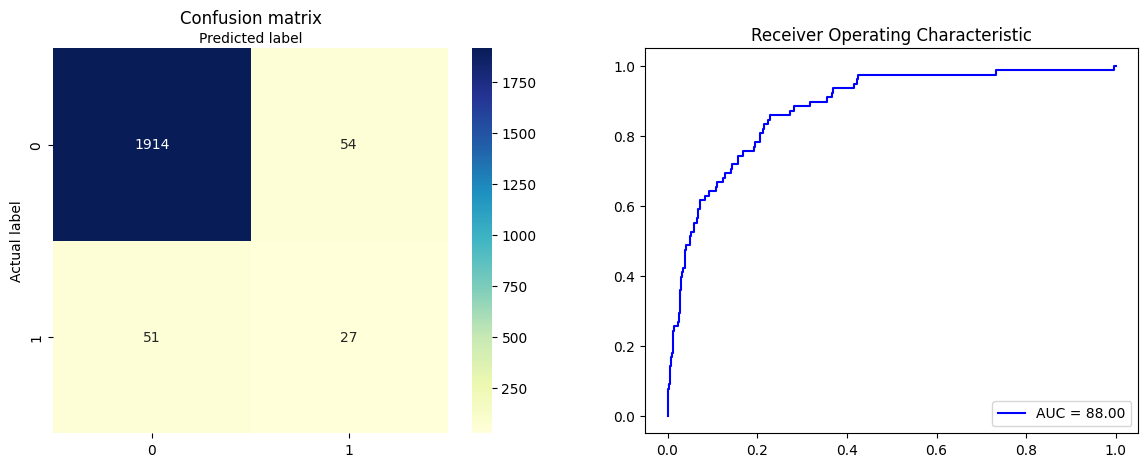

In [ ]:
clfridge = LogisticRegression(**model_setup).fit(X_train_2_resam, y_train_2_resam)

y_pred = clfridge.predict(X_test_2)
y_pred_prob = clfridge.predict_proba(X_test_2)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred, y_pred_prob)

### Using NeighbourhoodCleaningRule Algorithm

In [ ]:
from collections import Counter
from imblearn.under_sampling import NeighbourhoodCleaningRule

# Apply NeighbourhoodCleaningRule to balance the dataset
ncr = NeighbourhoodCleaningRule()
X_train_1_resam, y_train_1_resam = ncr.fit_resample(X_train_1,y_train)

print('Resampled dataset shape {}'.format(Counter(y_train_1_resam)))

Resampled dataset shape Counter({0: 4371, 1: 142})


In [ ]:
# Setup default model parameters

model_setup={'fit_intercept': True, 'random_state': 42, 
             'max_iter':10000, 'solver': 'lbfgs', 'penalty': 'none'}

In [ ]:
# Create a model and fit with training data X_train_1_resam, y_train_1_resam
clf1 = LogisticRegression(**model_setup).fit(X_train_1_resam, y_train_1_resam)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [ ]:
# Get predicted results of X_test1 as y_pred1
y_pred_1 = clf1.predict(X_test_1)
y_pred_1_prob = clf1.predict_proba(X_test_1)[:,1]

#### Model Evaluation

Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.970971  0.985772  0.978316      1968
           1   0.416667  0.256410  0.317460        78

    accuracy                       0.957967      2046
   macro avg   0.693819  0.621091  0.647888      2046
weighted avg   0.949839  0.957967  0.953122      2046





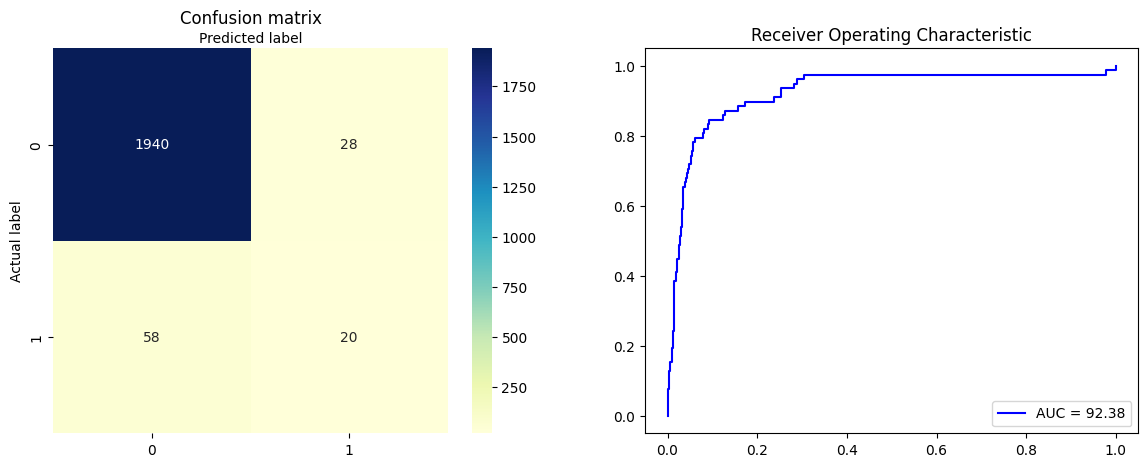

In [ ]:
# Print the accuracy
from sklearn.metrics import accuracy_score

print("Testing Evaluation:")
evaluation(y_test, y_pred_1, y_pred_1_prob)

#### Model Selection

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.975709  0.979675  0.977688      1968
           1   0.428571  0.384615  0.405405        78

    accuracy                       0.956989      2046
   macro avg   0.702140  0.682145  0.691547      2046
weighted avg   0.954850  0.956989  0.955870      2046





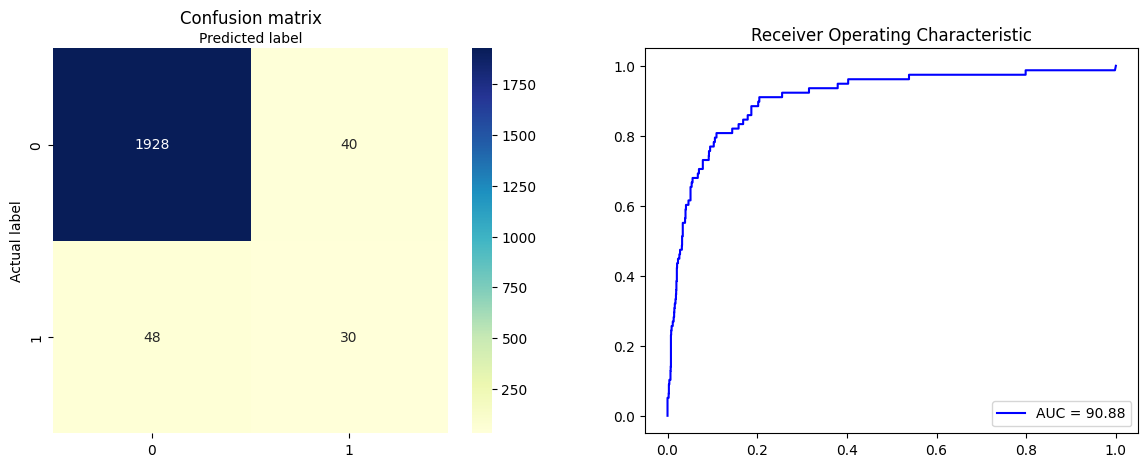

In [ ]:
# Apply NeighbourhoodCleaningRule to balance the other 2 datasets
X_train_2_resam, y_train_2_resam = ncr.fit_resample(X_train_2,y_train)

# Build 2 additional models by training data X_train_2 and X_train_3
clf2 = LogisticRegression(**model_setup).fit(X_train_2_resam, y_train_2_resam)

y_pred_2 = clf2.predict(X_test_2)
y_pred_2_prob = clf2.predict_proba(X_test_2)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred_2, y_pred_2_prob)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.973961  0.988313  0.981084      1968
           1   0.530612  0.333333  0.409449        78

    accuracy                       0.963343      2046
   macro avg   0.752287  0.660823  0.695267      2046
weighted avg   0.957059  0.963343  0.959292      2046





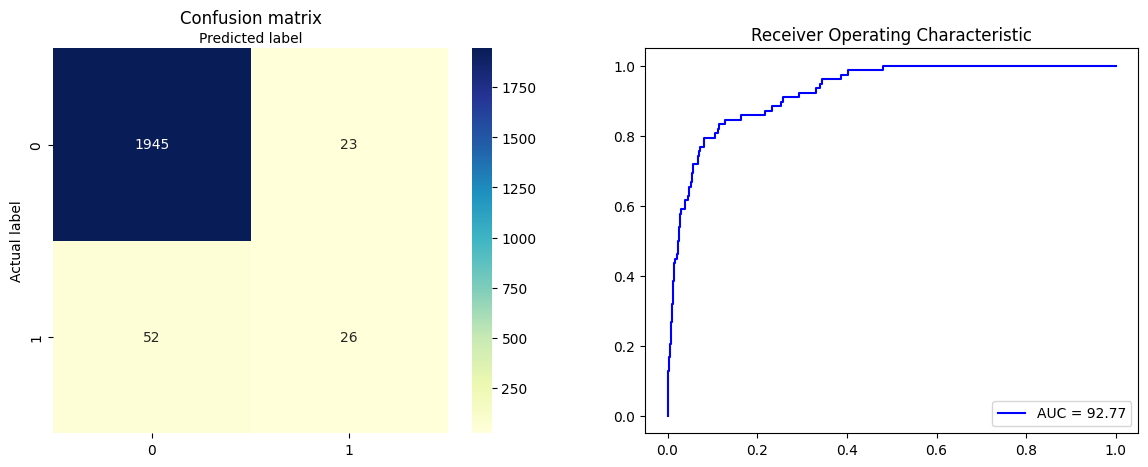

In [ ]:
X_train_3_resam, y_train_3_resam = ncr.fit_resample(X_train_3,y_train)

clf3 = LogisticRegression(**model_setup).fit(X_train_3_resam, y_train_3_resam)

y_pred_3 = clf3.predict(X_test_3)
y_pred_3_prob = clf3.predict_proba(X_test_3)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred_3, y_pred_3_prob)

#### Regularization

In [ ]:
# Setup default model parameters
model_setup={'fit_intercept': True, 'random_state': 42, 
             'max_iter':10000, 'solver': 'lbfgs', 'penalty': 'none'}

Strategy 1: Lasso Regularization

In [ ]:
# Lasso Regularization parameter setting
model_setup['penalty'] = 'l1'
model_setup['solver'] = 'liblinear'

Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.973420  0.986280  0.979808      1968
           1   0.480769  0.320513  0.384615        78

    accuracy                       0.960899      2046
   macro avg   0.727095  0.653397  0.682212      2046
weighted avg   0.954639  0.960899  0.957118      2046





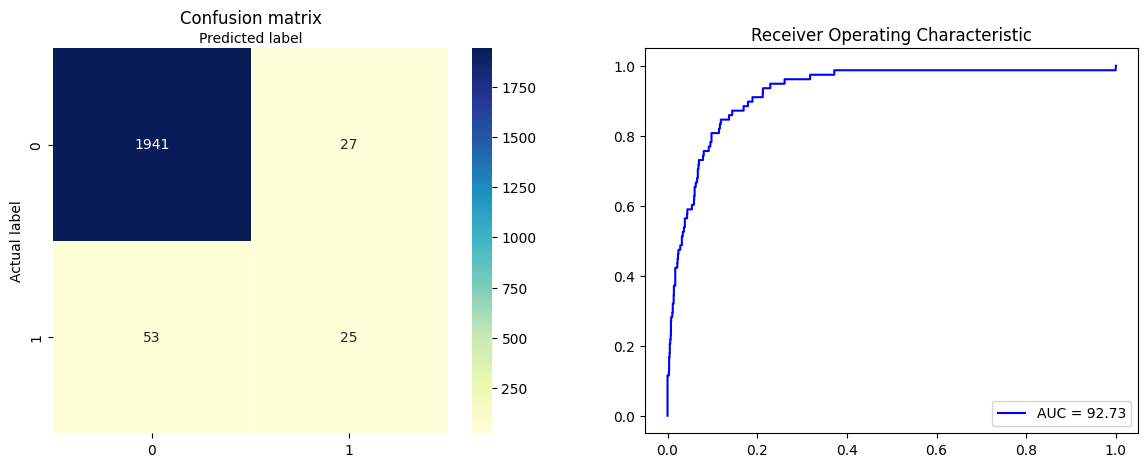

In [ ]:
clflasso = LogisticRegression(**model_setup).fit(X_train_2_resam, y_train_2_resam)

y_pred = clflasso.predict(X_test_2)
y_pred_prob = clflasso.predict_proba(X_test_2)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred, y_pred_prob)

Strategy 2: Ridge Regularization

In [ ]:
# Ridge Regularization parameter setting
model_setup['penalty'] = 'l2'
model_setup['solver'] = 'liblinear'

Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.973394  0.985264  0.979293      1968
           1   0.462963  0.320513  0.378788        78

    accuracy                       0.959922      2046
   macro avg   0.718178  0.652889  0.679040      2046
weighted avg   0.953934  0.959922  0.956400      2046





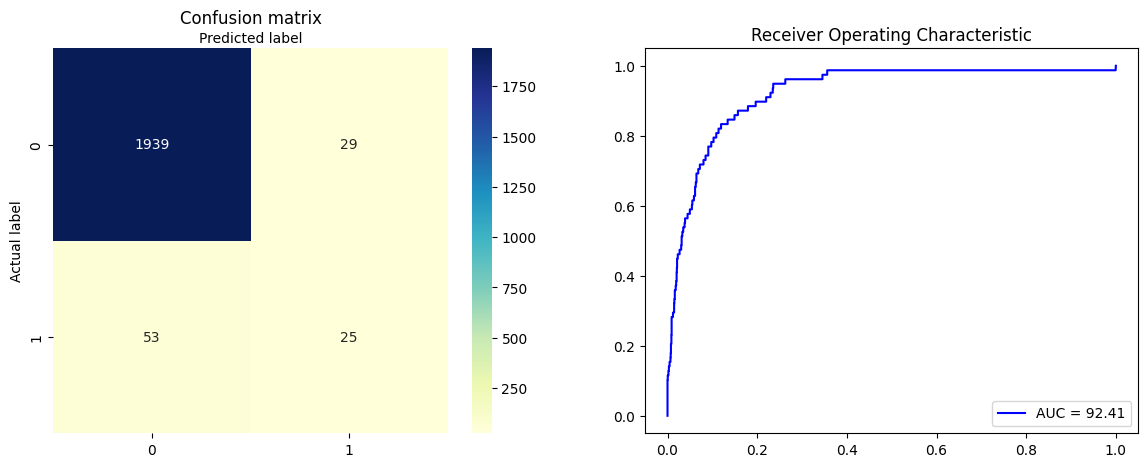

In [ ]:
clflasso = LogisticRegression(**model_setup).fit(X_train_2_resam, y_train_2_resam)

y_pred = clflasso.predict(X_test_2)
y_pred_prob = clflasso.predict_proba(X_test_2)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred, y_pred_prob)

### Using OneSidedSelection Algorithm

In [ ]:
from collections import Counter
from imblearn.under_sampling import OneSidedSelection

# Apply OneSidedSelection to balance the dataset
oss = OneSidedSelection()
X_train_1_resam, y_train_1_resam = oss.fit_resample(X_train_1,y_train)

print('Resampled dataset shape {}'.format(Counter(y_train_1_resam)))

Resampled dataset shape Counter({0: 3986, 1: 142})


In [ ]:
# Setup default model parameters

model_setup={'fit_intercept': True, 'random_state': 42, 
             'max_iter':10000, 'solver': 'lbfgs', 'penalty': 'none'}

In [ ]:
# Create a model and fit with training data X_train_1_resam, y_train_1_resam
clf1 = LogisticRegression(**model_setup).fit(X_train_1_resam, y_train_1_resam)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [ ]:
# Get predicted results of X_test1 as y_pred1
y_pred_1 = clf1.predict(X_test_1)
y_pred_1_prob = clf1.predict_proba(X_test_1)[:,1]

#### Model Evaluation

Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.966453  0.995427  0.980726      1968
           1   0.526316  0.128205  0.206186        78

    accuracy                       0.962366      2046
   macro avg   0.746384  0.561816  0.593456      2046
weighted avg   0.949673  0.962366  0.951198      2046





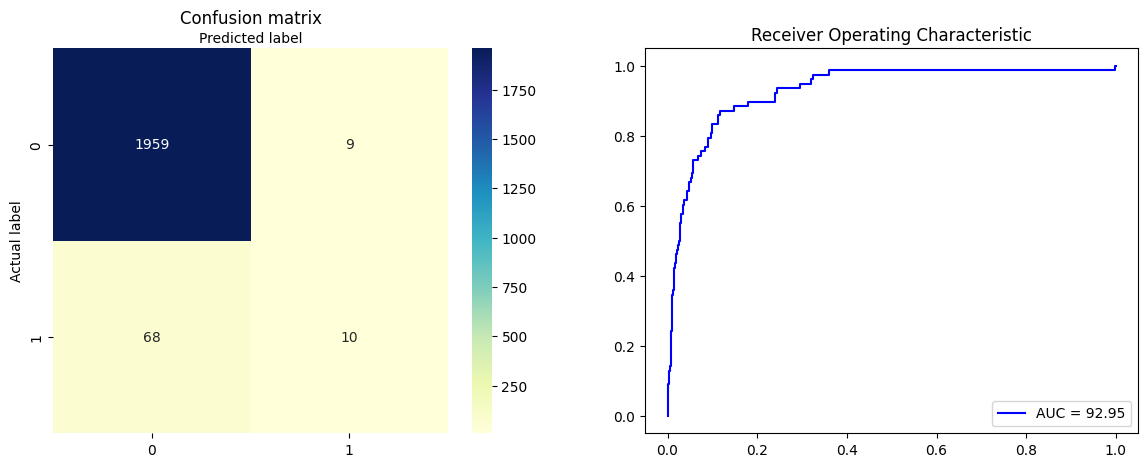

In [ ]:
# Print the accuracy
from sklearn.metrics import accuracy_score

print("Testing Evaluation:")
evaluation(y_test, y_pred_1, y_pred_1_prob)

#### Model Selection

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.969185  0.990854  0.979899      1968
           1   0.470588  0.205128  0.285714        78

    accuracy                       0.960899      2046
   macro avg   0.719887  0.597991  0.632807      2046
weighted avg   0.950177  0.960899  0.953435      2046





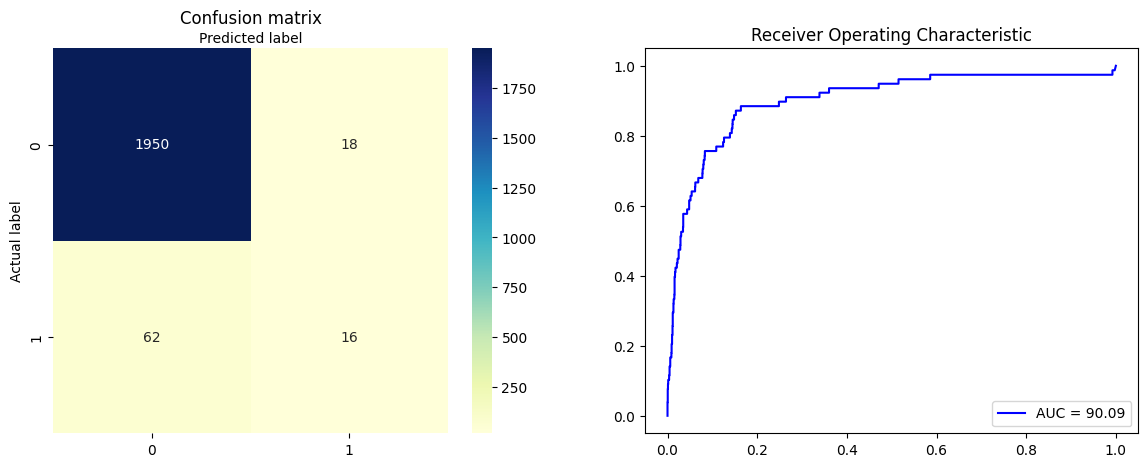

In [ ]:
# Apply OneSidedSelection to balance the other 2 datasets
X_train_2_resam, y_train_2_resam = oss.fit_resample(X_train_2,y_train)

# Build 2 additional models by training data X_train_2 and X_train_3
clf2 = LogisticRegression(**model_setup).fit(X_train_2_resam, y_train_2_resam)

y_pred_2 = clf2.predict(X_test_2)
y_pred_2_prob = clf2.predict_proba(X_test_2)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred_2, y_pred_2_prob)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.968812  0.994411  0.981444      1968
           1   0.576923  0.192308  0.288462        78

    accuracy                       0.963832      2046
   macro avg   0.772867  0.593359  0.634953      2046
weighted avg   0.953872  0.963832  0.955026      2046





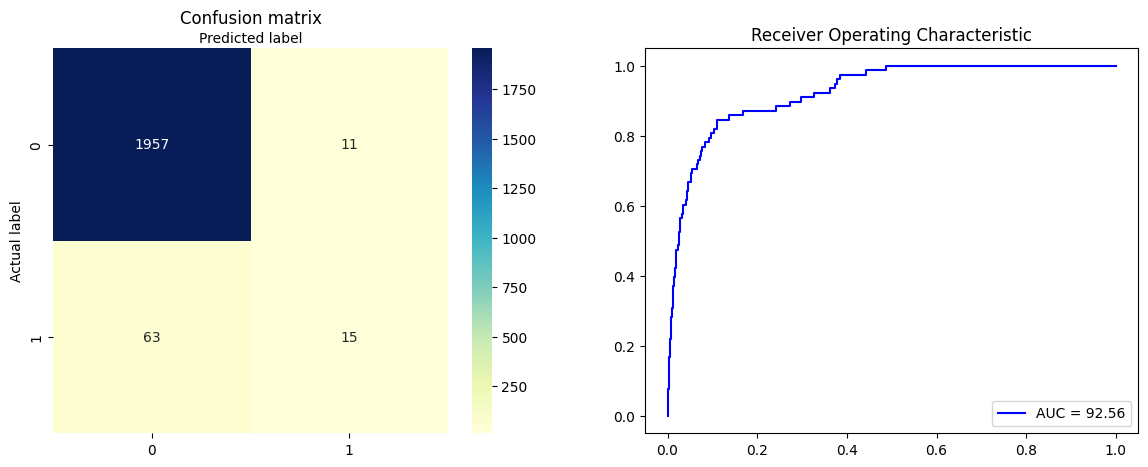

In [ ]:
X_train_3_resam, y_train_3_resam = oss.fit_resample(X_train_3,y_train)

clf3 = LogisticRegression(**model_setup).fit(X_train_3_resam, y_train_3_resam)

y_pred_3 = clf3.predict(X_test_3)
y_pred_3_prob = clf3.predict_proba(X_test_3)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred_3, y_pred_3_prob)

#### Regularization

In [ ]:
# Setup default model parameters
model_setup={'fit_intercept': True, 'random_state': 42, 
             'max_iter':10000, 'solver': 'lbfgs', 'penalty': 'none'}

Strategy 1: Lasso Regularization

In [ ]:
# Lasso Regularization parameter setting
model_setup['penalty'] = 'l1'
model_setup['solver'] = 'liblinear'

Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.967375  0.994411  0.980707      1968
           1   0.521739  0.153846  0.237624        78

    accuracy                       0.962366      2046
   macro avg   0.744557  0.574128  0.609165      2046
weighted avg   0.950386  0.962366  0.952378      2046





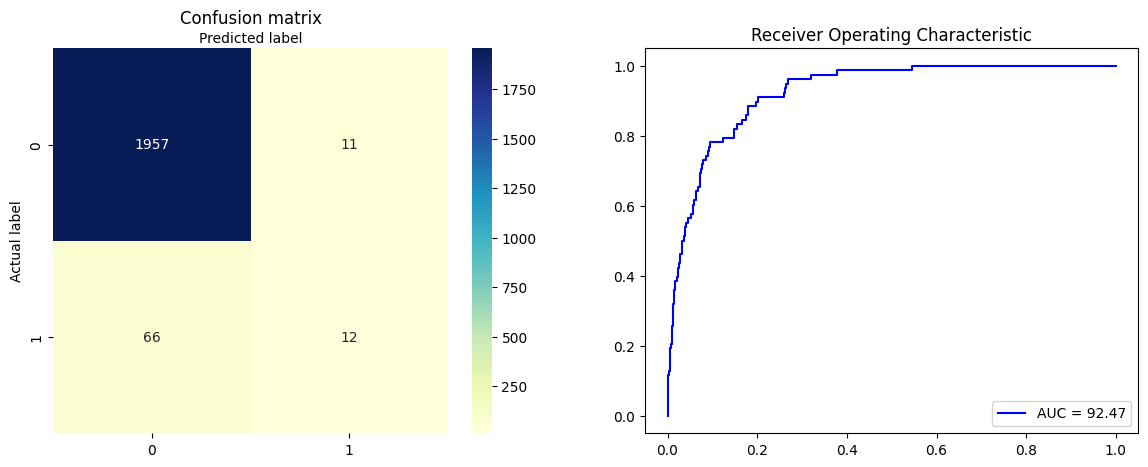

In [ ]:
clflasso = LogisticRegression(**model_setup).fit(X_train_2_resam, y_train_2_resam)

y_pred = clflasso.predict(X_test_2)
y_pred_prob = clflasso.predict_proba(X_test_2)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred, y_pred_prob)

Strategy 2: Ridge Regularization

In [ ]:
# Ridge Regularization parameter setting
model_setup['penalty'] = 'l2'
model_setup['solver'] = 'liblinear'

Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.967822  0.993394  0.980441      1968
           1   0.500000  0.166667  0.250000        78

    accuracy                       0.961877      2046
   macro avg   0.733911  0.580030  0.615221      2046
weighted avg   0.949987  0.961877  0.952595      2046





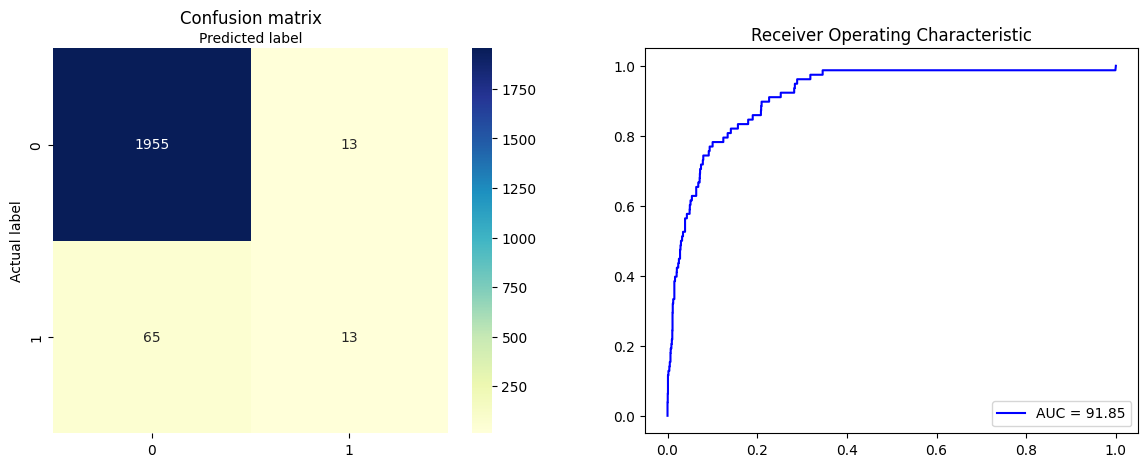

In [ ]:
clfridge = LogisticRegression(**model_setup).fit(X_train_2_resam, y_train_2_resam)

y_pred = clfridge.predict(X_test_2)
y_pred_prob = clfridge.predict_proba(X_test_2)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred, y_pred_prob)

# Final Baseline Model

In [ ]:
# Undersampling (random)
rus = RandomUnderSampler()
X_train_3_resam, y_train_3_resam = rus.fit_resample(X_train_3,y_train)

# Setup default model parameters
model_setup={'fit_intercept': True, 'random_state': 42, 
             'max_iter':10000, 'solver': 'lbfgs', 'penalty': 'none'}

# Lasso Regularization parameter setting
model_setup['penalty'] = 'l1'
model_setup['solver'] = 'liblinear'

In [ ]:
params = {
    'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 10],
    'max_iter': [100, 500, 1000],
}

model = LogisticRegression(**model_setup)
final_baseline = RandomizedSearchCV(model, param_distributions=params, scoring='recall', cv=5, random_state=0)

hypertuned_model = final_baseline.fit(X_train_3_resam, y_train_3_resam)

final_baseline.best_params_

{'max_iter': 1000, 'C': 0.05}

Testing Evaluation:

Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.998596  0.723069  0.838786      1968
           1   0.122383  0.974359  0.217454        78

    accuracy                       0.732649      2046
   macro avg   0.560490  0.848714  0.528120      2046
weighted avg   0.965192  0.732649  0.815099      2046





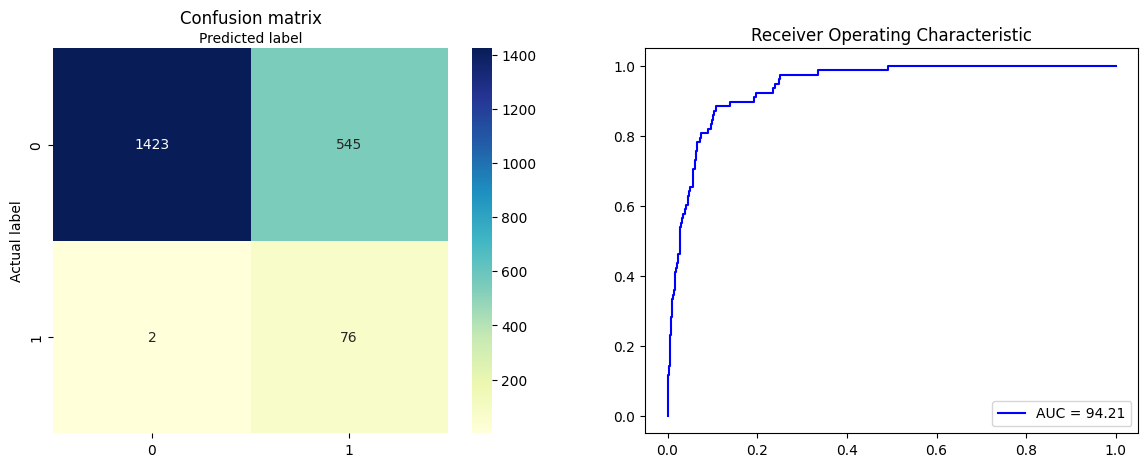

In [ ]:
y_pred_dt_hypertuned = hypertuned_model.predict(X_test_3)
y_pred_dt_prob_hypertuned = hypertuned_model.predict_proba(X_test_3)[:,1]

print("Testing Evaluation:")
evaluation(y_test, y_pred_dt_hypertuned, y_pred_dt_prob_hypertuned)

# Data Preprocessing for Tree-Based Models

In [ ]:
# Import some packages
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import auc, roc_curve, RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

from xgboost import XGBClassifier

## Decision Tree


Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.973069  0.973069  0.973069      1968
           1   0.320513  0.320513  0.320513        78

    accuracy                       0.948192      2046
   macro avg   0.646791  0.646791  0.646791      2046
weighted avg   0.948192  0.948192  0.948192      2046





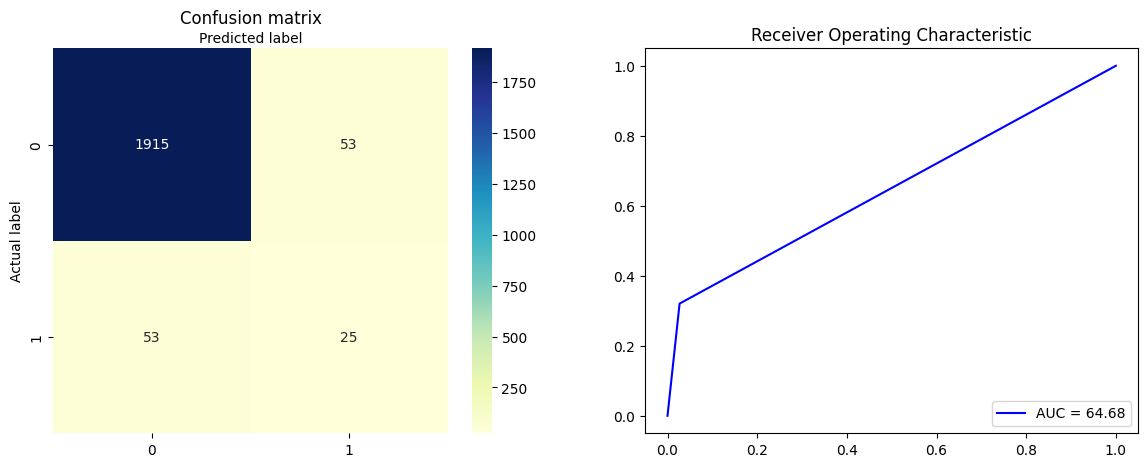

In [ ]:
# Original
clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_pred_dt = clf.predict(X_test)
y_pred_dt_prob = clf.predict_proba(X_test)[:,1]
evaluation(y_test, y_pred_dt, y_pred_dt_prob)

## Re-Sampling Decision Tree
As our dataset is highly imbalanced, we have explored undersampling and oversampling methods to achieve better performance of our models. 

Random sampling is one of the the simplest techniques to balance the imbalanced nature of our dataset. It balances the data by replicating the majority / minority class samples. 

Reference: https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/ 



In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import imblearn

# define oversampling strategy to increase ratio to 1:20
oversample = RandomOverSampler(sampling_strategy=0.05)
X_over, y_over = oversample.fit_resample(X_train, y_train)

# define undersampling strategy to improve ratio to 1:2
undersample = RandomUnderSampler(sampling_strategy=0.5)
X_resampled, y_resampled = undersample.fit_resample(X_over, y_over)

print("Over and Under sampling:", Counter(y_resampled))

Over and Under sampling: Counter({0: 462, 1: 231})



Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.984410  0.898374  0.939426      1968
           1   0.200000  0.641026  0.304878        78

    accuracy                       0.888563      2046
   macro avg   0.592205  0.769700  0.622152      2046
weighted avg   0.954506  0.888563  0.915235      2046





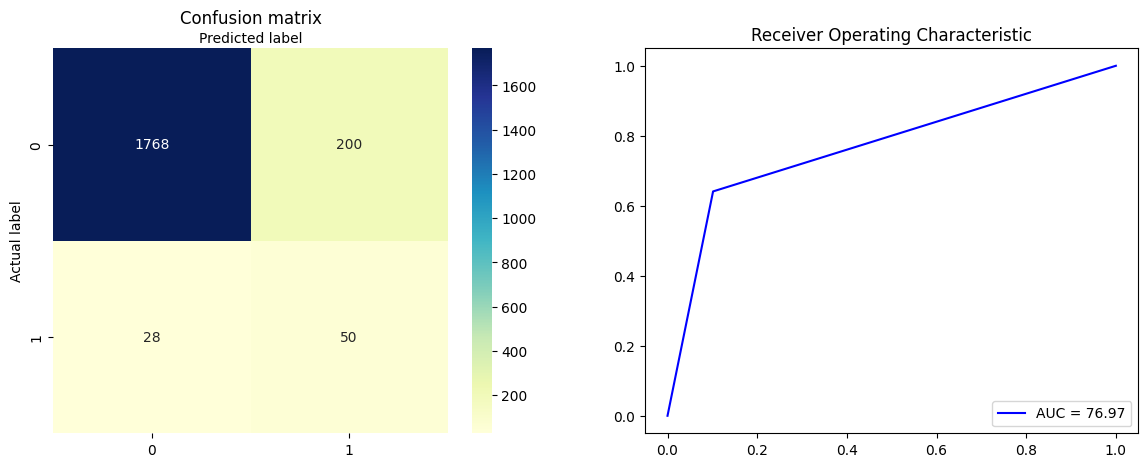

In [ ]:
# Re-evaluate
dtree = DecisionTreeClassifier()
dtree.fit(X_resampled, y_resampled)
y_pred_dt = dtree.predict(X_test)
y_pred_dt_prob = dtree.predict_proba(X_test)[:,1]
evaluation(y_test, y_pred_dt, y_pred_dt_prob)

# Advanced Tree-Based Models

## Bagging

In [ ]:
clf = BalancedBaggingClassifier(random_state=0).fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]


Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.990363  0.887703  0.936227      1968
           1   0.216312  0.782051  0.338889        78

    accuracy                       0.883675      2046
   macro avg   0.603337  0.834877  0.637558      2046
weighted avg   0.960854  0.883675  0.913455      2046





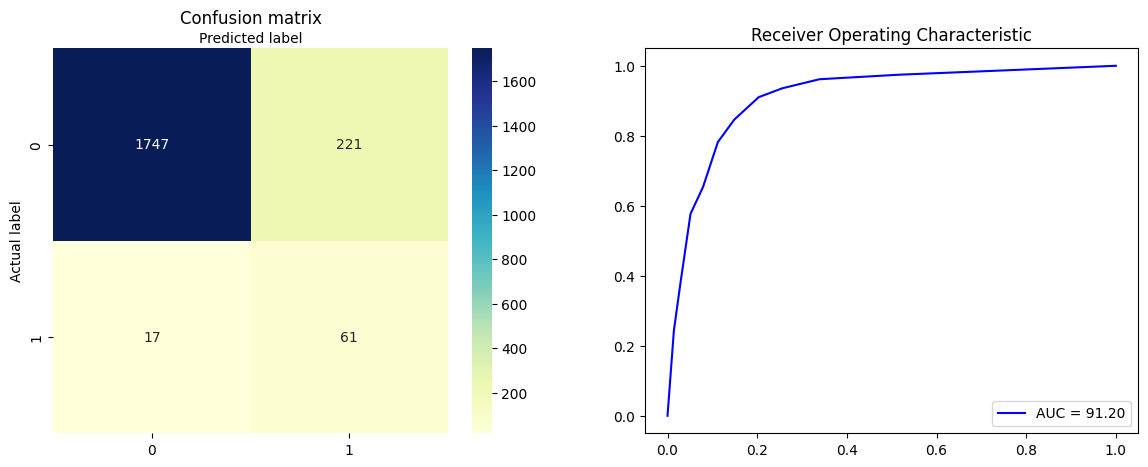

In [ ]:
evaluation(y_test, y_pred, y_pred_prob)

## Hyper-parameter Tuning for Bagging

In [ ]:
params = {
    'n_estimators': np.arange(10, 300, 10),
    'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'replacement': [True, False],
    }

model = BalancedBaggingClassifier(random_state=0)
random_search = RandomizedSearchCV(model, param_distributions=params, scoring='recall', cv=3, random_state=0)

hypertuned_model = random_search.fit(X_resampled, y_resampled)

random_search.best_params_

{'replacement': True,
 'n_estimators': 20,
 'max_samples': 0.6,
 'max_features': 0.3,
 'bootstrap_features': False,
 'bootstrap': False}


Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.996420  0.848577  0.916575      1968
           1   0.194595  0.923077  0.321429        78

    accuracy                       0.851417      2046
   macro avg   0.595507  0.885827  0.619002      2046
weighted avg   0.965852  0.851417  0.893886      2046





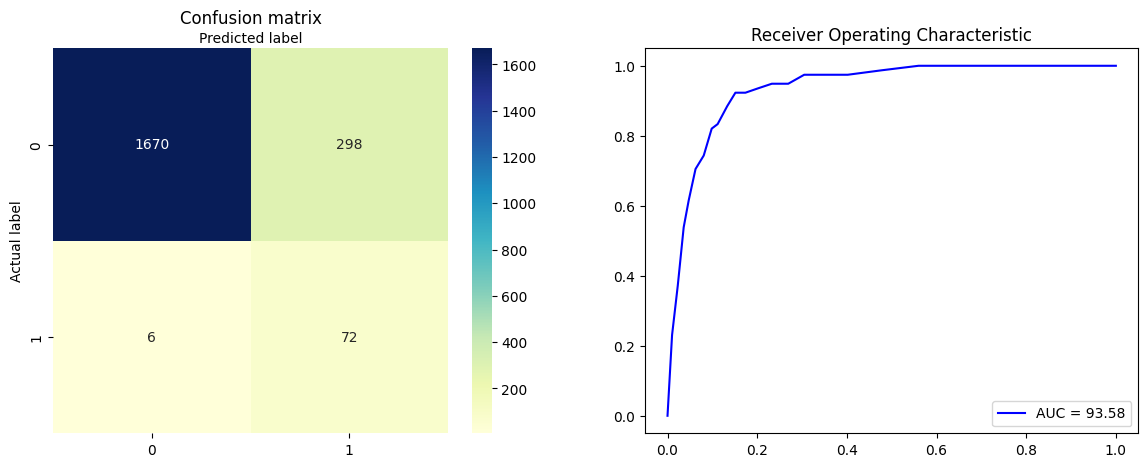

In [ ]:
y_pred_dt_hypertuned = hypertuned_model.predict(X_test)
y_pred_dt_prob_hypertuned = hypertuned_model.predict_proba(X_test)[:,1]

evaluation(y_test, y_pred_dt_hypertuned, y_pred_dt_prob_hypertuned)

## AdaBoost

In [ ]:
clf = AdaBoostClassifier(random_state=0).fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]


Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.985761  0.914634  0.948867      1968
           1   0.236364  0.666667  0.348993        78

    accuracy                       0.905181      2046
   macro avg   0.611062  0.790650  0.648930      2046
weighted avg   0.957192  0.905181  0.925998      2046





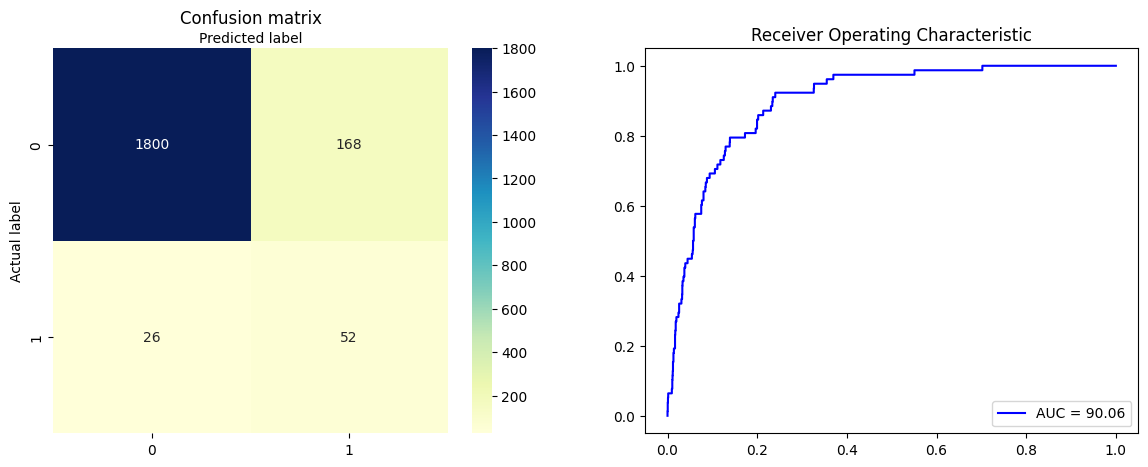

In [ ]:
evaluation(y_test, y_pred, y_pred_prob)

## Hyper-parameter Tuning for AdaBoost

In [ ]:
params = {
    'n_estimators': np.arange(10, 300, 10),
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'algorithm': ['SAMME', 'SAMME.R'],
    }

model = AdaBoostClassifier(random_state=0)
random_search = RandomizedSearchCV(model, param_distributions=params, scoring='recall', cv=3, random_state=0)

hypertuned_model = random_search.fit(X_resampled, y_resampled)

random_search.best_params_

{'n_estimators': 150, 'learning_rate': 0.2, 'algorithm': 'SAMME.R'}


Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.987397  0.915650  0.950171      1968
           1   0.248869  0.705128  0.367893        78

    accuracy                       0.907625      2046
   macro avg   0.618133  0.810389  0.659032      2046
weighted avg   0.959242  0.907625  0.927973      2046





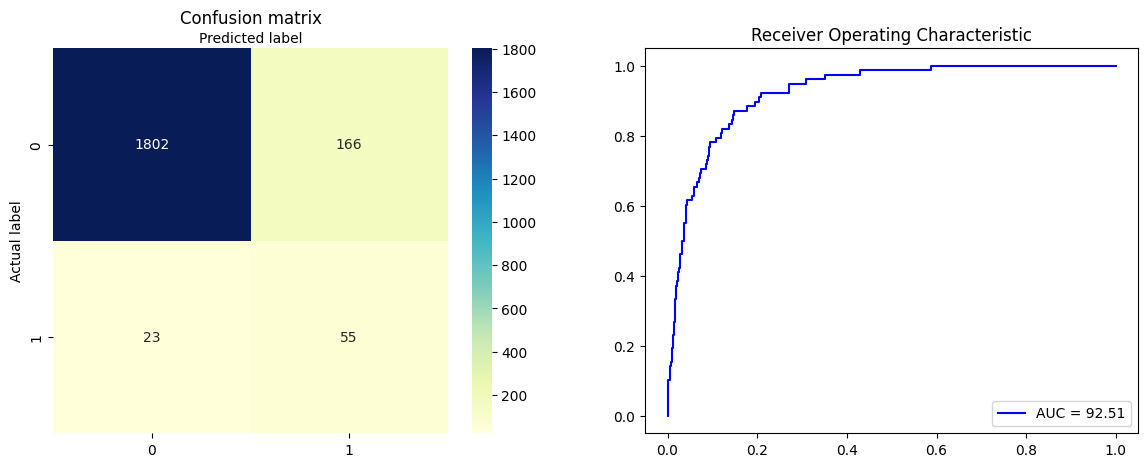

In [ ]:
y_pred_dt_hypertuned = hypertuned_model.predict(X_test)
y_pred_dt_prob_hypertuned = hypertuned_model.predict_proba(X_test)[:,1]

evaluation(y_test, y_pred_dt_hypertuned, y_pred_dt_prob_hypertuned)

## XGBoost

In [ ]:
clf = XGBClassifier(random_state=0).fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]


Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.989148  0.926321  0.956704      1968
           1   0.285714  0.743590  0.412811        78

    accuracy                       0.919355      2046
   macro avg   0.637431  0.834955  0.684758      2046
weighted avg   0.962331  0.919355  0.935969      2046





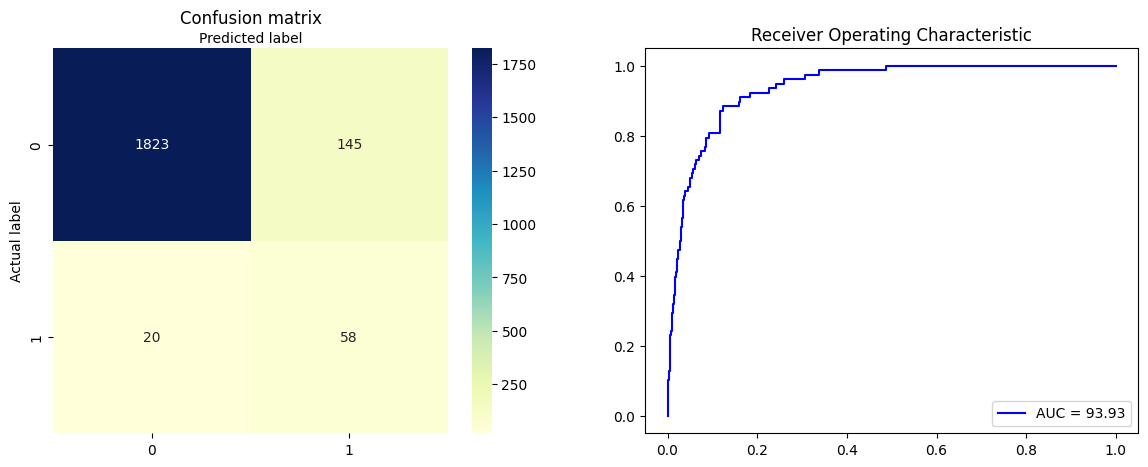

In [ ]:
evaluation(y_test, y_pred, y_pred_prob)

## Hyper-parameter Tuning for XGBoost

In [ ]:
params = {
    'n_estimators': np.arange(10, 300, 10),
    'max_depth': np.arange(3, 12, 2),
    'learning_rate': np.arange(0.1, 1.0, 0.05),
    'subsample': np.arange(0.2, 1.0, 0.1),
    'colsample_bytree': np.arange(0.2, 1.0, 0.1),
    'min_child_weight': np.arange(0.2, 1.0, 0.1),
    }

model = XGBClassifier(random_state=0)

random_search = RandomizedSearchCV(model, param_distributions=params, scoring='recall', cv=3, random_state=0)
hypertuned_model = random_search.fit(X_resampled, y_resampled)

random_search.best_params_

{'subsample': 0.6000000000000001,
 'n_estimators': 150,
 'min_child_weight': 0.8000000000000003,
 'max_depth': 5,
 'learning_rate': 0.30000000000000004,
 'colsample_bytree': 0.4000000000000001}


Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.989707  0.928354  0.958049      1968
           1   0.295000  0.756410  0.424460        78

    accuracy                       0.921799      2046
   macro avg   0.642354  0.842382  0.691255      2046
weighted avg   0.963223  0.921799  0.937707      2046





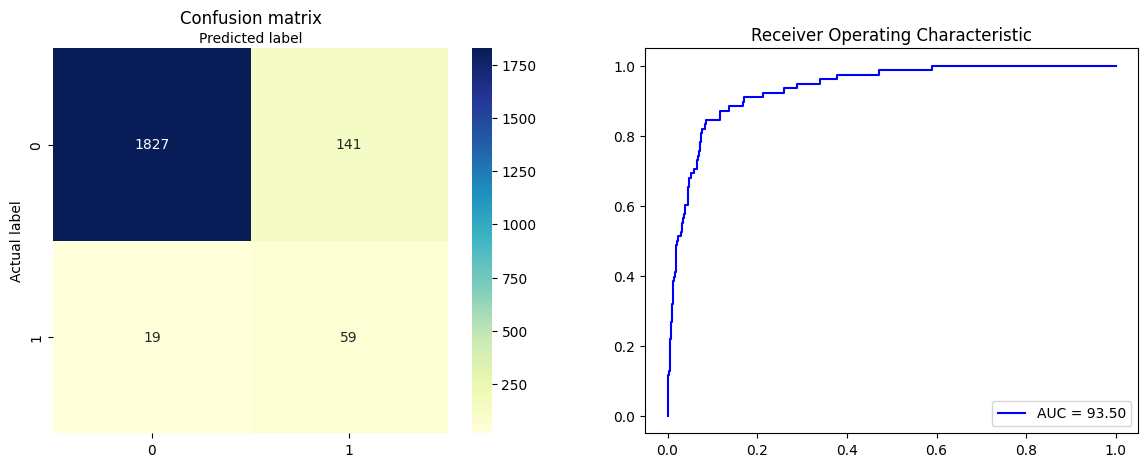

In [ ]:
y_pred_dt_hypertuned = hypertuned_model.predict(X_test)
y_pred_dt_prob_hypertuned = hypertuned_model.predict_proba(X_test)[:,1]

evaluation(y_test, y_pred_dt_hypertuned, y_pred_dt_prob_hypertuned)

## GradientBoost


In [ ]:
gradientBoost = GradientBoostingClassifier(random_state=0).fit(X_resampled, y_resampled)
y_pred = gradientBoost.predict(X_test)
y_pred_prob = gradientBoost.predict_proba(X_test)[:,1]


Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.990201  0.924289  0.956110      1968
           1   0.287081  0.769231  0.418118        78

    accuracy                       0.918377      2046
   macro avg   0.638641  0.846760  0.687114      2046
weighted avg   0.963396  0.918377  0.935600      2046





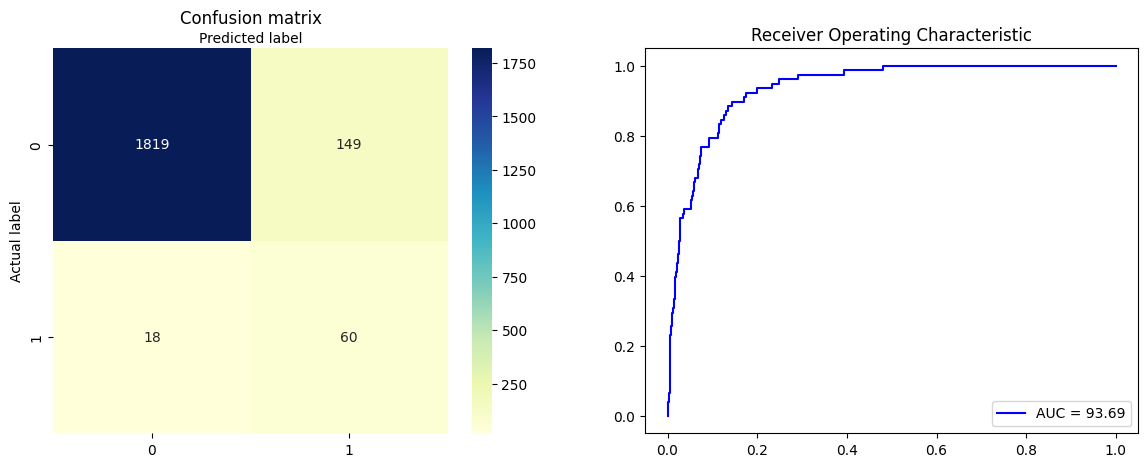

In [ ]:
evaluation(y_test, y_pred, y_pred_prob)

##Hyper-parameter Tuning for Gradient Boosting

In [ ]:
params = {
    'n_estimators': np.arange(10, 300, 10),
    'learning_rate': np.arange(0.1, 1.0, 0.05),
    'min_samples_split': np.arange(2, 6, 1),
    'min_samples_leaf': np.arange(2, 6, 1),
    'max_depth': np.arange(3, 10, 1),
    'max_features': np.arange(3, 10, 1),
}

model = GradientBoostingClassifier(random_state=0)

gradient_boost = RandomizedSearchCV(model, param_distributions=params, scoring='recall', cv=3, random_state=0)
hypertuned_model = gradient_boost.fit(X_resampled, y_resampled)

gradient_boost.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 5,
 'max_depth': 4,
 'learning_rate': 0.3500000000000001}


Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0   0.990323  0.935976  0.962382      1968
           1   0.322581  0.769231  0.454545        78

    accuracy                       0.929619      2046
   macro avg   0.656452  0.852603  0.708464      2046
weighted avg   0.964866  0.929619  0.943022      2046





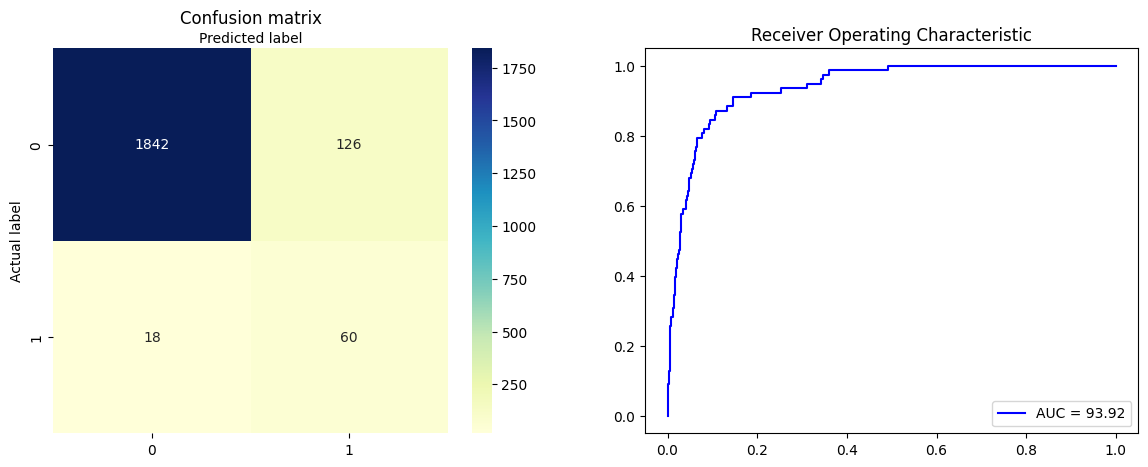

In [ ]:
y_pred_dt_hypertuned = hypertuned_model.predict(X_test)
y_pred_dt_prob_hypertuned = hypertuned_model.predict_proba(X_test)[:,1]

evaluation(y_test, y_pred_dt_hypertuned, y_pred_dt_prob_hypertuned)